#Import libraries & Download the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Dataset Feature Description
1. Diabetes_012 (Target Variable)
Type: Categorical (Ordinal).
Unique Values: [0. 2. 1.]
0: No diabetes.
1: Prediabetes.
2: Diabetes.
Meaning: Represents the diabetes status of an individual.


2. HighBP
Type: Binary.
Unique Values: [1. 0.]
1: High blood pressure.
0: Normal blood pressure.
Meaning: Indicates whether the individual has been diagnosed with high blood pressure.


3. HighChol
Type: Binary.
Unique Values: [1. 0.]
1: High cholesterol.
0: Normal cholesterol levels.
Meaning: Indicates whether the individual has been diagnosed with high cholesterol.

4. CholCheck
Type: Binary.
Unique Values: [1. 0.]
1: Cholesterol checked recently.
0: Cholesterol not checked.
Meaning: Whether the individual has had their cholesterol checked in recent times.


5. BMI
Type: Numerical (Continuous).
Unique Values: Multiple values ranging from 12 to 98.
Meaning: Body Mass Index, a measure of body fat based on weight and height.


6. Smoker
Type: Binary.
Unique Values: [1. 0.]
1: Smoker.
0: Non-smoker.
Meaning: Indicates whether the individual is a smoker.


7. Stroke
Type: Binary.
Unique Values: [0. 1.]
1: History of stroke.
0: No history of stroke.
Meaning: Indicates whether the individual has experienced a stroke.


8. HeartDiseaseorAttack
Type: Binary.
Unique Values: [0. 1.]
1: History of heart disease or attack.
0: No history of heart disease or attack.
Meaning: Whether the individual has experienced heart-related conditions.


9. PhysActivity
Type: Binary.
Unique Values: [0. 1.]
1: Engages in physical activity.
0: No physical activity.
Meaning: Indicates whether the individual engages in physical activity.


10. Fruits
Type: Binary.
Unique Values: [0. 1.]
1: Consumes fruits regularly.
0: Does not consume fruits regularly.
Meaning: Indicates regular fruit consumption.


11. Veggies
Type: Binary.
Unique Values: [1. 0.]
1: Consumes vegetables regularly.
0: Does not consume vegetables regularly.
Meaning: Indicates regular vegetable consumption.


12. HvyAlcoholConsump
Type: Binary.
Unique Values: [0. 1.]
1: Heavy alcohol consumption.
0: No heavy alcohol consumption.
Meaning: Indicates whether the individual consumes large amounts of alcohol.


13. AnyHealthcare
Type: Binary.
Unique Values: [1. 0.]
1: Has access to healthcare.
0: No access to healthcare.
Meaning: Indicates access to healthcare services.


14. NoDocbcCost
Type: Binary.
Unique Values: [0. 1.]
1: Did not see a doctor due to cost.
0: No cost-related barriers to seeing a doctor.
Meaning: Whether the individual skipped doctor visits due to financial issues.


15. GenHlth
Type: Categorical (Ordinal).
Unique Values: [5. 3. 2. 4. 1.]
1: Excellent.
2: Very good.
3: Good.
4: Fair.
5: Poor.
Meaning: Self-reported general health status.


16. MentHlth
Type: Numerical (Discrete).
Unique Values: Days range from 0 to 30.
Meaning: Number of days in the past month with poor mental health.


17. PhysHlth
Type: Numerical (Discrete).
Unique Values: Days range from 0 to 30.
Meaning: Number of days in the past month with poor physical health.


18. DiffWalk
Type: Binary.
Unique Values: [1. 0.]
1: Difficulty walking.
0: No difficulty walking.
Meaning: Indicates if the individual has difficulty walking or climbing stairs.


19. Sex
Type: Binary.
Unique Values: [0. 1.]
0: Male.
1: Female.
Meaning: Gender of the individual.


20. Age
Type: Categorical (Ordinal).
Unique Values: [9. 7. 11. 10. 8. 13. 4. 6. 2. 12. 5. 1. 3.]
Encodes age ranges (e.g., 1: 18-24 years
2: 25-29 years
3: 30-34 years
4: 35-39 years
5: 40-44 years
6: 45-49 years
7: 50-54 years
8: 55-59 years
9: 60-64 years
10: 65-69 years
11: 70-74 years
12: 75-79 years
13: 80 years or older).
Meaning: Age group of the individual.


21. Education
Type: Categorical (Ordinal).
Unique Values: [4. 6. 3. 5. 2. 1.]
1: Less than high school.
2: High school graduate.
3: Some college.
4: College graduate.
5-6: Advanced degrees.
Meaning: Education level of the individual.


22. Income
Type: Categorical (Ordinal).
Unique Values: [3. 1. 8. 6. 4. 7. 2. 5.]
Encodes income brackets (e.g., 1 = <10K, 2 = 10-15K, etc.).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Here we can see that there is no missing data and that is perfect There is no need for Cleaning

#Data Exploration

In [ ]:
df.describe()

Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}
for col, values in unique_values.items():
    print(f"{col}: {values}")

Diabetes_012: [0. 2. 1.]
HighBP: [1. 0.]
HighChol: [1. 0.]
CholCheck: [1. 0.]
BMI: [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker: [1. 0.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [1. 0.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [1. 0.]
NoDocbcCost: [0. 1.]
GenHlth: [5. 3. 2. 4. 1.]
MentHlth: [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth: [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk: [1. 0.]
Sex: [0. 1.]
Age: [ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3

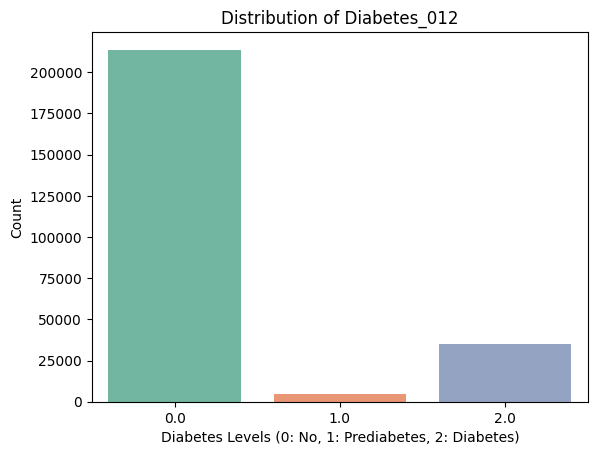

In [ ]:
sns.countplot(x='Diabetes_012', data=df, palette='Set2')
plt.title('Distribution of Diabetes_012')
plt.xlabel('Diabetes Levels (0: No, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

class_0 = df[df['Diabetes_012'] == 0.0]
class_2 = df[df['Diabetes_012'] == 2.0]
class_1 = df[df['Diabetes_012'] == 1.0]

class_0_downsampled = resample(class_0,
                               replace=False,
                               n_samples=5000,
                               random_state=42)
class_2_downsampled = resample(class_2,
                               replace=False,
                               n_samples=5000,
                               random_state=42)

reduced_df = pd.concat([class_0_downsampled, class_2_downsampled, class_1])


print("After Downsampling:")
print(reduced_df['Diabetes_012'].value_counts())

X = reduced_df.drop(columns=['Diabetes_012'])
y = reduced_df['Diabetes_012']

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

balanced_df_smote = pd.concat([pd.DataFrame(X_smote, columns=X.columns),
                               pd.DataFrame(y_smote, columns=['Diabetes_012'])], axis=1)

print("After Applying SMOTE:")
print(balanced_df_smote['Diabetes_012'].value_counts())


After Downsampling:
Diabetes_012
0.0    5000
2.0    5000
1.0    4631
Name: count, dtype: int64
After Applying SMOTE:
Diabetes_012
0.0    5000
2.0    5000
1.0    5000
Name: count, dtype: int64


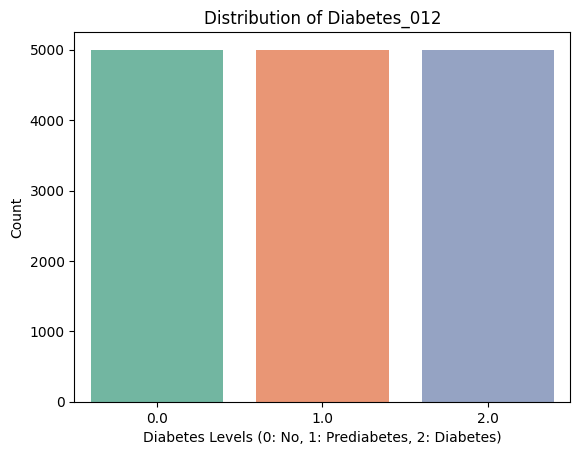

In [ ]:
sns.countplot(x='Diabetes_012', data=balanced_df_smote, palette='Set2')
plt.title('Distribution of Diabetes_012')
plt.xlabel('Diabetes Levels (0: No, 1: Prediabetes, 2: Diabetes)')
plt.ylabel('Count')
plt.show()

##Here we can see that the data is imbalanced data ,so whatever we did the accuracy would not be very good.  so we have to work to make it balanced

#Data Exploration

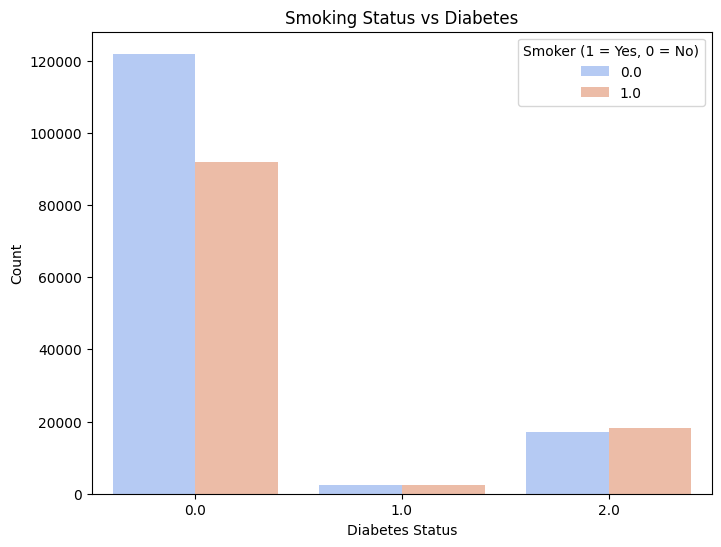

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='Smoker', data=df, palette='coolwarm')
plt.title('Smoking Status vs Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.legend(title='Smoker (1 = Yes, 0 = No)')
plt.show()

Here we know that most of the diabets people smoke , and if you are somking  there is probalitly to have diabets.

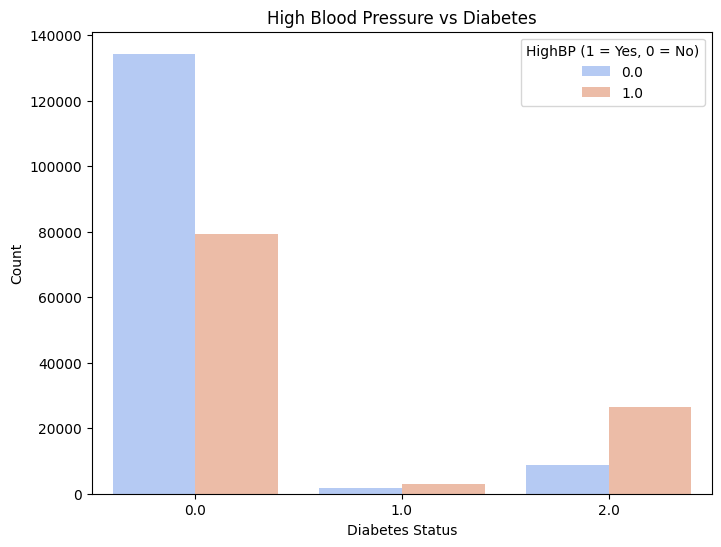

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='HighBP', data=df, palette='coolwarm')
plt.title('High Blood Pressure vs Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.legend(title='HighBP (1 = Yes, 0 = No)')
plt.show()

Here we know that the hight blodd pressure more liklet to haveDeabets ,  if u have Hight Bllod presure , you probaly have diabets more than not . :

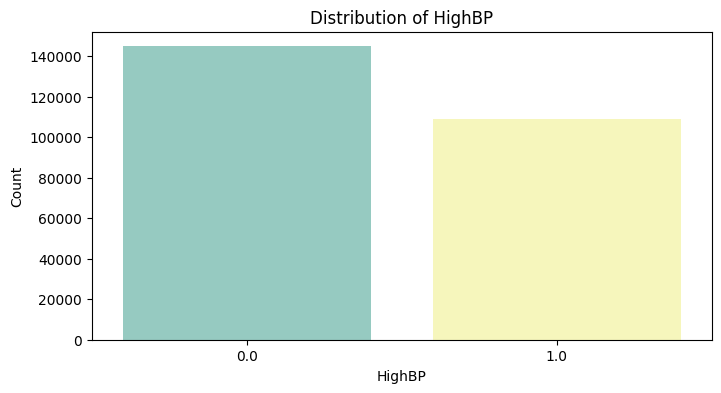

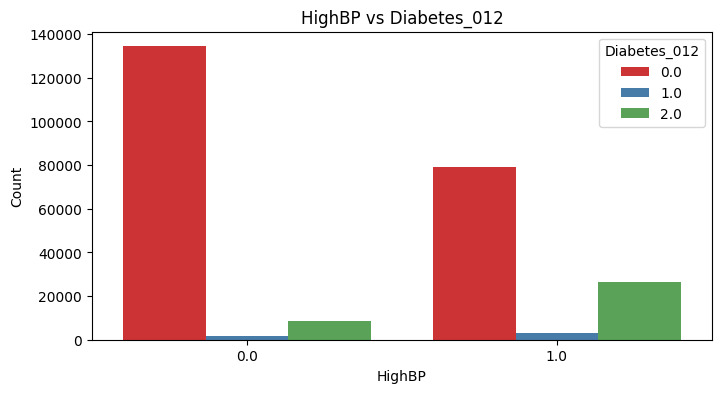

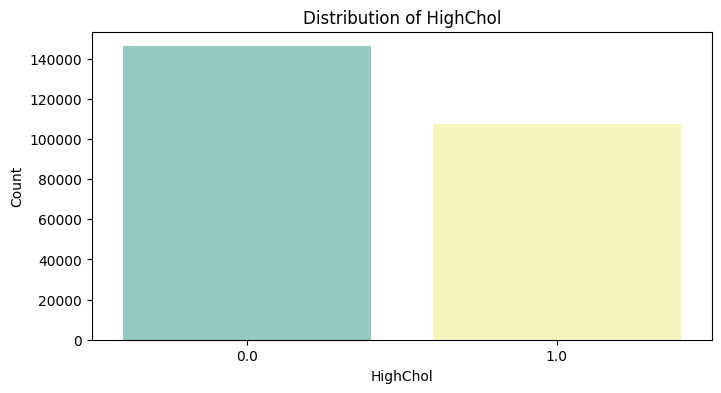

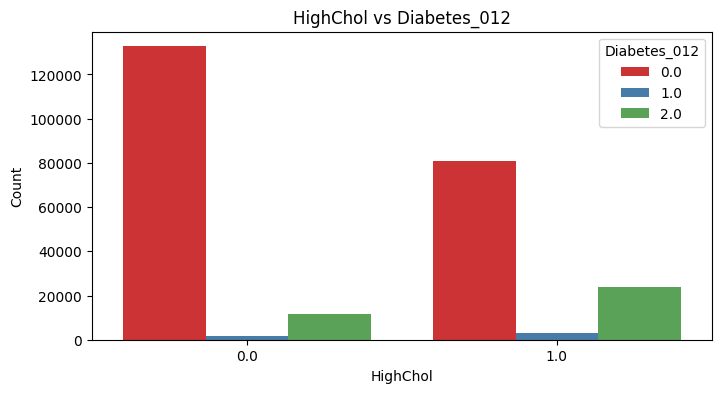

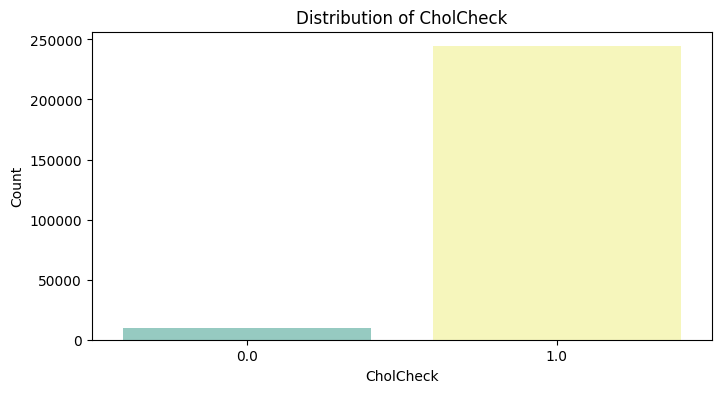

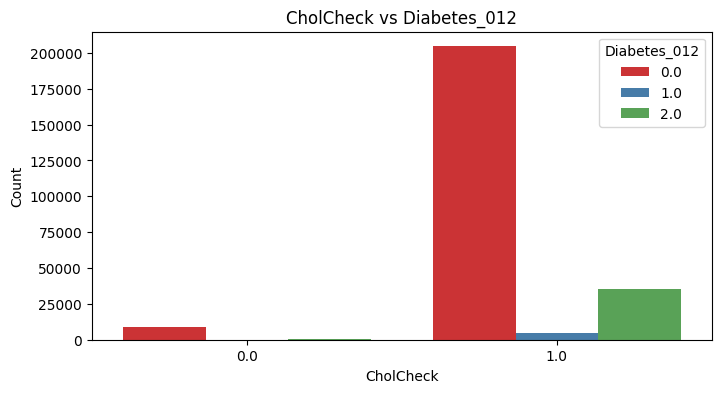

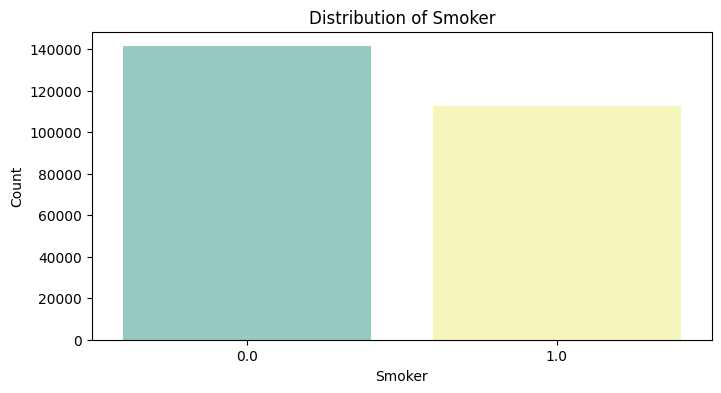

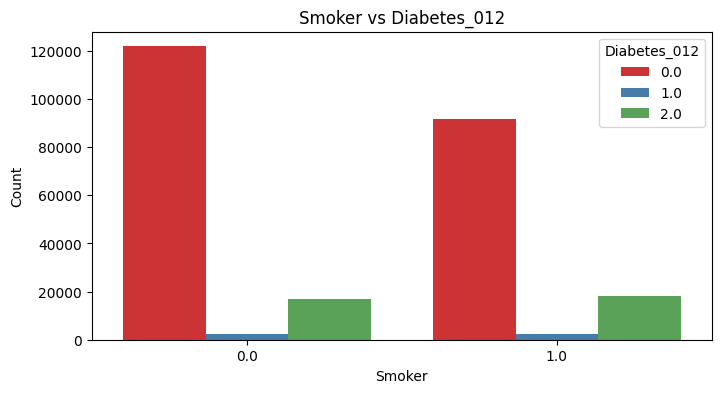

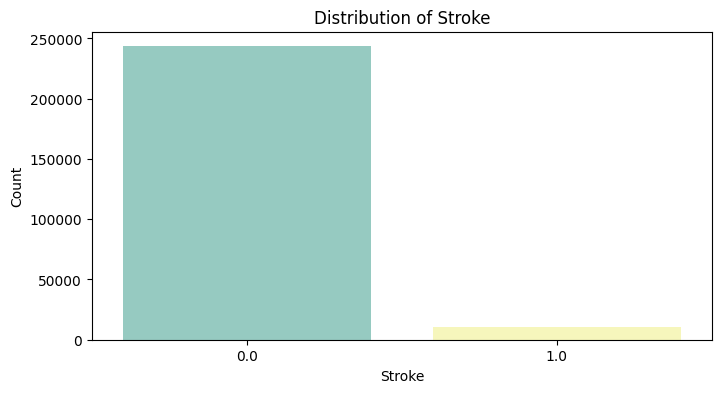

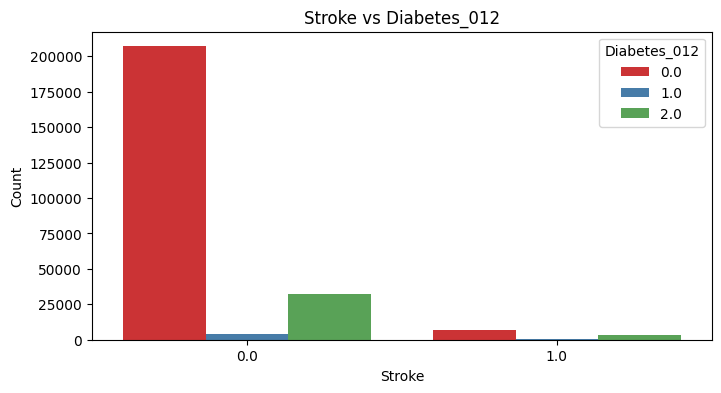

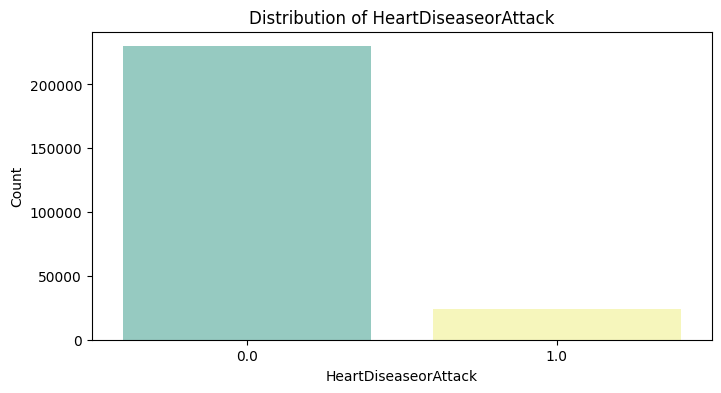

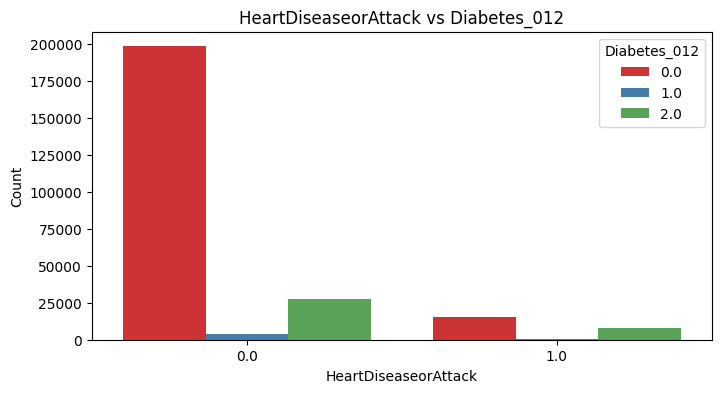

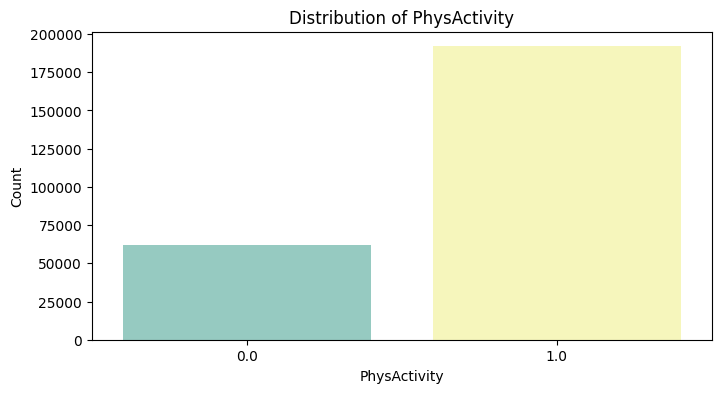

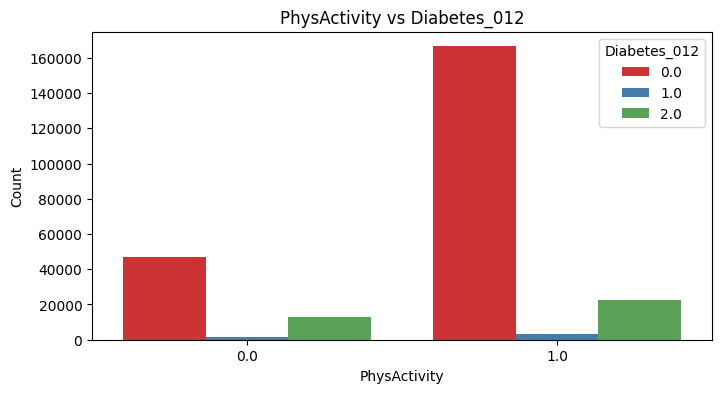

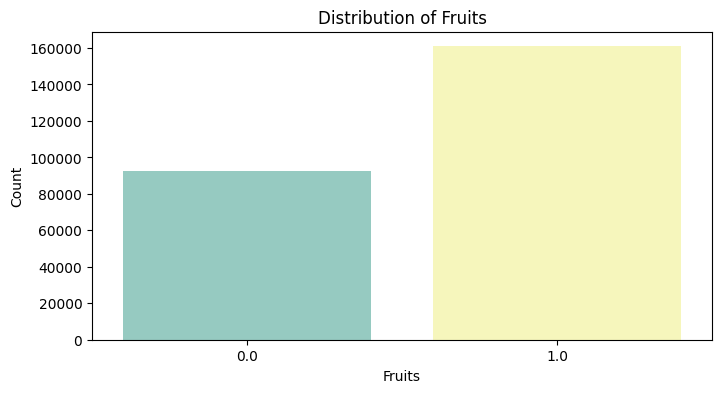

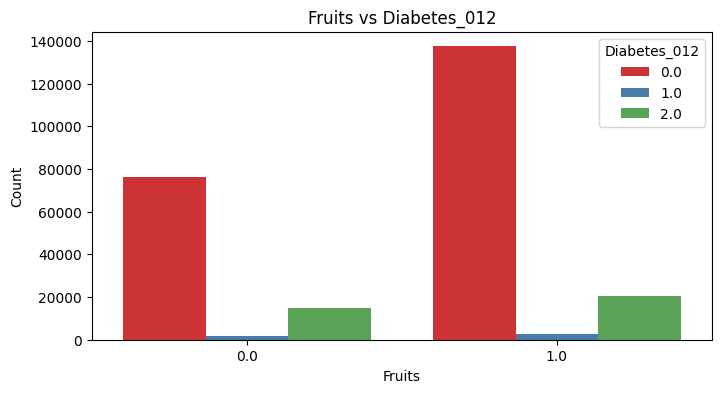

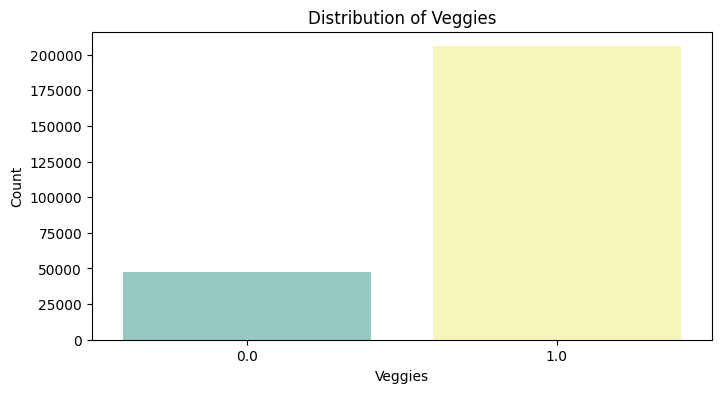

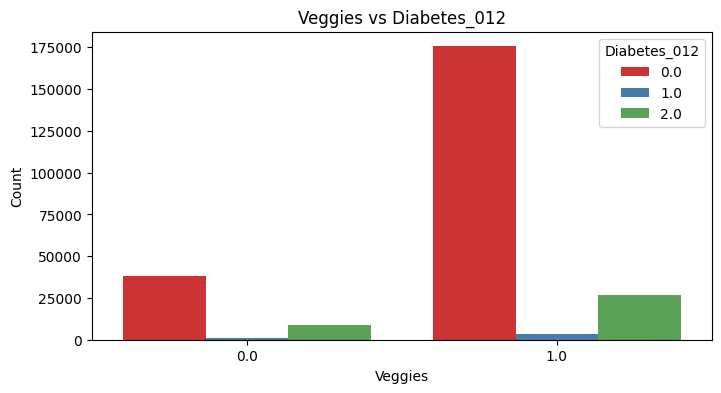

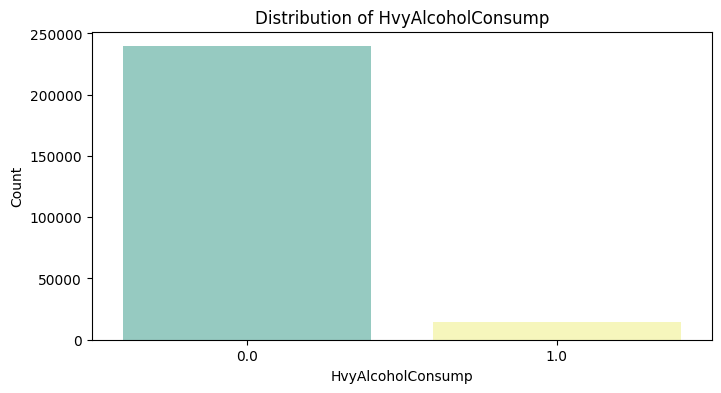

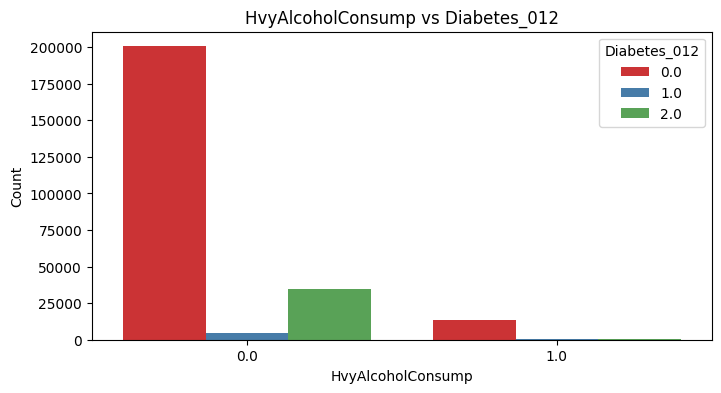

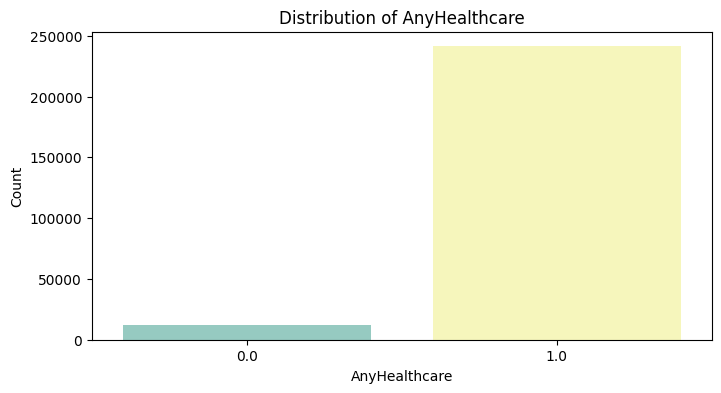

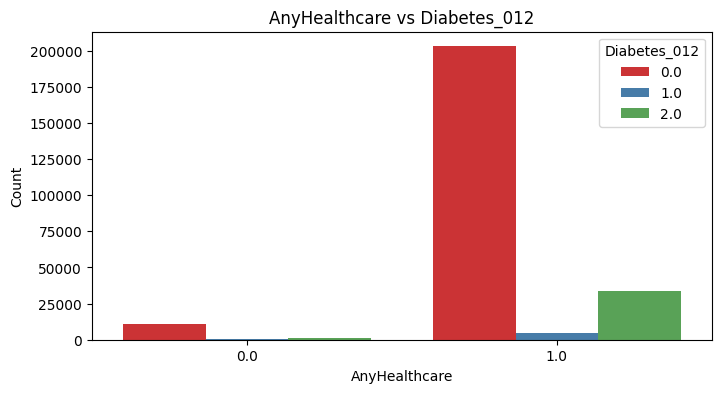

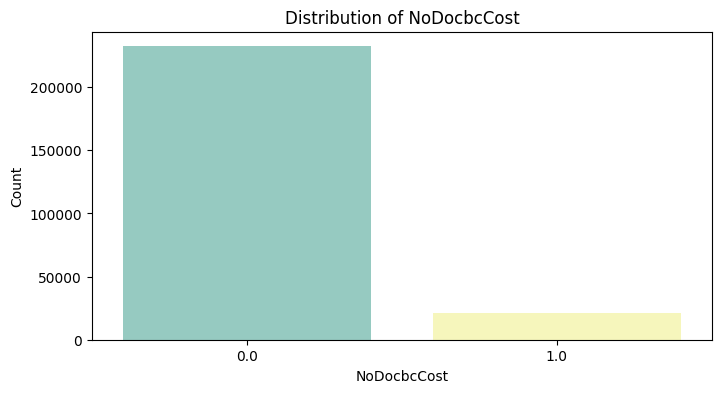

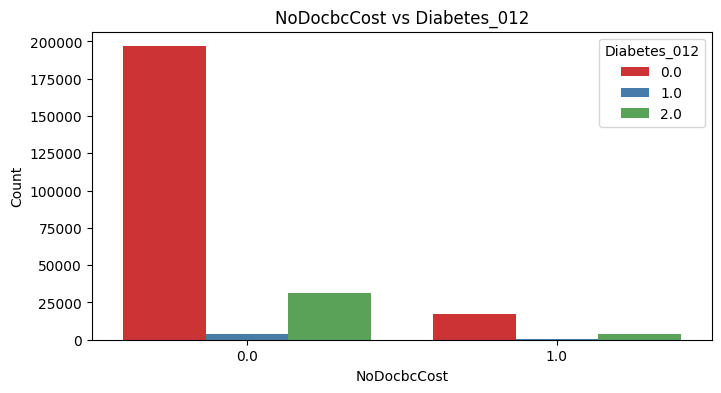

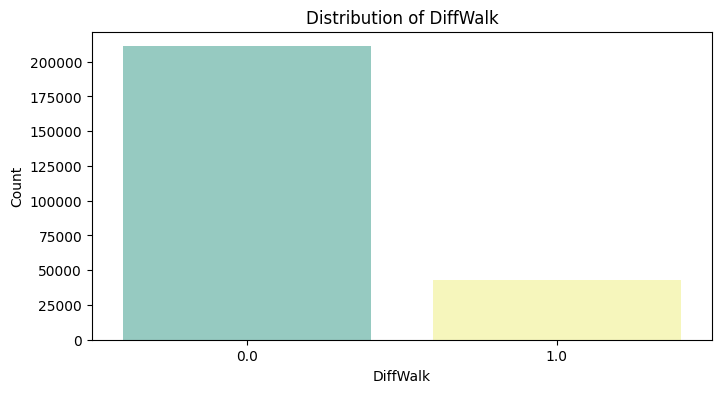

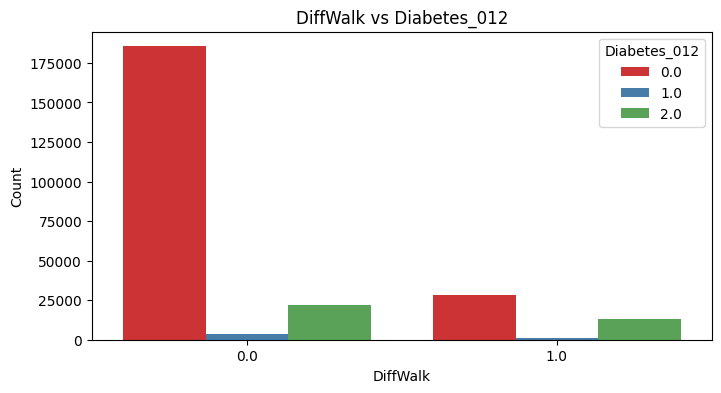

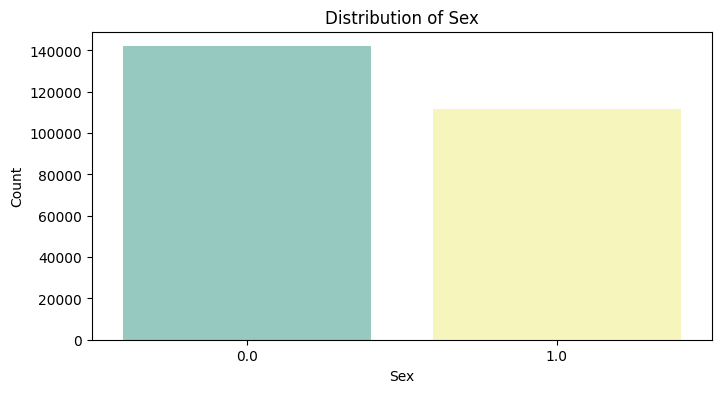

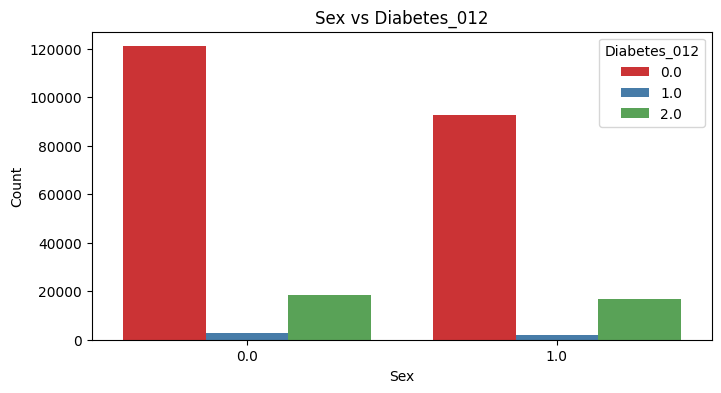

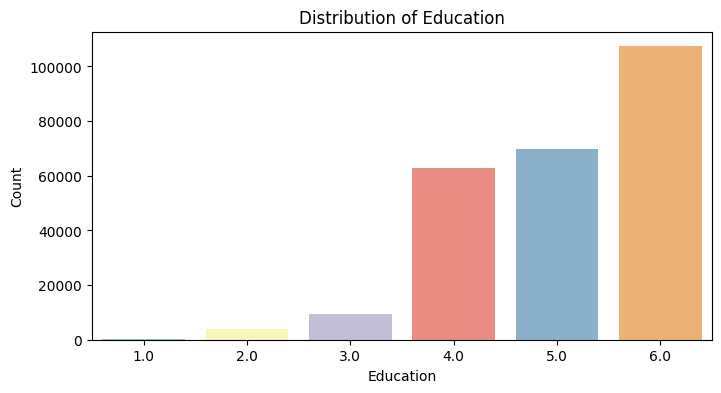

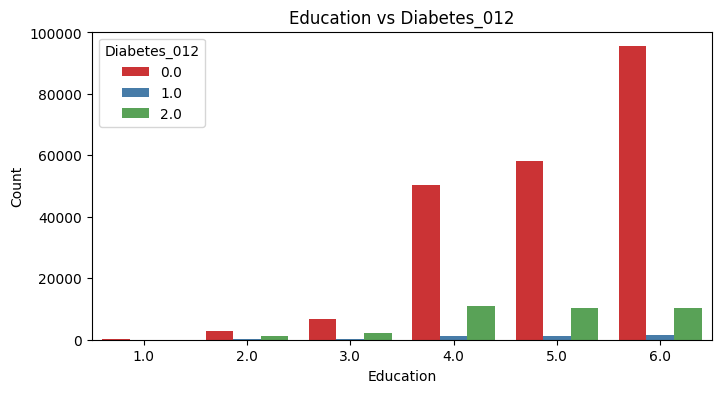

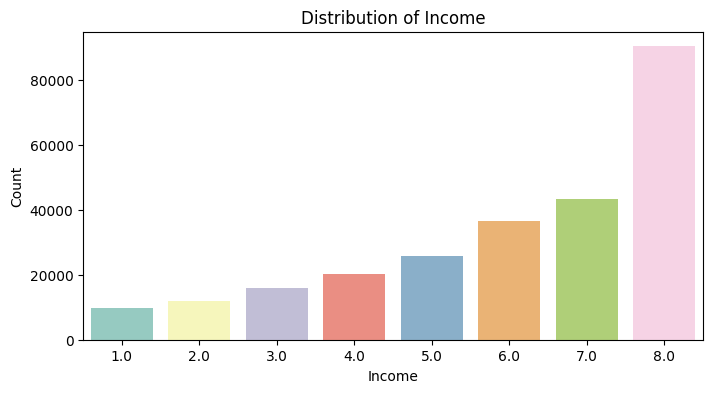

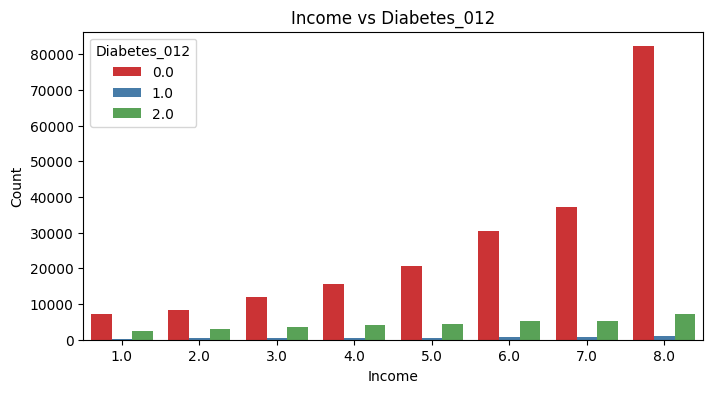

In [ ]:
categorical_features = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex', 'Education', 'Income'
]


for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, palette='Set3')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Diabetes_012', data=df, palette='Set1')
    plt.title(f'{feature} vs Diabetes_012')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diabetes_012')
    plt.show()


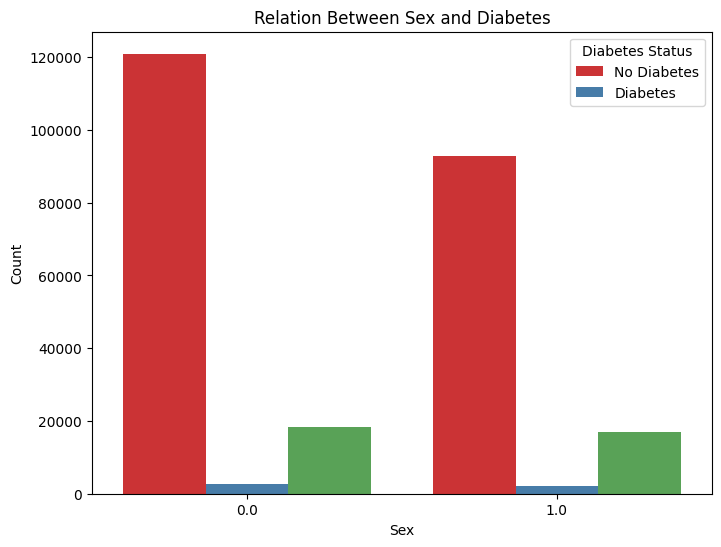

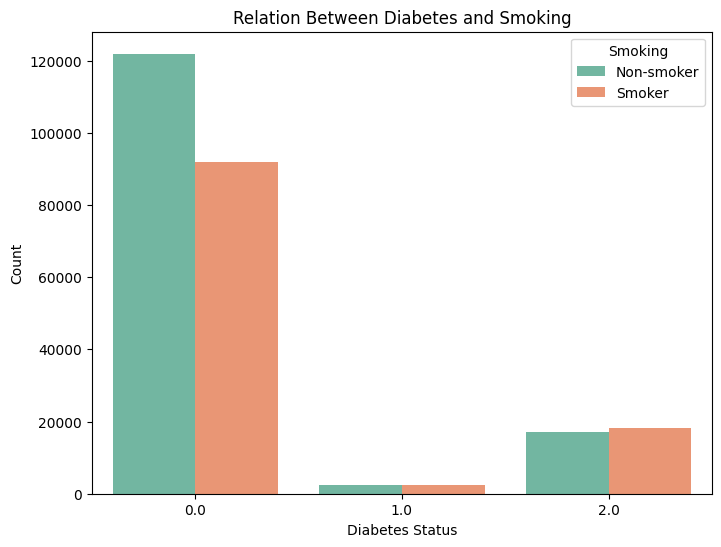

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Diabetes_012', palette='Set1')
plt.title('Relation Between Sex and Diabetes')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Diabetes'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_012', hue='Smoker', palette='Set2')
plt.title('Relation Between Diabetes and Smoking')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.legend(title='Smoking', labels=['Non-smoker', 'Smoker'])
plt.show()

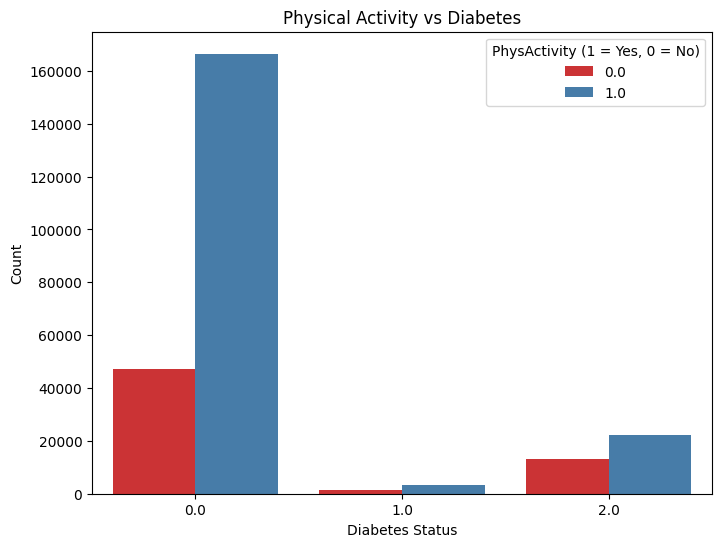

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', hue='PhysActivity', data=df, palette='Set1')
plt.title('Physical Activity vs Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.legend(title='PhysActivity (1 = Yes, 0 = No)')
plt.show()

Here we realize that
1- for high pressure it is related but there is more values that is not have high pressure but have  diabetes ,  so it slightly related
2- for high chol the same   but we notice that the 0 cases more than the  1 cases  it's slightly related  

so here based one data distribution we can know things  , but in general it is the middle

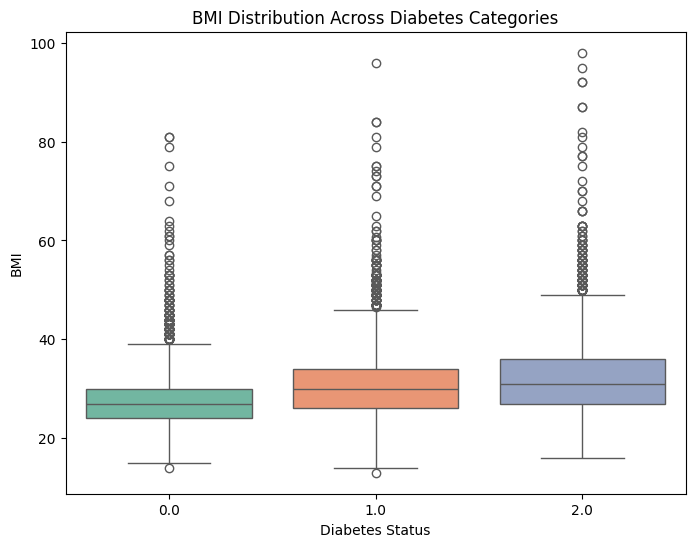

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data= balanced_df_smote, palette='Set2')
plt.title('BMI Distribution Across Diabetes Categories')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

There is range for the normal people  , and there is outliers also , larger bmi more likly to have diabets

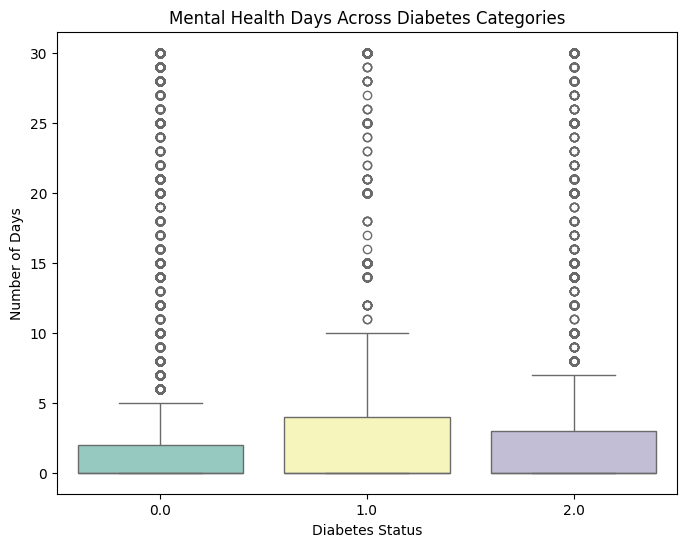

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_012', y='MentHlth', data=df, palette='Set3')
plt.title('Mental Health Days Across Diabetes Categories')
plt.xlabel('Diabetes Status')
plt.ylabel('Number of Days')
plt.show()

more days  u have not good mental health condition more liklly to doubt and have probalbility , but not necessaary .

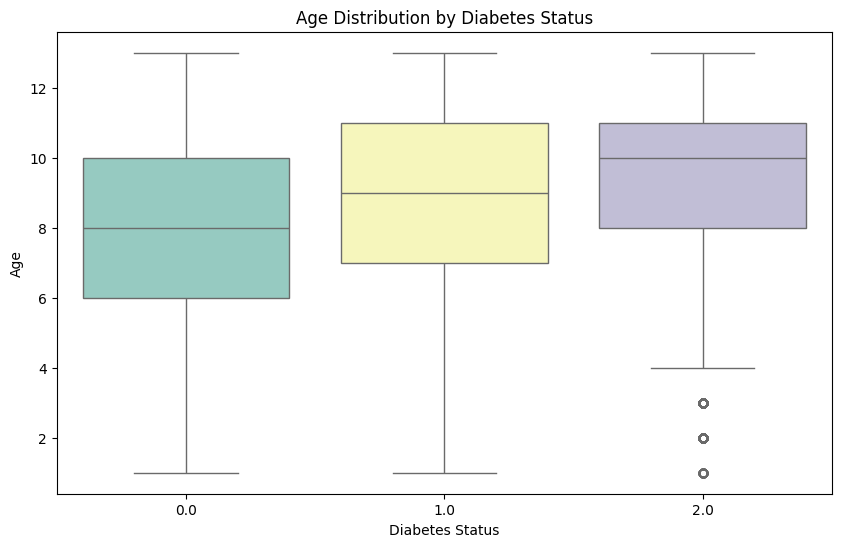

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_012', y='Age', palette='Set3')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()

8: 55-59 years 9: 60-64 years 10: 65-69 years   most likly to have diabetes or just dobt

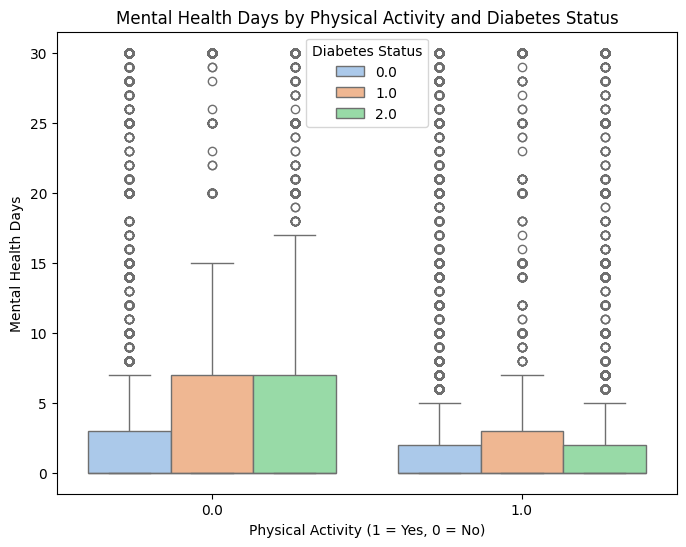

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='PhysActivity', y='MentHlth', hue='Diabetes_012', data=df, palette='pastel')
plt.title('Mental Health Days by Physical Activity and Diabetes Status')
plt.xlabel('Physical Activity (1 = Yes, 0 = No)')
plt.ylabel('Mental Health Days')
plt.legend(title='Diabetes Status')
plt.show()

we notice that if the physical activity 0  for the people who there mental health bad days  is less the more good for the people who don't hace diabets , for the other  they have mental health day more ,

but when there is physical activity and the mental health is not distrbuted to much betwen them all .


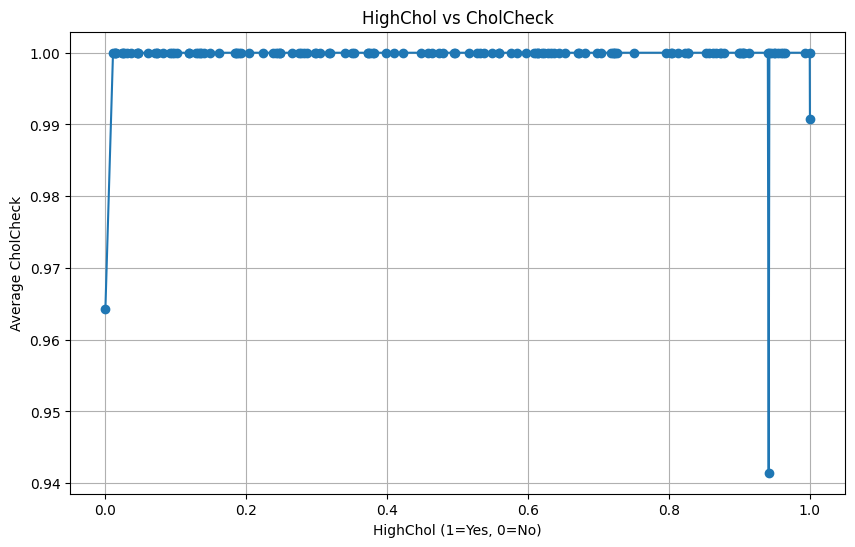

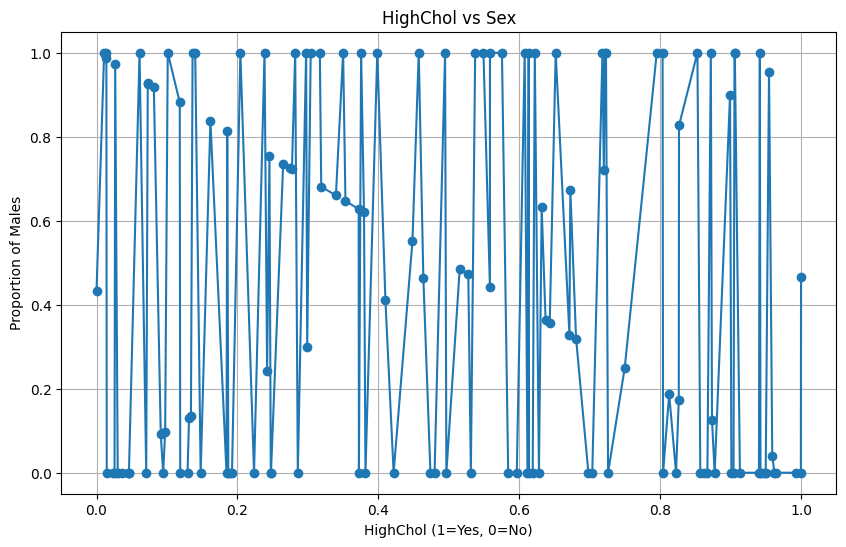

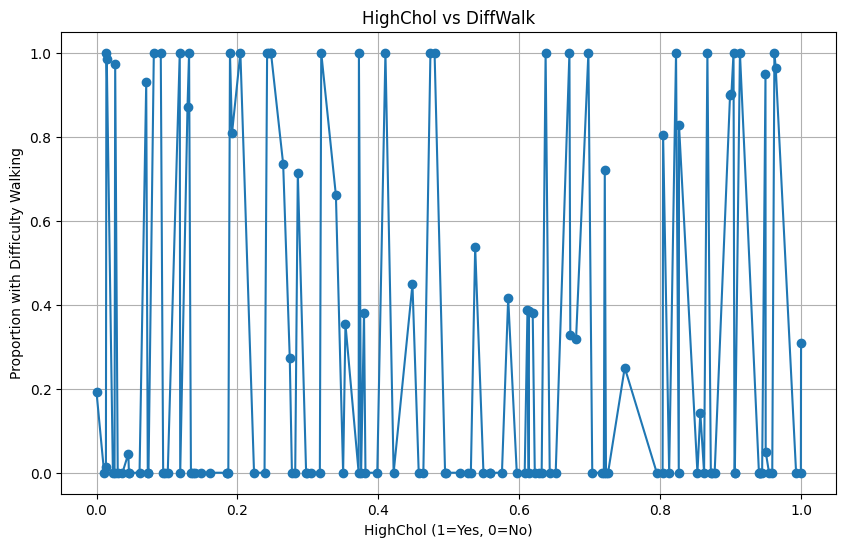

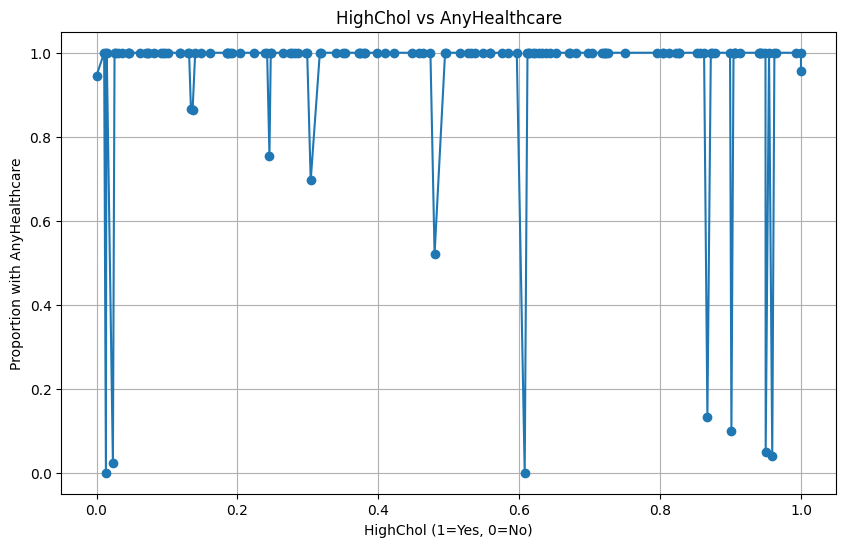

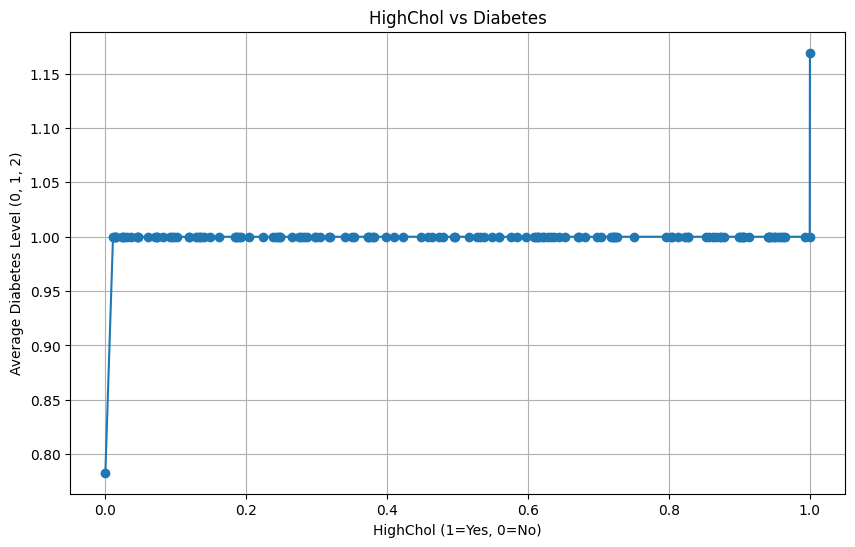

In [ ]:
chol_check_avg = balanced_df_smote.groupby("HighChol")["CholCheck"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_check_avg.index, chol_check_avg.values, marker='o')
plt.title("HighChol vs CholCheck")
plt.xlabel("HighChol (1=Yes, 0=No)")
plt.ylabel("Average CholCheck")
plt.grid()

chol_sex_avg = balanced_df_smote.groupby("HighChol")["Sex"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_sex_avg.index, chol_sex_avg.values, marker='o')
plt.title("HighChol vs Sex")
plt.xlabel("HighChol (1=Yes, 0=No)")
plt.ylabel("Proportion of Males")
plt.grid()

chol_diffwalk_avg = balanced_df_smote.groupby("HighChol")["DiffWalk"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_diffwalk_avg.index, chol_diffwalk_avg.values, marker='o')
plt.title("HighChol vs DiffWalk")
plt.xlabel("HighChol (1=Yes, 0=No)")
plt.ylabel("Proportion with Difficulty Walking")
plt.grid()

chol_healthcare_avg = balanced_df_smote.groupby("HighChol")["AnyHealthcare"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_healthcare_avg.index, chol_healthcare_avg.values, marker='o')
plt.title("HighChol vs AnyHealthcare")
plt.xlabel("HighChol (1=Yes, 0=No)")
plt.ylabel("Proportion with AnyHealthcare")
plt.grid()

chol_diabetes_avg = balanced_df_smote.groupby("HighChol")["Diabetes_012"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_diabetes_avg.index, chol_diabetes_avg.values, marker='o')
plt.title("HighChol vs Diabetes")
plt.xlabel("HighChol (1=Yes, 0=No)")
plt.ylabel("Average Diabetes Level (0, 1, 2)")
plt.grid()

chol_diabetes_avg = balanced_df_smote.groupby("Sex")["Diabetes_012"].mean()

plt.figure(figsize=(10, 6))
plt.plot(chol_diabetes_avg.index, chol_diabetes_avg.values, marker='o')
plt.title("Sex vs Diabetes")
plt.xlabel("Sex (1=Woman, 0=Man)")
plt.ylabel("Average Diabetes Level (0, 1, 2)")
plt.grid()
plt.show()

1-here we notice that more likely for them to check if they have high chol more likely to have there is outlier

2- high chol vs sex is not related actually

3- high chol and difficulty with walking also

4- high chol and diabetes is so related



In [ ]:
from scipy.stats import ttest_ind


diabetes = df[df['Diabetes_012'] == 2]['BMI']
no_diabetes = df[df['Diabetes_012'] == 0]['BMI']

t_stat, p_val = ttest_ind(diabetes, no_diabetes)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 113.81382298039709, P-value: 0.0


In [ ]:
diabetes_2 = df[df['Diabetes_012'] == 2]
diabetes_0 = df[df['Diabetes_012'] == 0]

columns_to_analyze = ['Income', 'Age', 'BMI']

def calculate_stats(data, columns):
    stats = {}
    for col in columns:
        stats[col] = {
            'Mean': data[col].mean(),
            'Median': data[col].median(),
            'Standard Deviation': data[col].std()
        }
    return stats

stats_diabetes_2 = calculate_stats(diabetes_2, columns_to_analyze)

stats_diabetes_0 = calculate_stats(diabetes_0, columns_to_analyze)

print("Statistics when Diabetes_012 == 2")
print(pd.DataFrame(stats_diabetes_2).T)

print("\nStatistics when Diabetes_012 == 0")
print(pd.DataFrame(stats_diabetes_0).T)

Statistics when Diabetes_012 == 2
             Mean  Median  Standard Deviation
Income   5.210094     6.0            2.217319
Age      9.379053    10.0            2.330273
BMI     31.944011    31.0            7.363401

Statistics when Diabetes_012 == 0
             Mean  Median  Standard Deviation
Income   6.208663     7.0            2.005203
Age      7.786559     8.0            3.104942
BMI     27.742521    27.0            6.260993


we notice that  the more income more he is good ,
more age he is more likely to have
more bmi also more likely to have

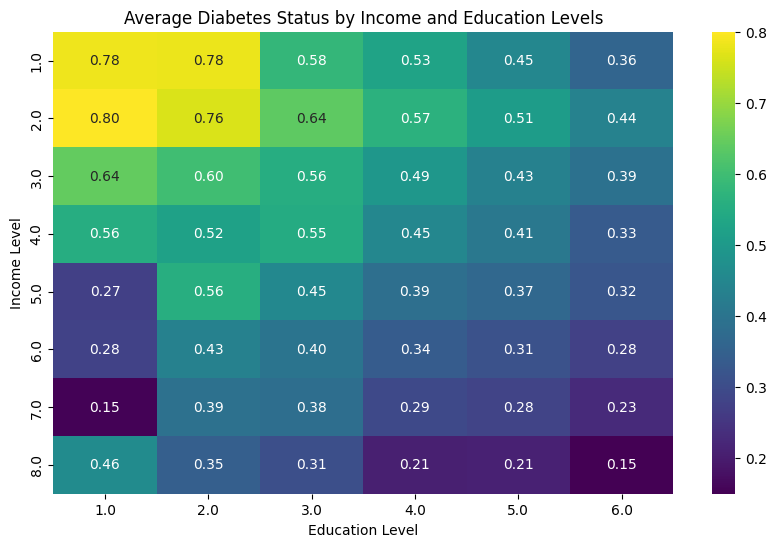

Education       1.0       2.0       3.0       4.0       5.0       6.0
Income                                                               
1.0        0.783784  0.781111  0.580078  0.526433  0.450144  0.358072
2.0        0.800000  0.762483  0.638908  0.565857  0.506486  0.435599
3.0        0.642857  0.600000  0.555881  0.493780  0.431818  0.391119
4.0        0.555556  0.522314  0.548520  0.449994  0.409826  0.334677
5.0        0.272727  0.558577  0.452681  0.385806  0.367992  0.323729
6.0        0.277778  0.433447  0.400651  0.336737  0.312354  0.276556
7.0        0.153846  0.388889  0.381356  0.292773  0.280269  0.227549
8.0        0.461538  0.345070  0.305970  0.207057  0.209080  0.149735


In [ ]:
pivot_table = df.pivot_table(index='Income', columns='Education', values='Diabetes_012', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Diabetes Status by Income and Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Income Level')
plt.show()
print(pivot_table)

here avg diabets more  is more likly when they have both education and income in the basic steps

<Figure size 1000x600 with 0 Axes>

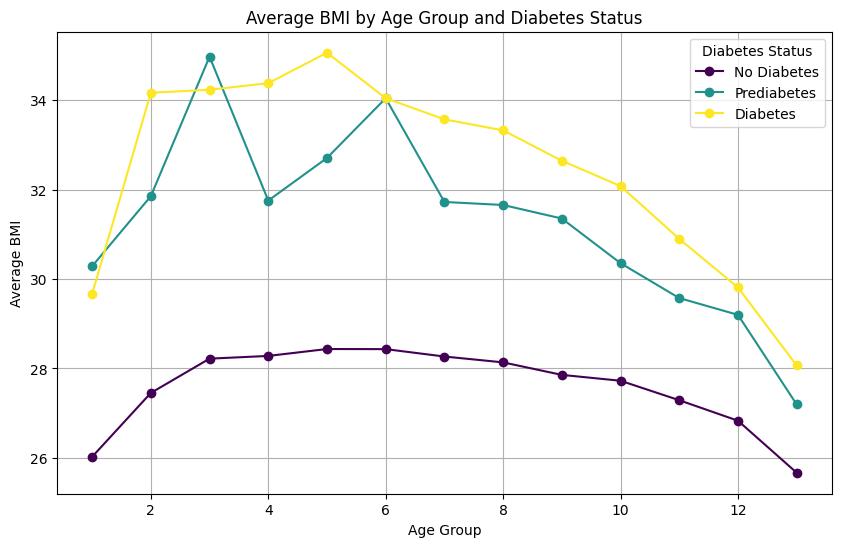

In [ ]:
age_bmi = df.groupby(['Age', 'Diabetes_012'])['BMI'].mean().unstack()
plt.figure(figsize=(10, 6))
age_bmi.plot(kind='line', marker='o', colormap='viridis', figsize=(10, 6))
plt.title('Average BMI by Age Group and Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Average BMI')
plt.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Diabetes Status')
plt.grid()
plt.show()

Again More BMI is more likly to have

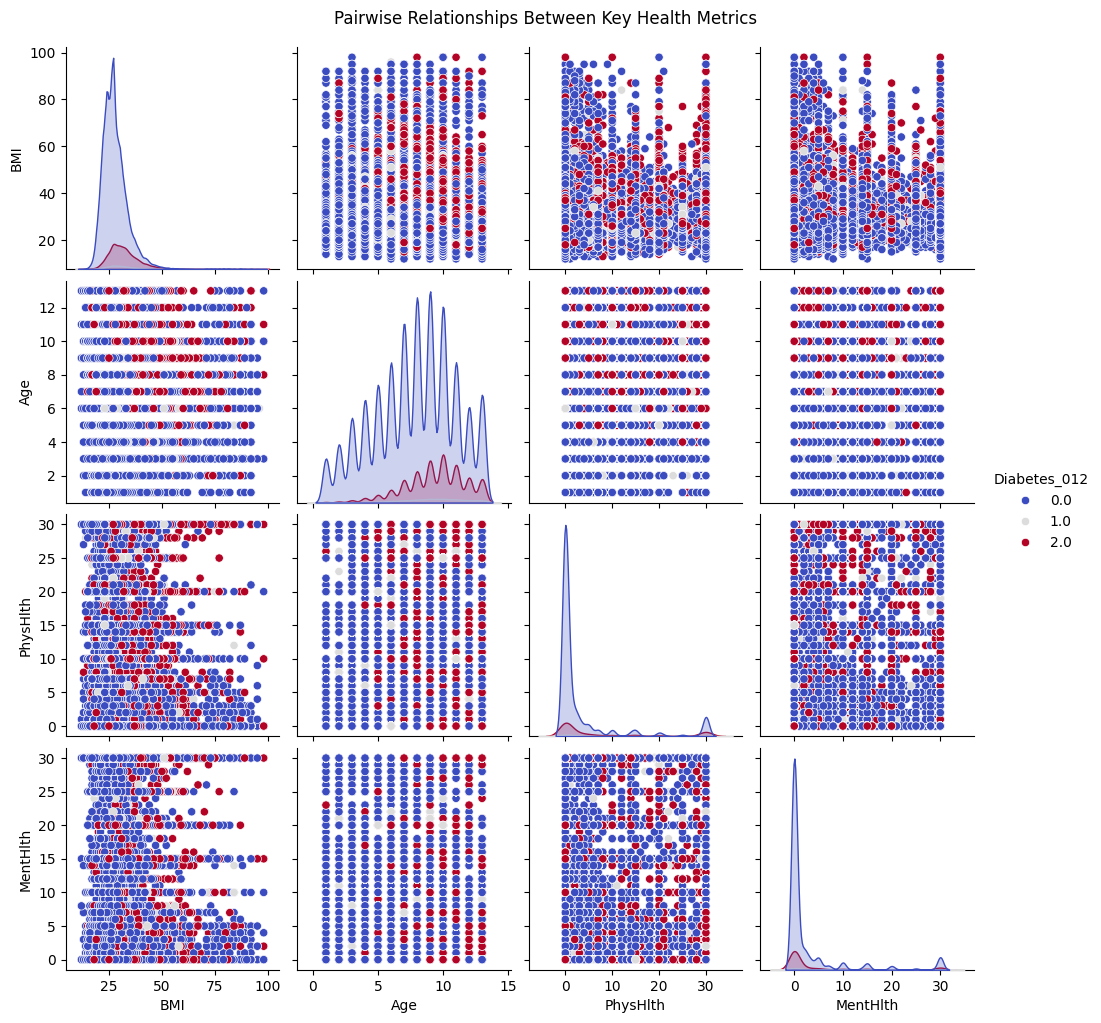

In [ ]:
selected_columns = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'Diabetes_012']
sns.pairplot(df[selected_columns], hue='Diabetes_012', palette='coolwarm', diag_kind='kde', height=2.5)
plt.suptitle('Pairwise Relationships Between Key Health Metrics', y=1.02)
plt.show()

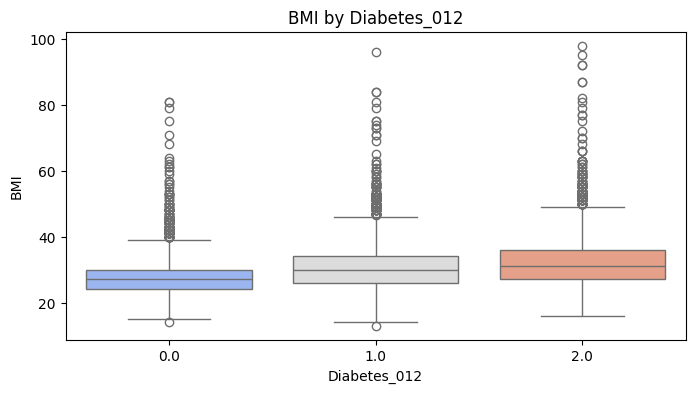

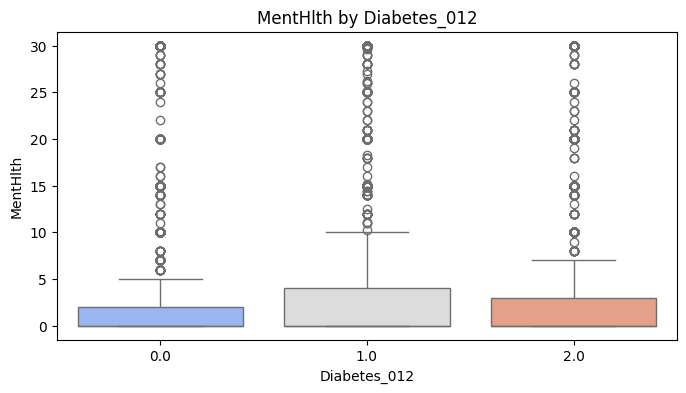

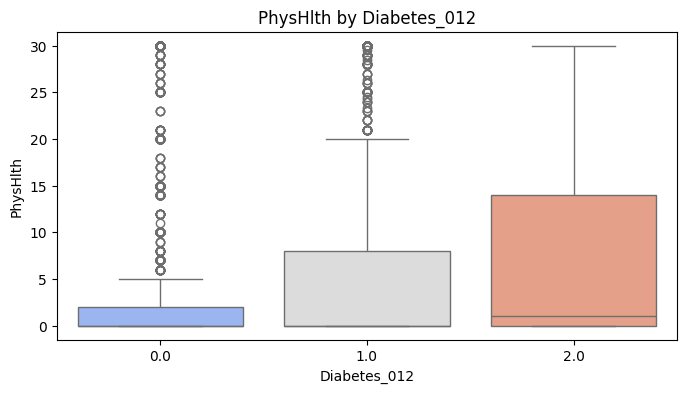

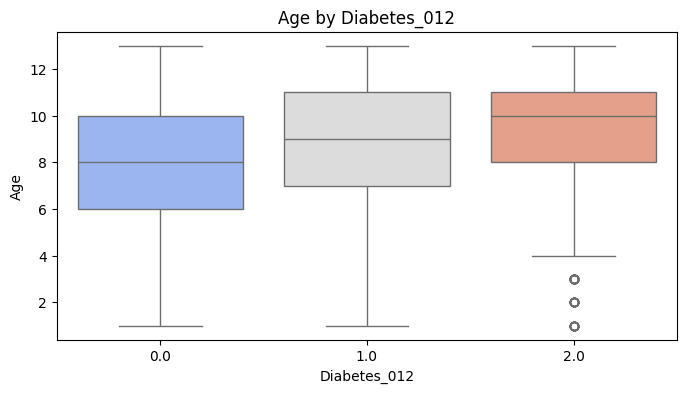

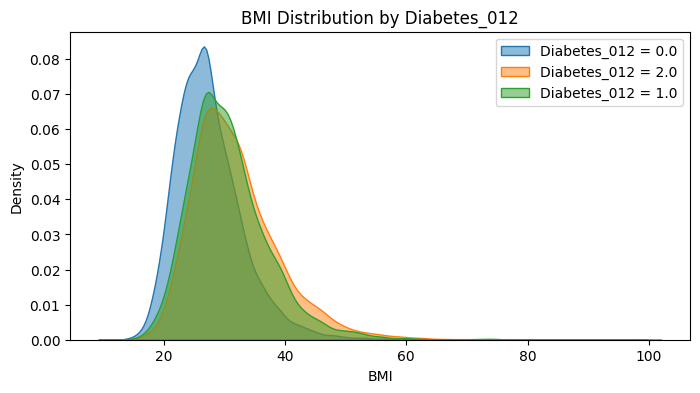

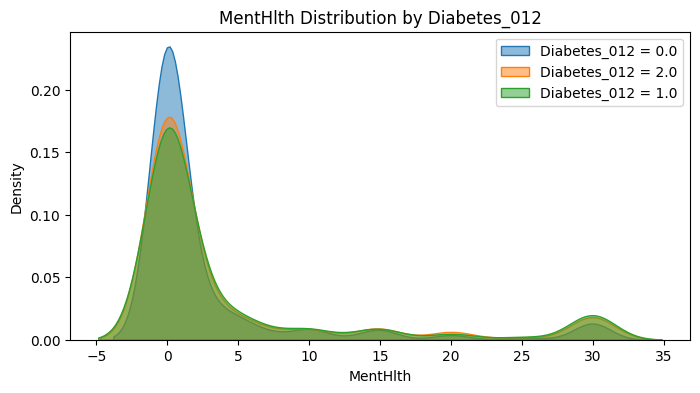

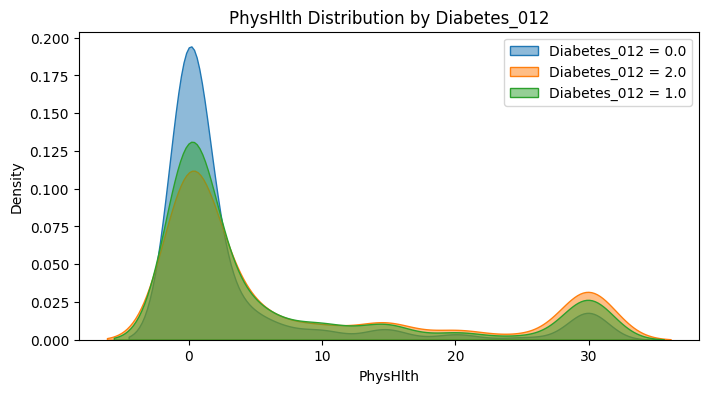

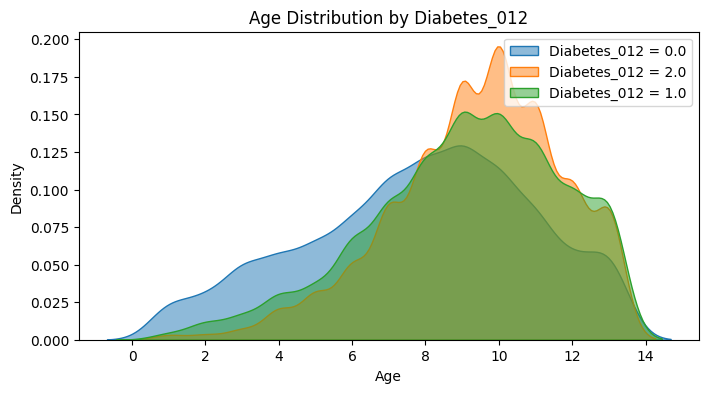

In [ ]:
numerical_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Diabetes_012', y=feature, data=balanced_df_smote, palette='coolwarm')
    plt.title(f'{feature} by Diabetes_012')
    plt.xlabel('Diabetes_012')
    plt.ylabel(feature)
    plt.show()

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    for level in balanced_df_smote['Diabetes_012'].unique():
        sns.kdeplot(balanced_df_smote[balanced_df_smote['Diabetes_012'] == level][feature], label=f'Diabetes_012 = {level}', fill=True, alpha=0.5)
    plt.title(f'{feature} Distribution by Diabetes_012')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


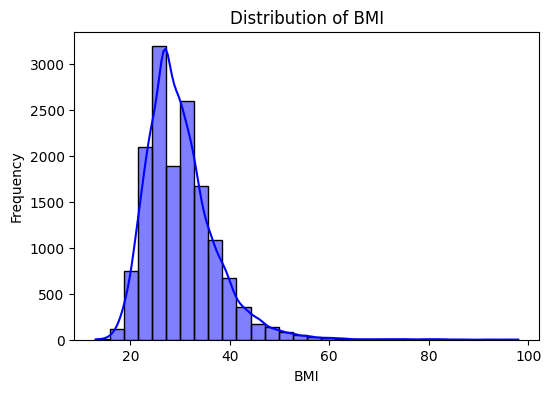

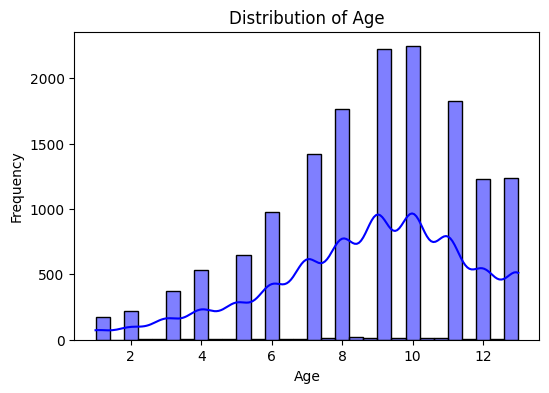

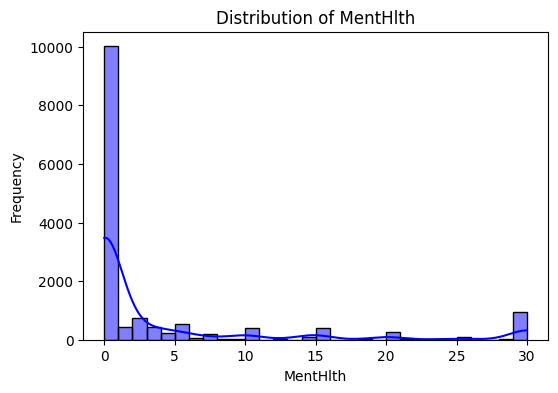

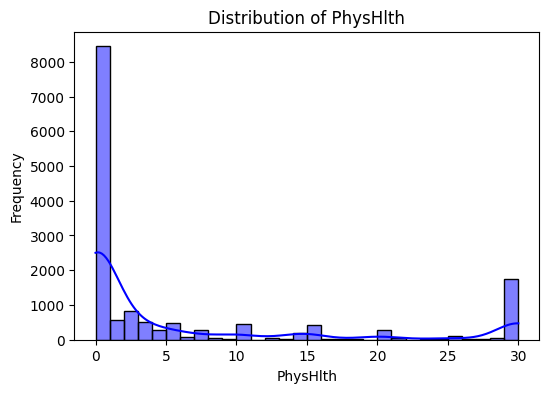

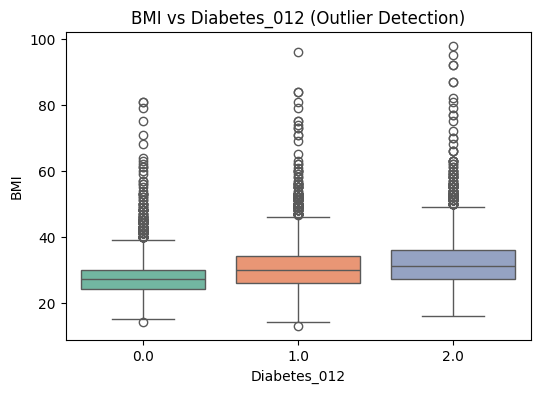

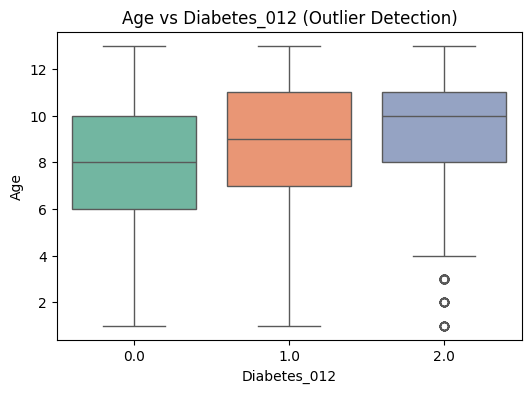

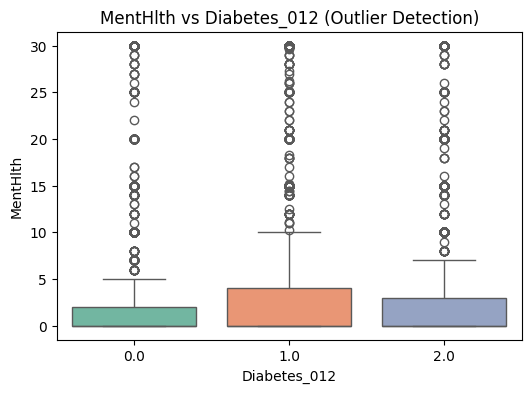

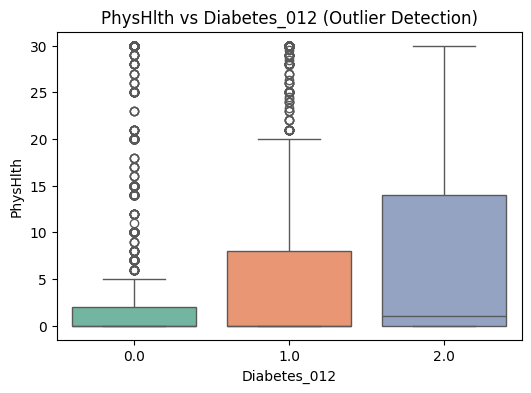

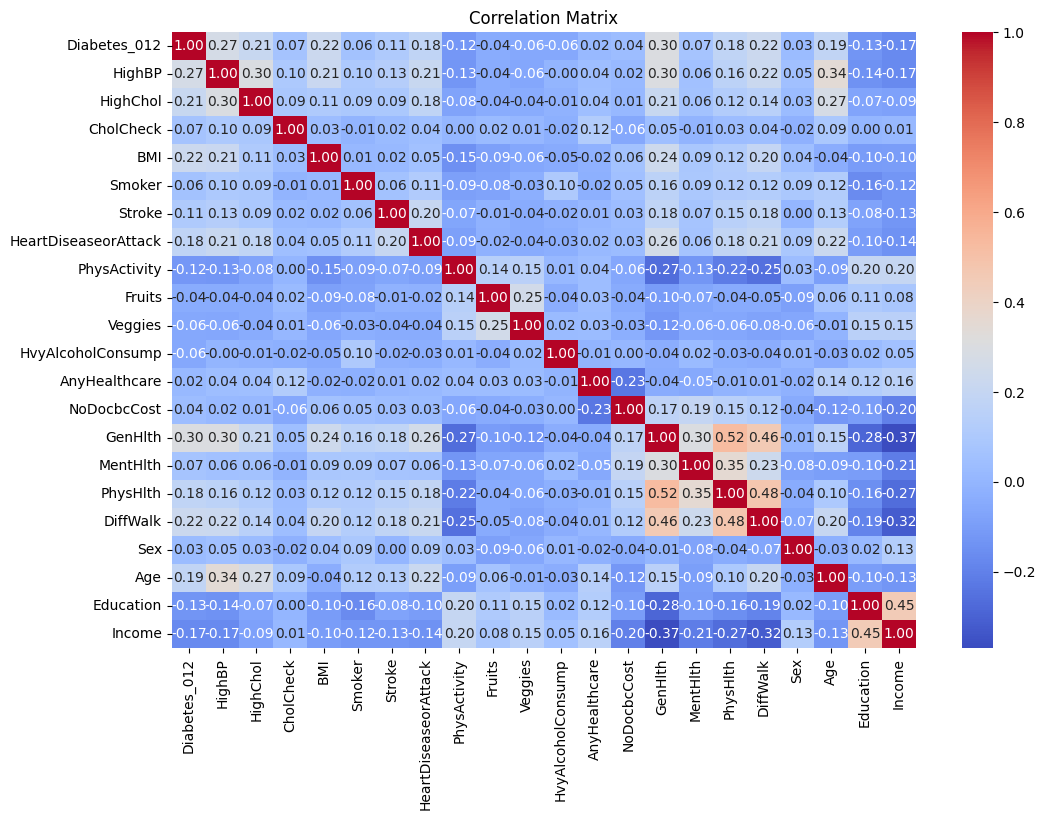

Pairwise Correlation with Diabetes_012:
Diabetes_012            1.000000
GenHlth                 0.302587
HighBP                  0.271596
BMI                     0.224379
DiffWalk                0.224239
HighChol                0.209085
Age                     0.185026
HeartDiseaseorAttack    0.180272
PhysHlth                0.176287
Stroke                  0.107179
MentHlth                0.073507
CholCheck               0.067546
Smoker                  0.062914
NoDocbcCost             0.035436
Sex                     0.031040
AnyHealthcare           0.015410
Fruits                 -0.042192
HvyAlcoholConsump      -0.057882
Veggies                -0.058972
PhysActivity           -0.121947
Education              -0.130517
Income                 -0.171483
Name: Diabetes_012, dtype: float64


In [ ]:
continuous_vars = ["BMI", "Age", "MentHlth", "PhysHlth"]
for col in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(balanced_df_smote[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

for col in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=balanced_df_smote, x="Diabetes_012", y=col, palette="Set2")
    plt.title(f"{col} vs Diabetes_012 (Outlier Detection)")
    plt.xlabel("Diabetes_012")
    plt.ylabel(col)
    plt.show()

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

target_corr = corr_matrix["Diabetes_012"].sort_values(ascending=False)
print("Pairwise Correlation with Diabetes_012:")
print(target_corr)

Strongest Positive Correlations:
GenHlth (0.30): A strong positive correlation indicates that poor general health is associated with a higher likelihood of diabetes.

HighBP (0.27): Hypertension is significantly linked to diabetes prevalence.

BMI (0.22): Higher BMI (indicative of overweight/obesity) is positively correlated with diabetes.

DiffWalk (0.22): Difficulty walking is a notable factor associated with diabetes.

HighChol (0.21): High cholesterol levels are correlated with diabetes.
Moderate Positive Correlations:

Age (0.18): Older individuals are more likely to have diabetes.

HeartDiseaseorAttack (0.18): A history of heart disease is moderately correlated with diabetes.

PhysHlth (0.18): Poor physical health days show a moderate positive correlation.




Weak Positive Correlations:

Stroke (0.11): Having a history of stroke shows a weaker but still notable correlation.

MentHlth (0.07): Mental health issues have a slight positive correlation.

CholCheck (0.07): Checking cholesterol levels is weakly positively correlated.



Negative Correlations:

PhysActivity (-0.12): Regular physical activity is negatively correlated, indicating that more physical activity reduces the likelihood of diabetes.

Education (-0.13): Higher education levels are associated with lower diabetes prevalence.

Income (-0.17): Higher income levels correlate with a lower likelihood of diabetes.


Veggies (-0.06) & Fruits (-0.04): Higher vegetable and fruit consumption are weakly associated with lower diabetes prevalence.
HvyAlcoholConsump (-0.06): Heavy alcohol consumption shows a slight negative correlation.

In [ ]:
custom_palette = {0: "blue", 1: "orange", 2: "green"}
sns.pairplot(balanced_df_smote )
plt.show()


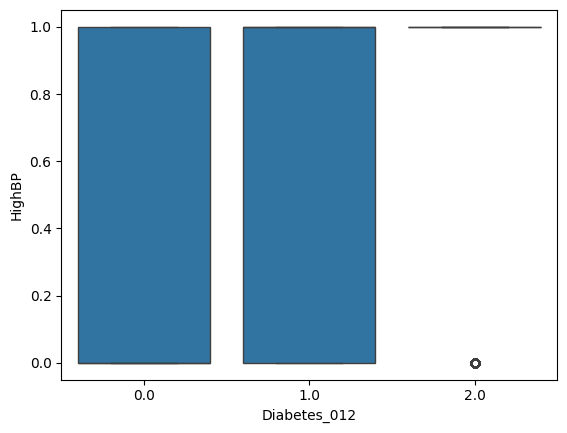

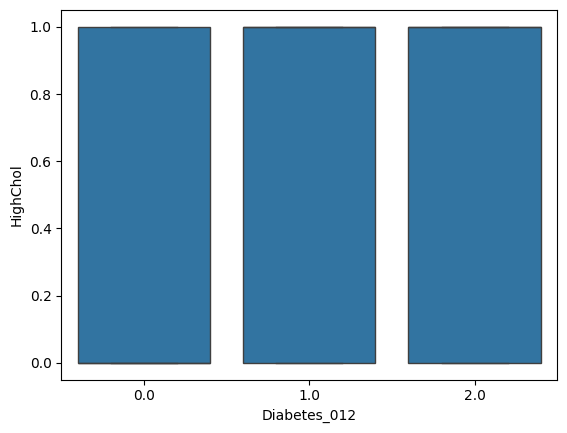

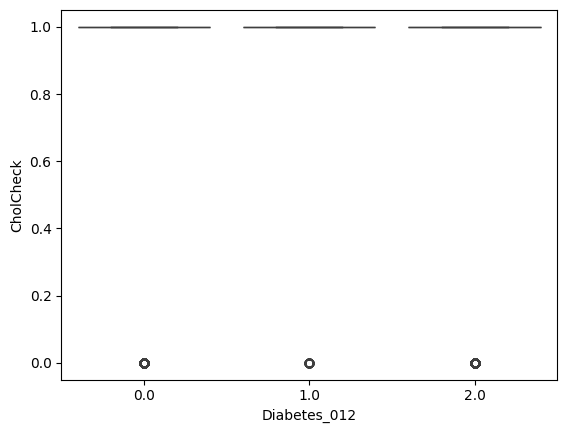

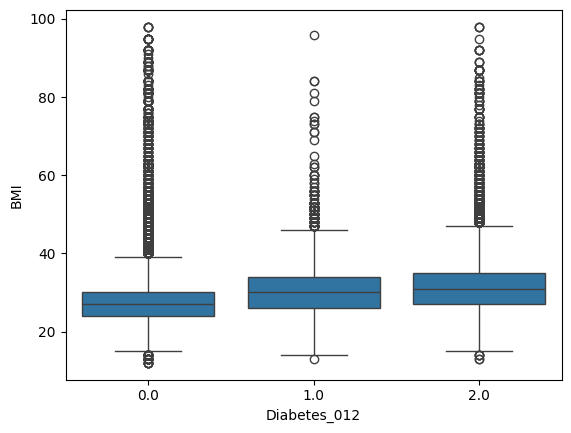

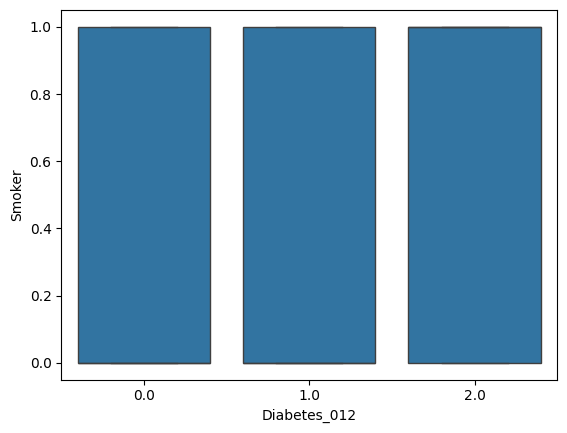

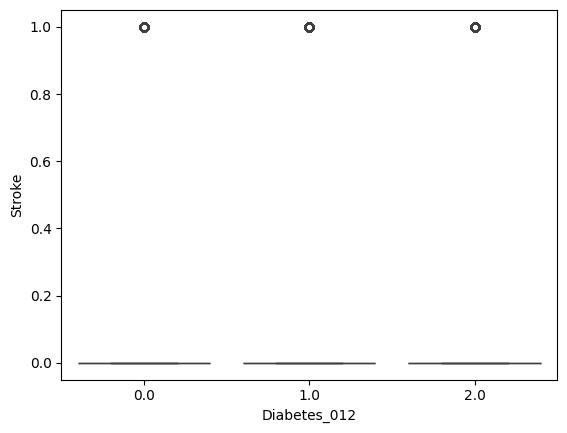

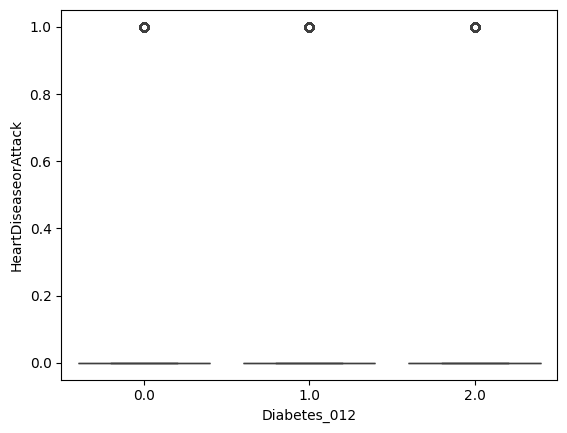

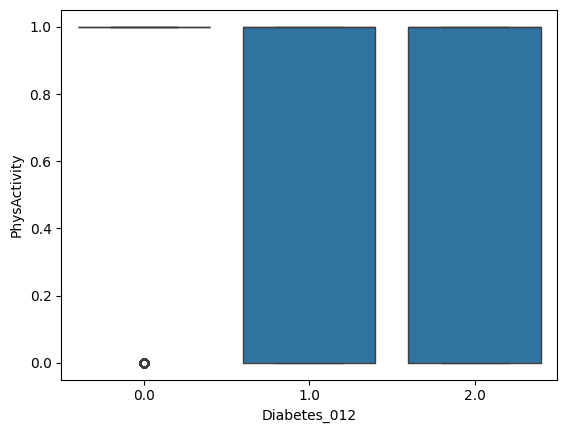

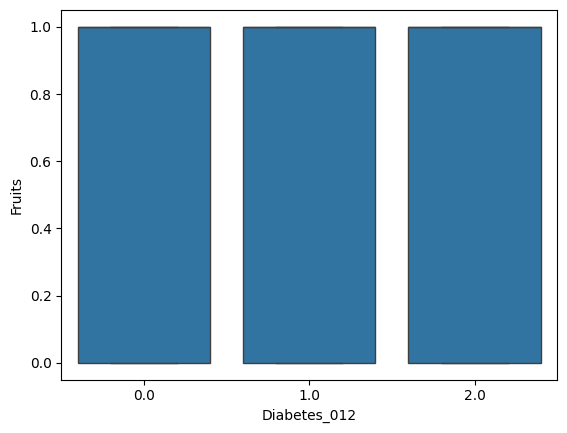

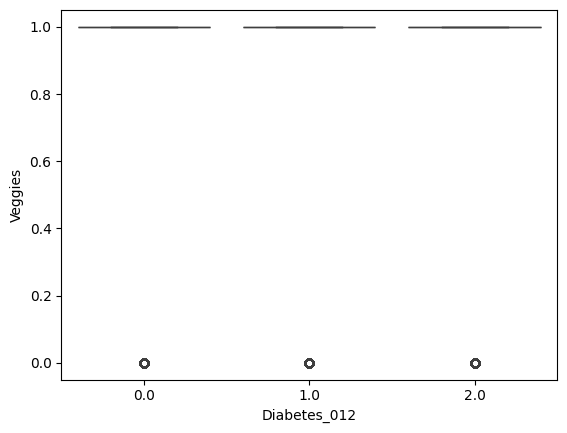

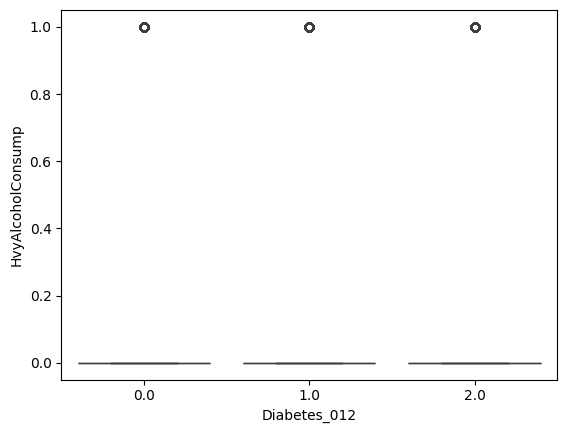

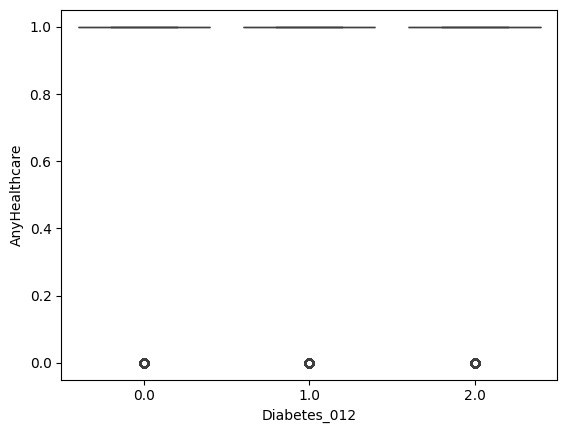

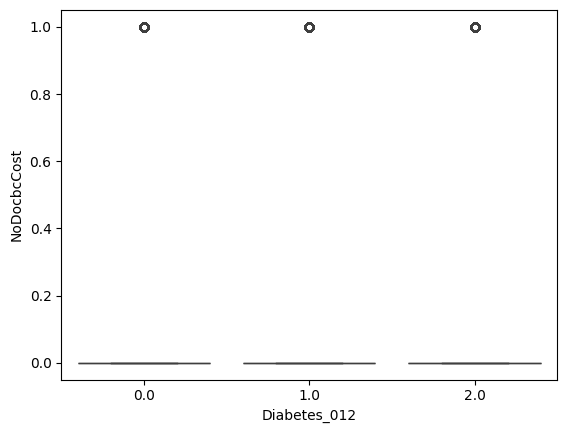

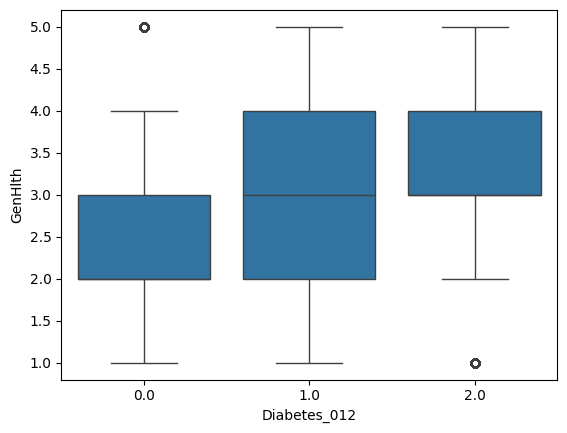

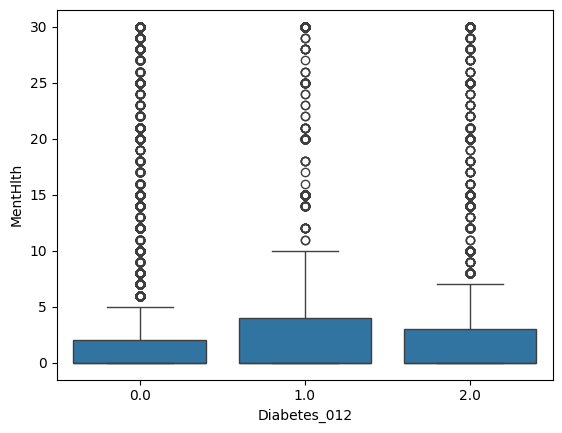

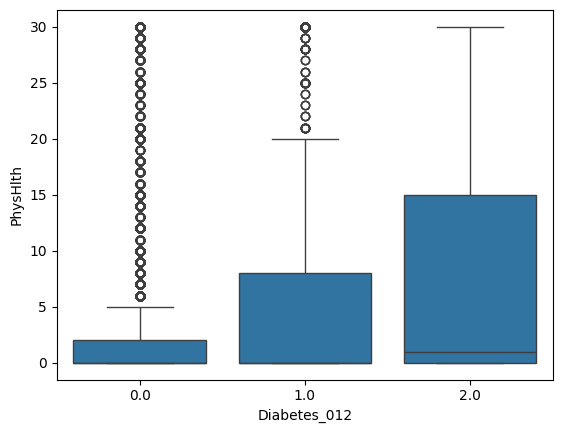

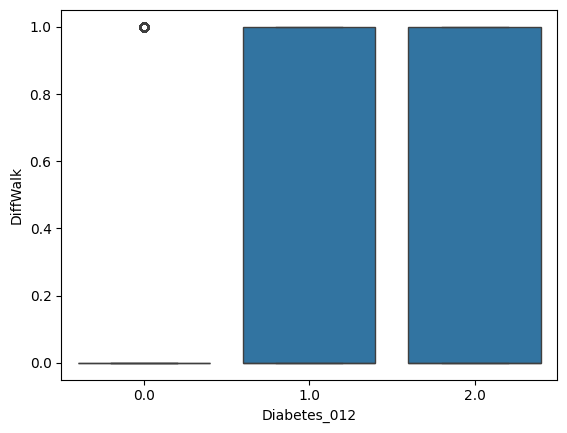

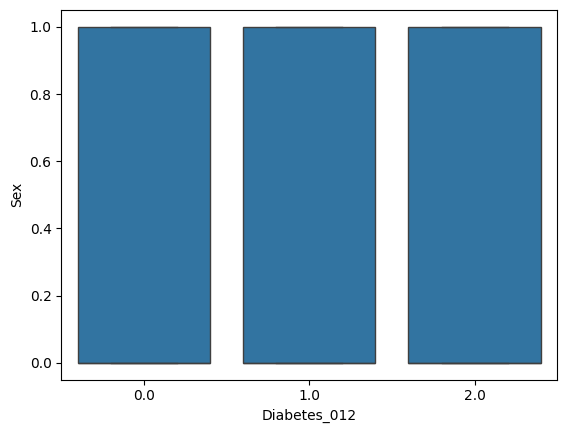

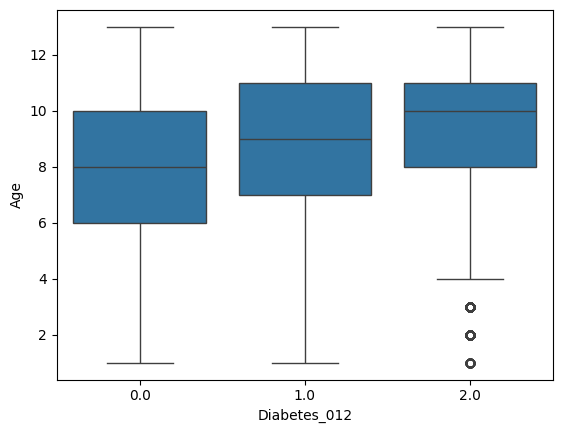

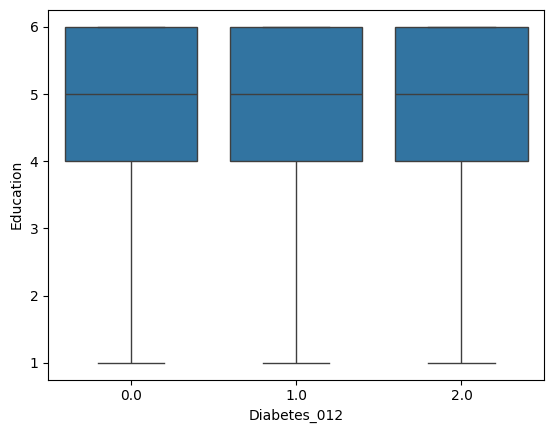

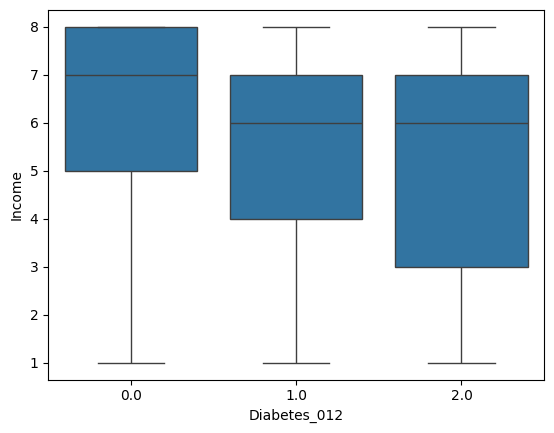

In [ ]:
for feature in X.columns:
    sns.boxplot(x='Diabetes_012', y=feature, data=df)
    plt.show()

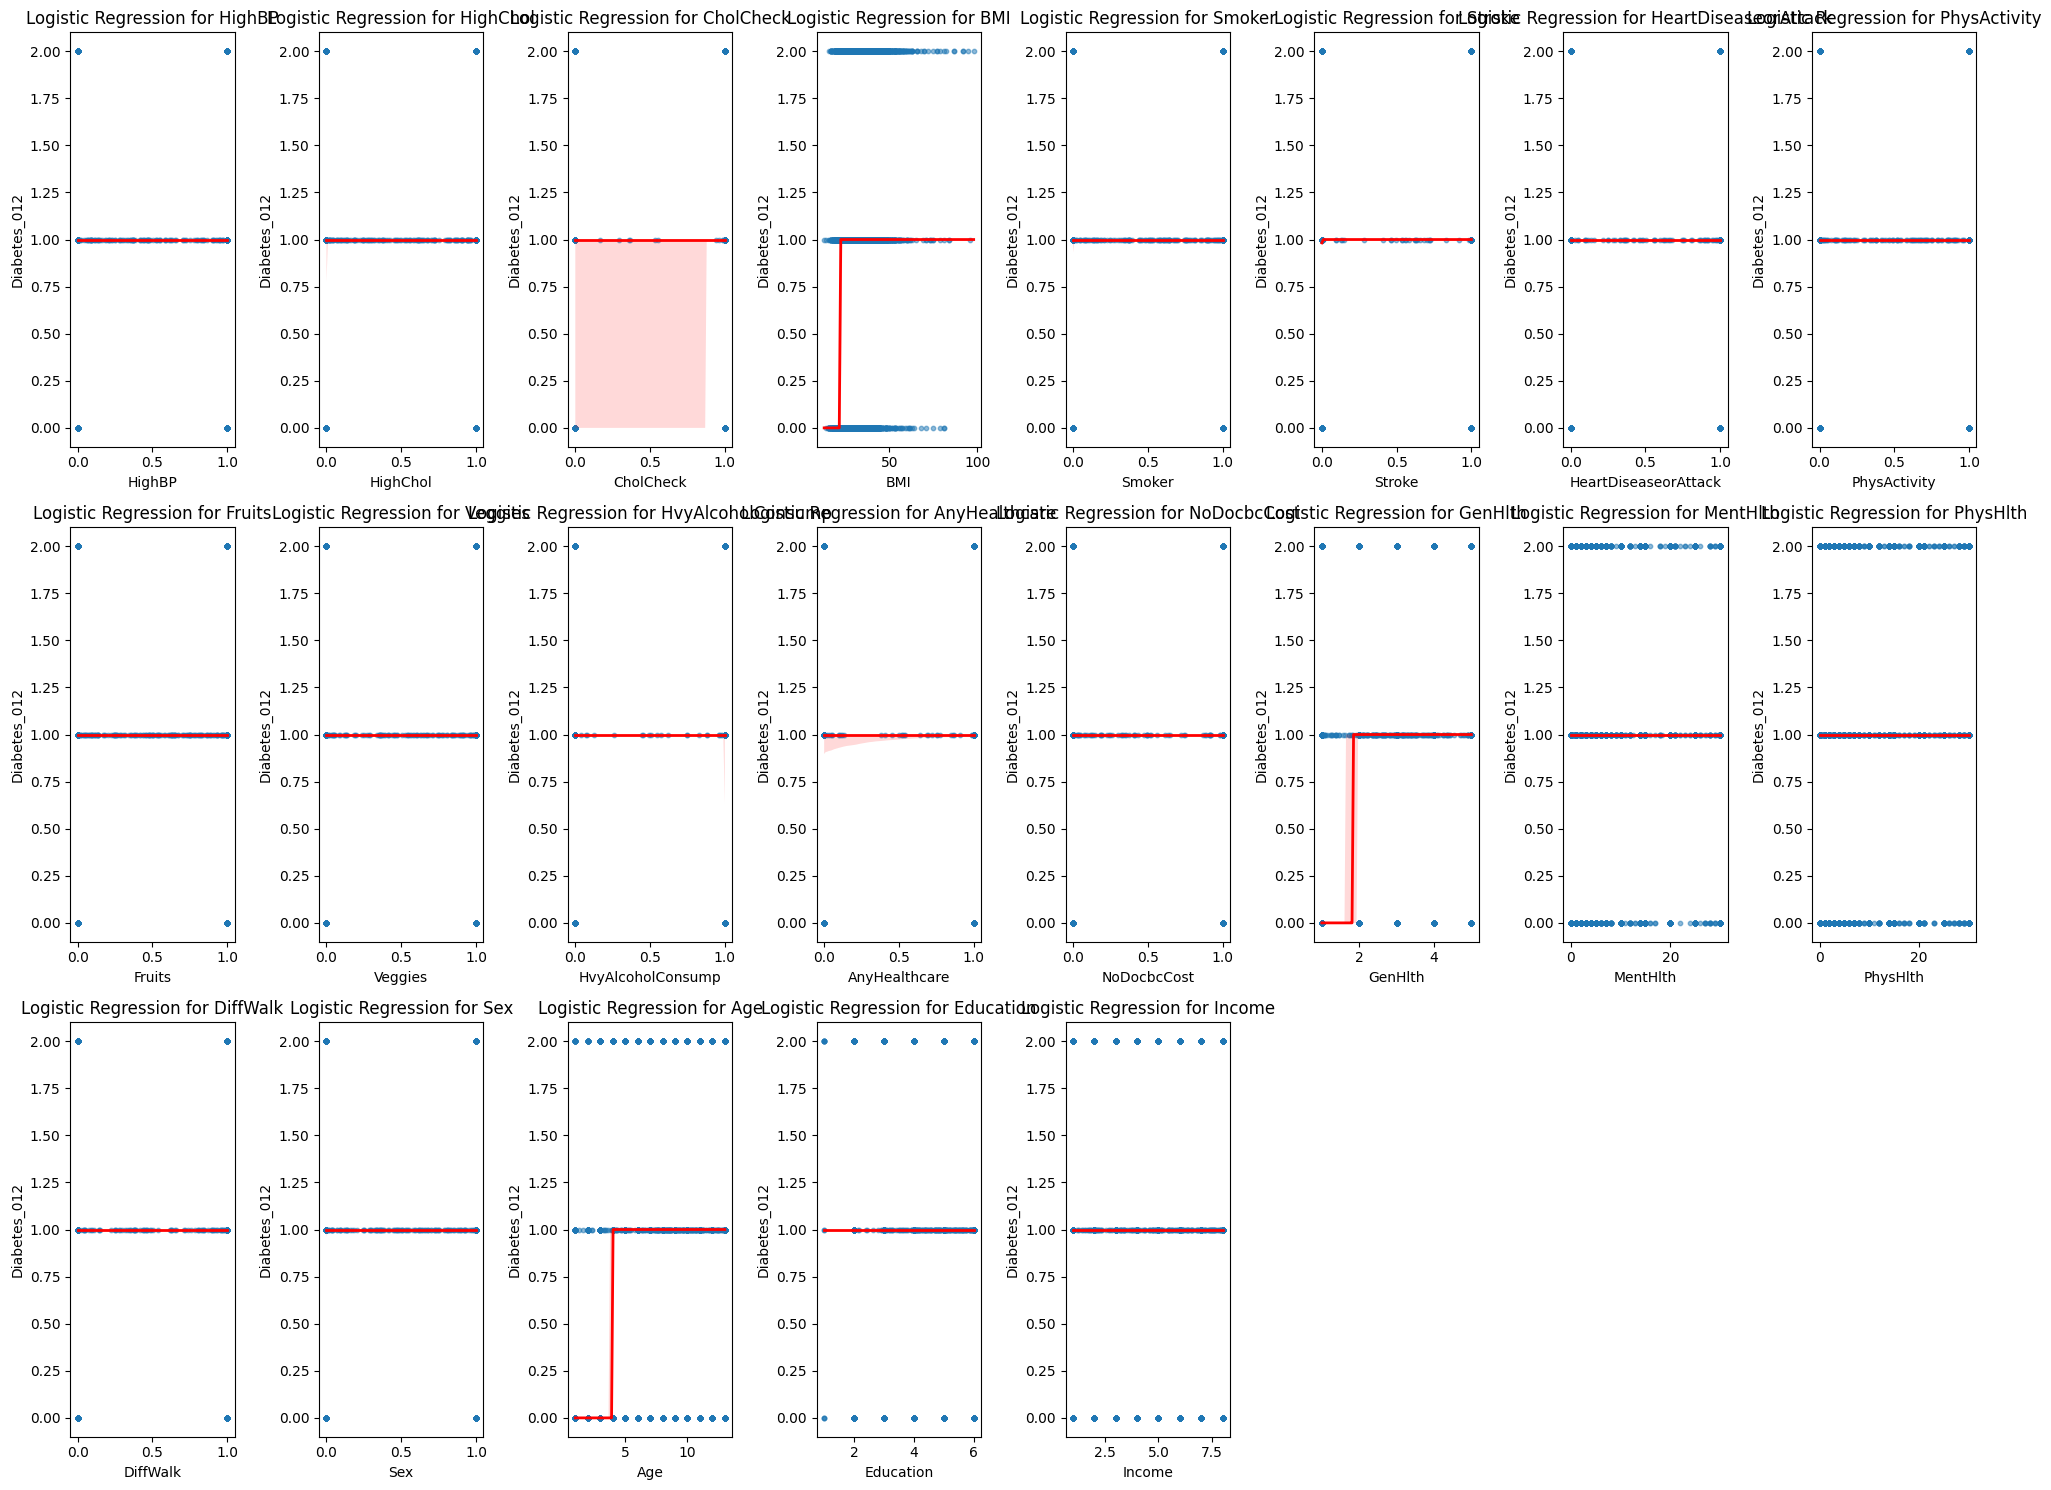

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_columns = [col for col in balanced_df_smote.columns if col != 'Diabetes_012']

plt.figure(figsize=(20, 15))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, len(continuous_columns) // 3 + 1, i)
    sns.regplot(
        data=balanced_df_smote,
        x=col,
        y='Diabetes_012',
        logistic=True,
        scatter_kws={'s': 10, 'alpha': 0.5},
        line_kws={"color": "red", "linewidth": 2}
    )
    plt.title(f'Logistic Regression for {col}')
    plt.xlabel(col)
    plt.ylabel('Diabetes_012')

plt.tight_layout()
plt.show()

Model Coefficients: [[-0.3758106  -0.37904745 -0.68327984 -0.03860713  0.01404333 -0.00432518
  -0.06690559  0.01299893  0.02023953  0.03830049  0.30013888  0.00252489
  -0.13716564 -0.28191592 -0.00178767  0.00455079 -0.05506876 -0.12862062
  -0.08397427  0.03927646  0.0389009 ]
 [-0.00658607  0.17732145  0.08849579  0.01375399 -0.02103377 -0.12597174
  -0.10027409  0.02335424  0.00412153 -0.03645094  0.13351257 -0.06328574
   0.23707808  0.02331803  0.0067547  -0.00149577 -0.03652004 -0.00434996
   0.04064415 -0.04420679 -0.0235862 ]
 [ 0.38239666  0.201726    0.59478405  0.02485315  0.00699044  0.13029691
   0.16717968 -0.03635317 -0.02436106 -0.00184955 -0.43365145  0.06076084
  -0.09991244  0.25859789 -0.00496703 -0.00305502  0.0915888   0.13297059
   0.04333013  0.00493034 -0.01531471]]
Intercept: [ 5.17767579 -2.44653605 -2.73113974]
Training Accuracy: 0.846031417533901
Testing Accuracy: 0.8481945758435825
Classification Report:
               precision    recall  f1-score   sup

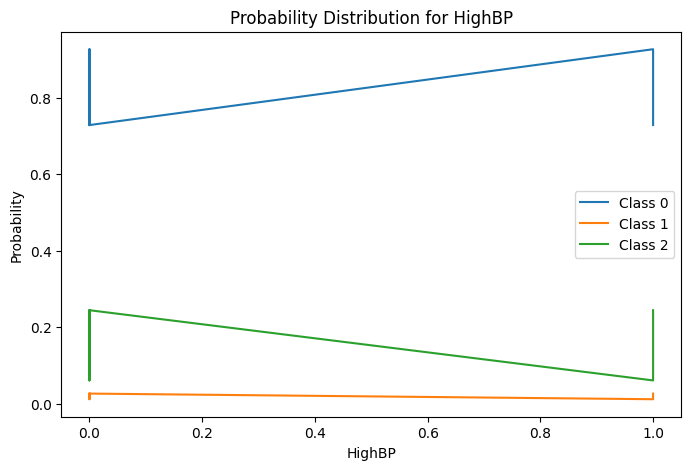


Training model with feature: HighChol
Training Accuracy for HighChol: 0.8421
Testing Accuracy for HighChol: 0.8435


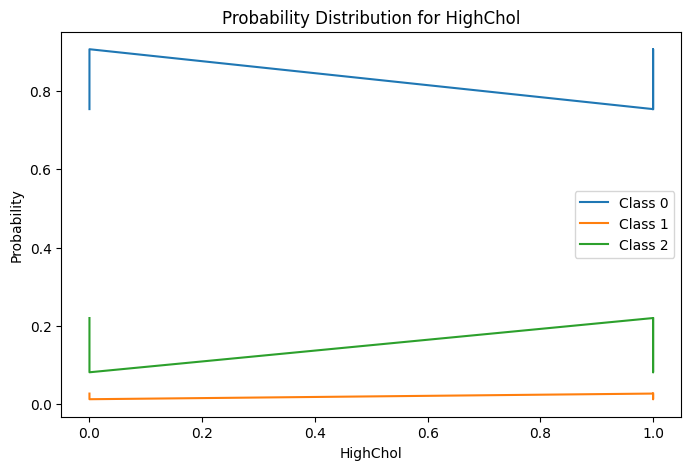


Training model with feature: CholCheck
Training Accuracy for CholCheck: 0.8421
Testing Accuracy for CholCheck: 0.8435


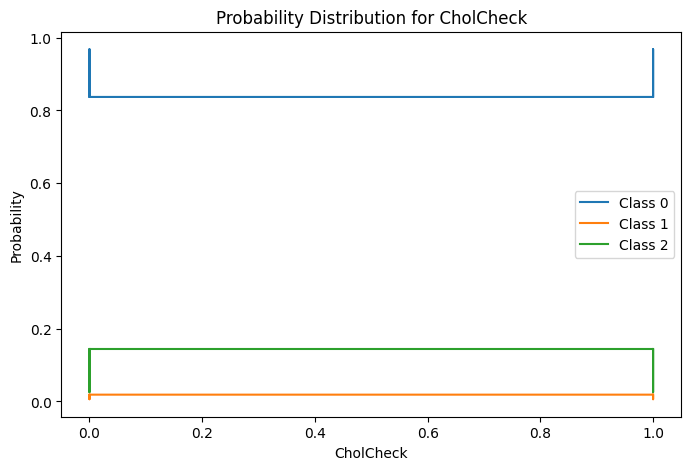


Training model with feature: BMI
Training Accuracy for BMI: 0.8397
Testing Accuracy for BMI: 0.8405


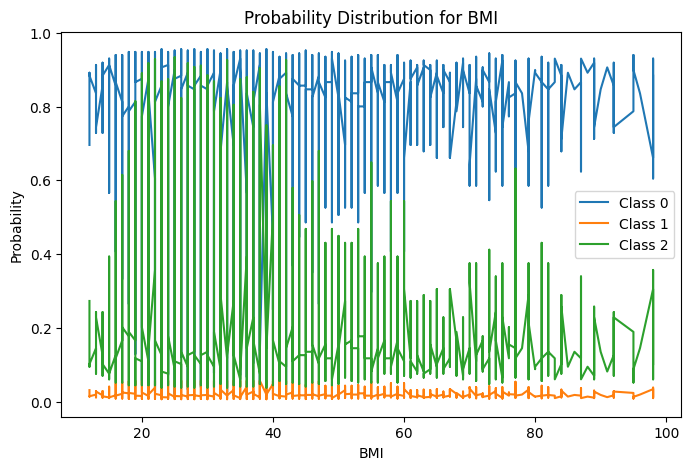


Training model with feature: Smoker
Training Accuracy for Smoker: 0.8421
Testing Accuracy for Smoker: 0.8435


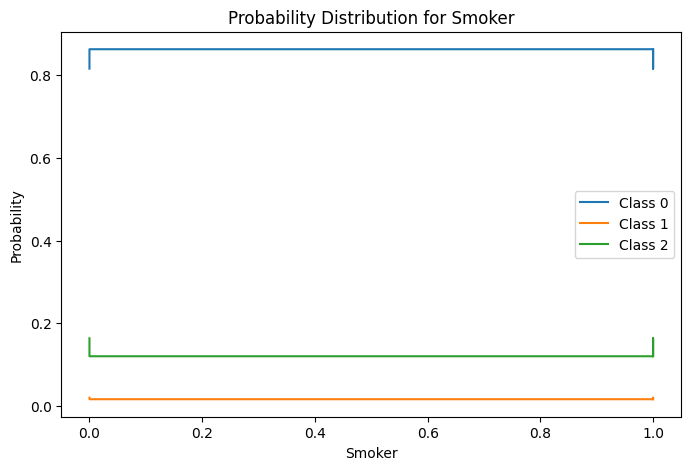


Training model with feature: Stroke
Training Accuracy for Stroke: 0.8421
Testing Accuracy for Stroke: 0.8435


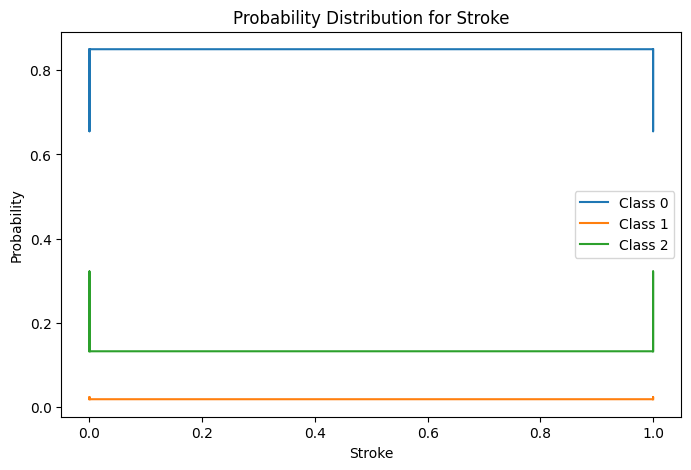


Training model with feature: HeartDiseaseorAttack
Training Accuracy for HeartDiseaseorAttack: 0.8421
Testing Accuracy for HeartDiseaseorAttack: 0.8435


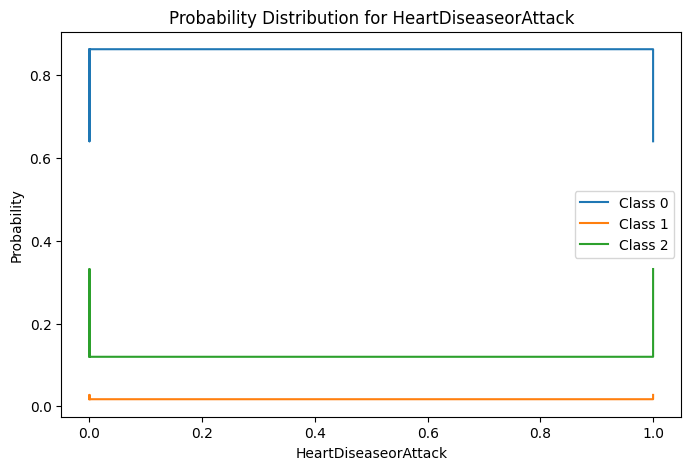


Training model with feature: PhysActivity
Training Accuracy for PhysActivity: 0.8421
Testing Accuracy for PhysActivity: 0.8435


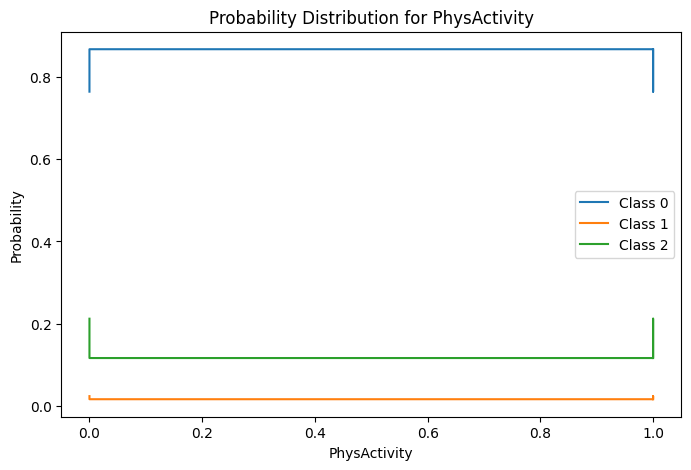


Training model with feature: Fruits
Training Accuracy for Fruits: 0.8421
Testing Accuracy for Fruits: 0.8435


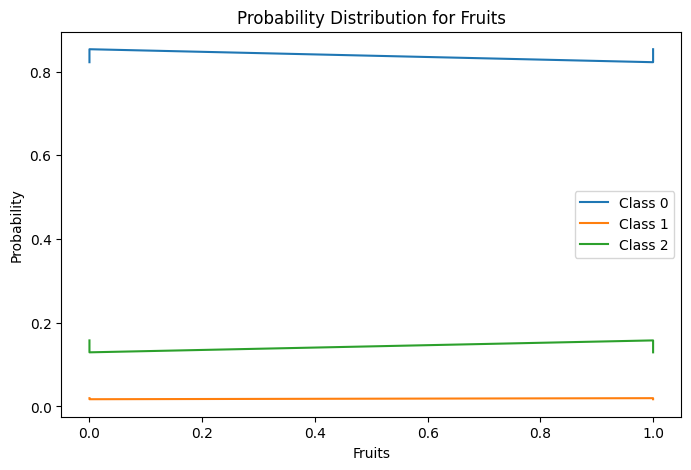


Training model with feature: Veggies
Training Accuracy for Veggies: 0.8421
Testing Accuracy for Veggies: 0.8435


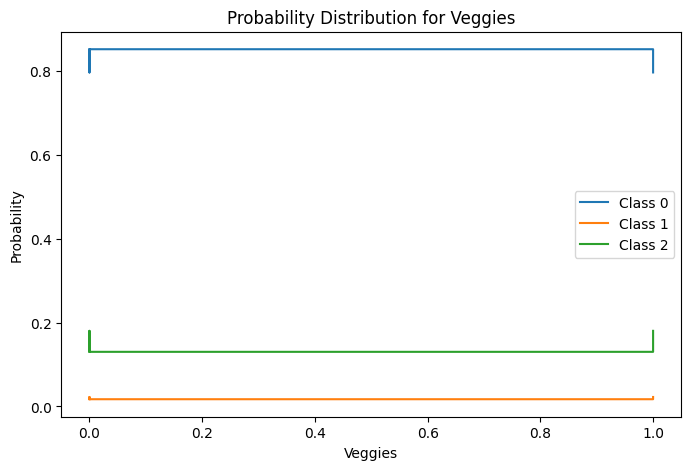


Training model with feature: HvyAlcoholConsump
Training Accuracy for HvyAlcoholConsump: 0.8421
Testing Accuracy for HvyAlcoholConsump: 0.8435


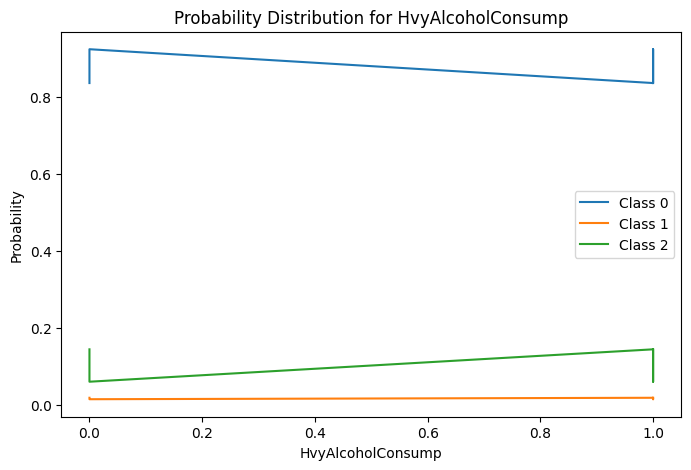


Training model with feature: AnyHealthcare
Training Accuracy for AnyHealthcare: 0.8421
Testing Accuracy for AnyHealthcare: 0.8435


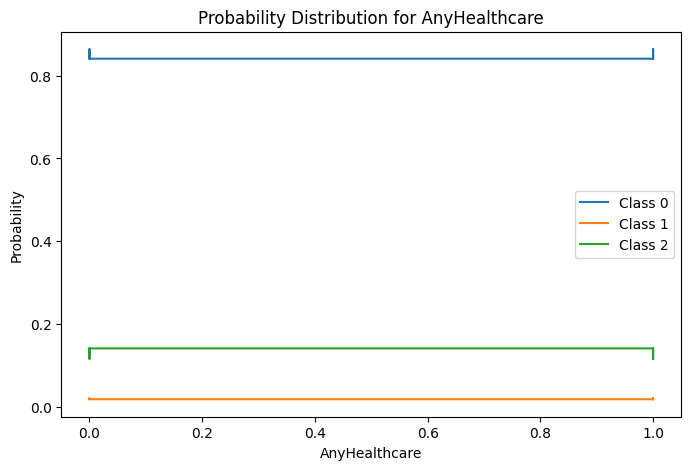


Training model with feature: NoDocbcCost
Training Accuracy for NoDocbcCost: 0.8421
Testing Accuracy for NoDocbcCost: 0.8435


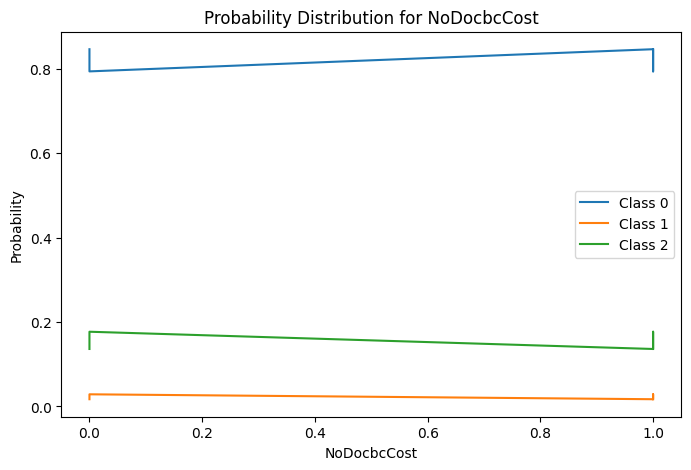


Training model with feature: GenHlth
Training Accuracy for GenHlth: 0.8421
Testing Accuracy for GenHlth: 0.8435


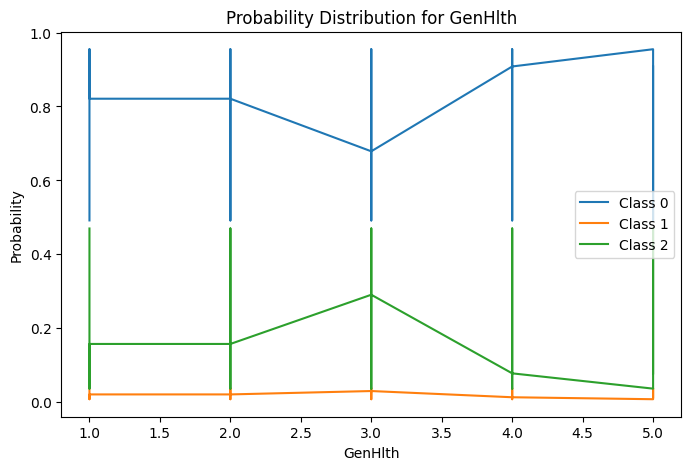


Training model with feature: MentHlth
Training Accuracy for MentHlth: 0.8421
Testing Accuracy for MentHlth: 0.8435


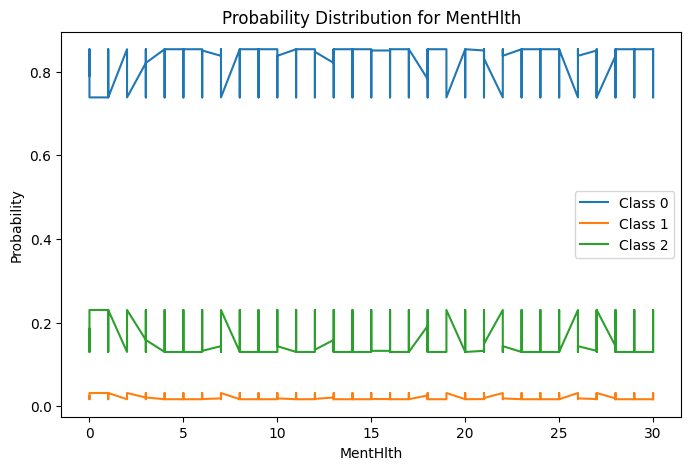


Training model with feature: PhysHlth
Training Accuracy for PhysHlth: 0.8421
Testing Accuracy for PhysHlth: 0.8435


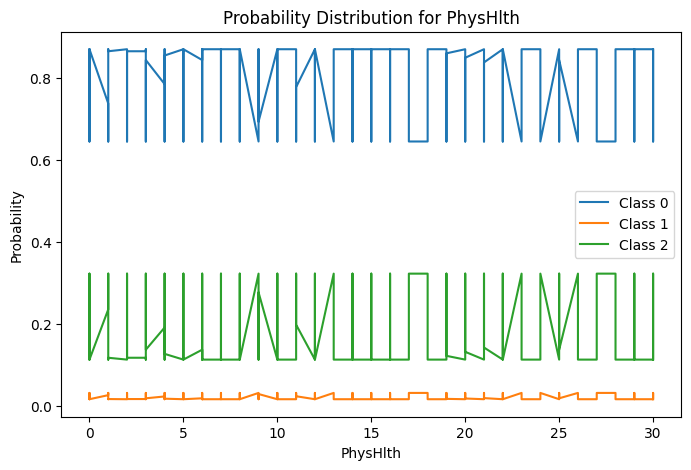


Training model with feature: DiffWalk
Training Accuracy for DiffWalk: 0.8421
Testing Accuracy for DiffWalk: 0.8435


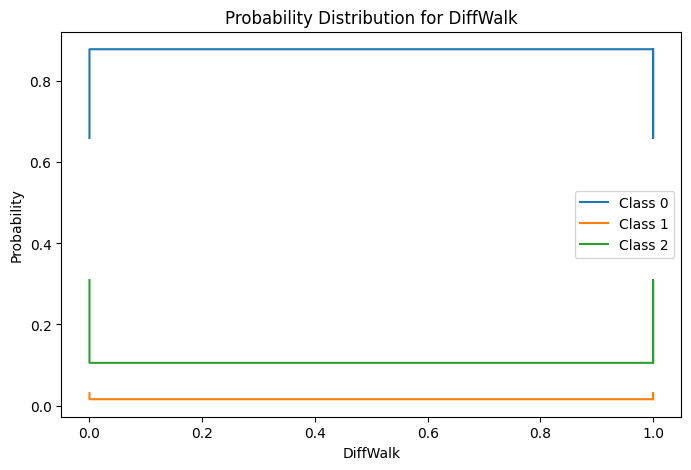


Training model with feature: Sex
Training Accuracy for Sex: 0.8421
Testing Accuracy for Sex: 0.8435


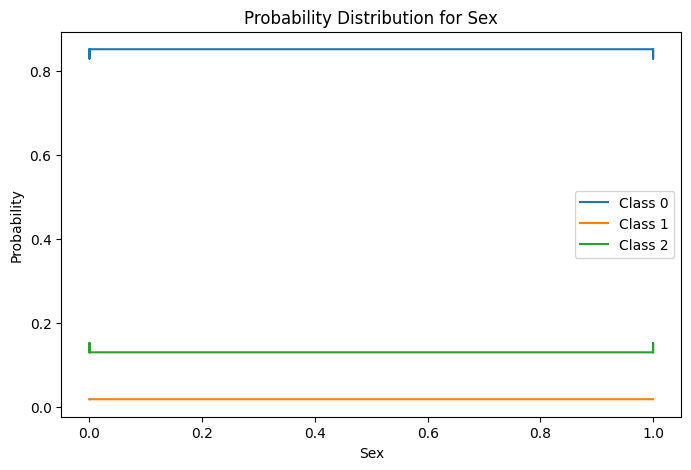


Training model with feature: Age
Training Accuracy for Age: 0.8421
Testing Accuracy for Age: 0.8435


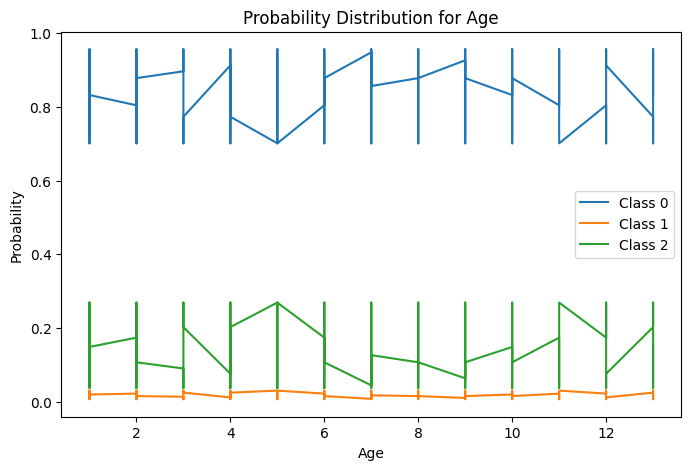


Training model with feature: Education
Training Accuracy for Education: 0.8421
Testing Accuracy for Education: 0.8435


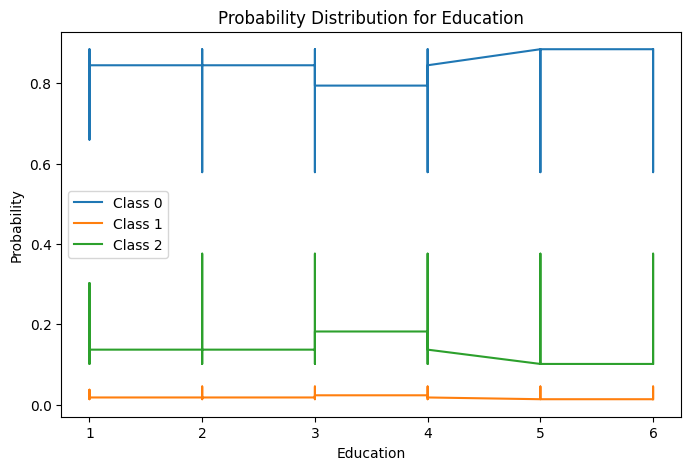


Training model with feature: Income
Training Accuracy for Income: 0.8421
Testing Accuracy for Income: 0.8435


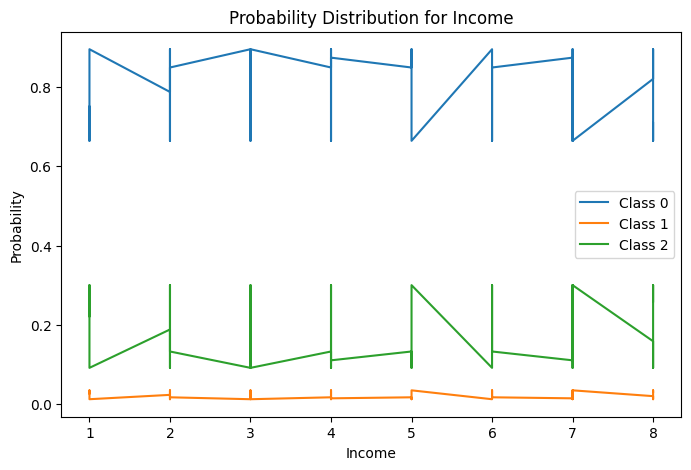


Training and evaluating model with all features
Overall Testing Accuracy: 0.8481945758435825


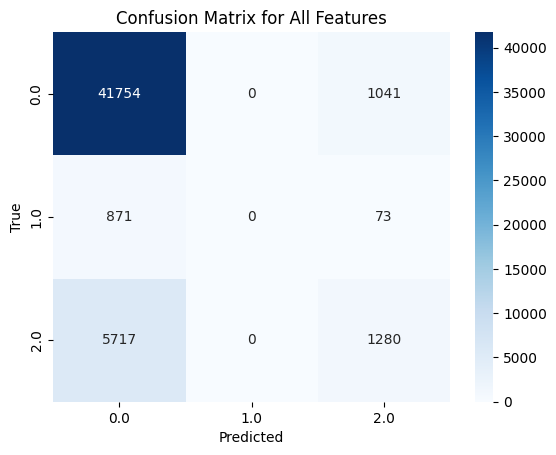

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

for feature in X.columns:
    print(f"\nTraining model with feature: {feature}")
    X_feature = X[[feature]]
    X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    model_feat = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model_feat.fit(X_train_feat, y_train_feat)

    y_pred_train_feat = model_feat.predict(X_train_feat)
    y_pred_test_feat = model_feat.predict(X_test_feat)

    print(f"Training Accuracy for {feature}: {accuracy_score(y_train_feat, y_pred_train_feat):.4f}")
    print(f"Testing Accuracy for {feature}: {accuracy_score(y_test_feat, y_pred_test_feat):.4f}")


    plt.figure(figsize=(8, 5))
    X_sorted = np.sort(X_feature[feature])
    probs = model_feat.predict_proba(np.sort(X_feature[feature].values.reshape(-1, 1)))
    for i in range(probs.shape[1]):
        plt.plot(X_sorted, probs[:, i], label=f'Class {i}')
    plt.title(f'Probability Distribution for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

print("\nTraining and evaluating model with all features")
model_all = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_all.fit(X_train, y_train)
y_pred_test_all = model_all.predict(X_test)
print("Overall Testing Accuracy:", accuracy_score(y_test, y_pred_test_all))

# Plot confusion matrix for all features together
cm = confusion_matrix(y_test, y_pred_test_all)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model_all.classes_, yticklabels=model_all.classes_)
plt.title("Confusion Matrix for All Features")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

here the model is imbalnced what ever she pridect 0  is right 80 % , that is logic

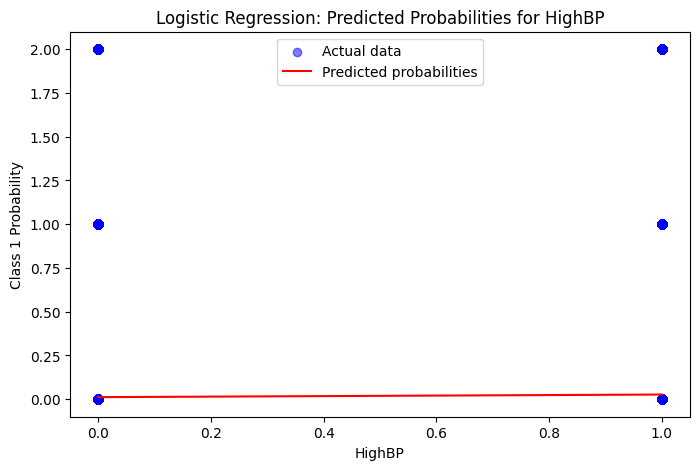

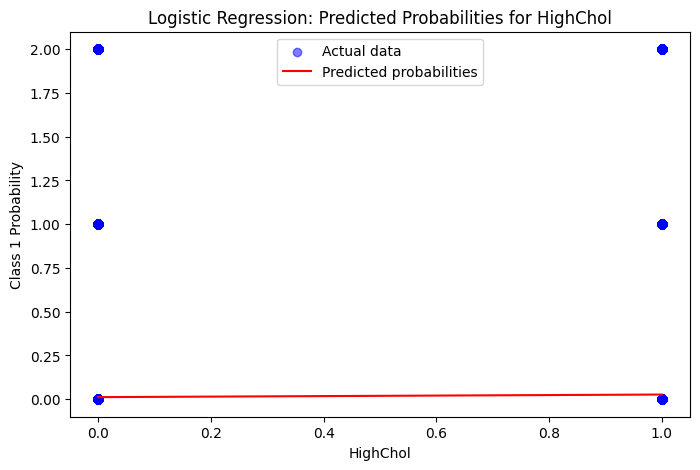

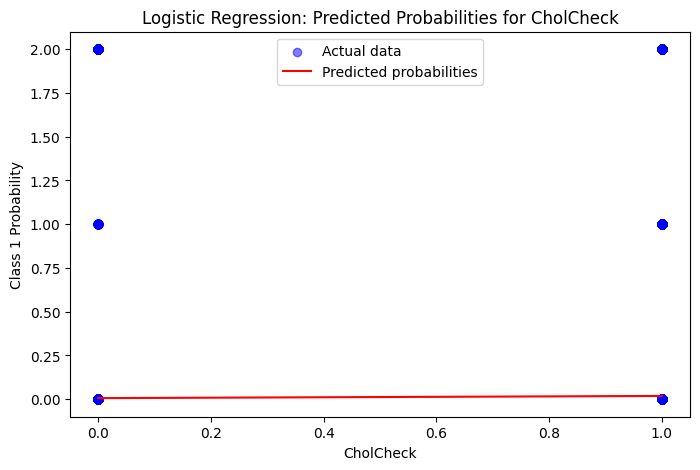

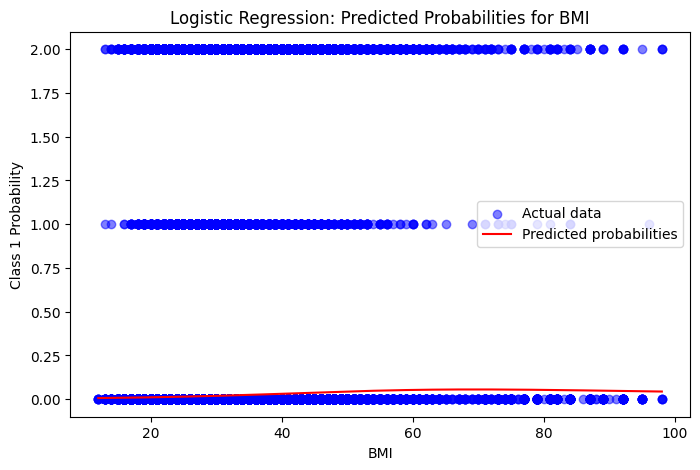

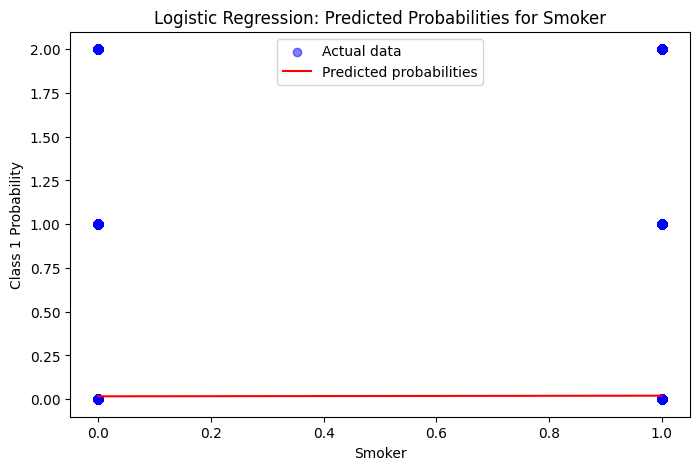

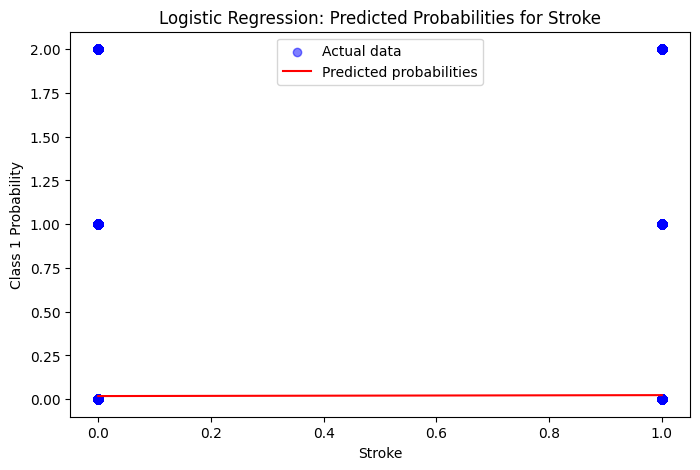

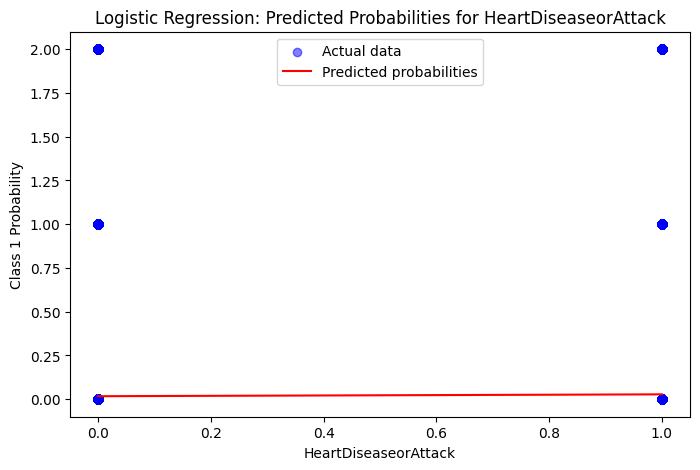

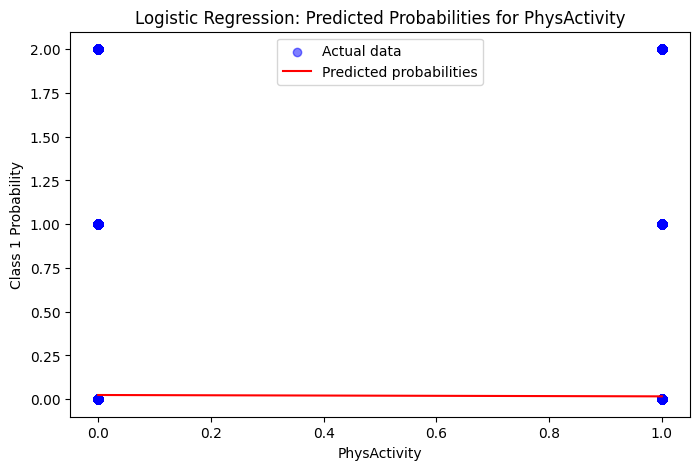

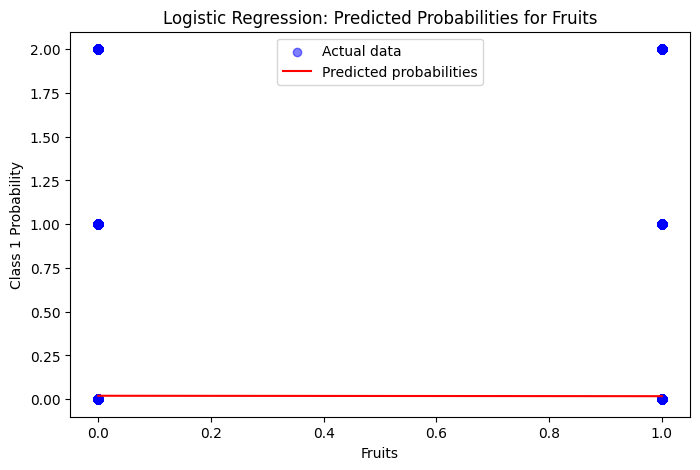

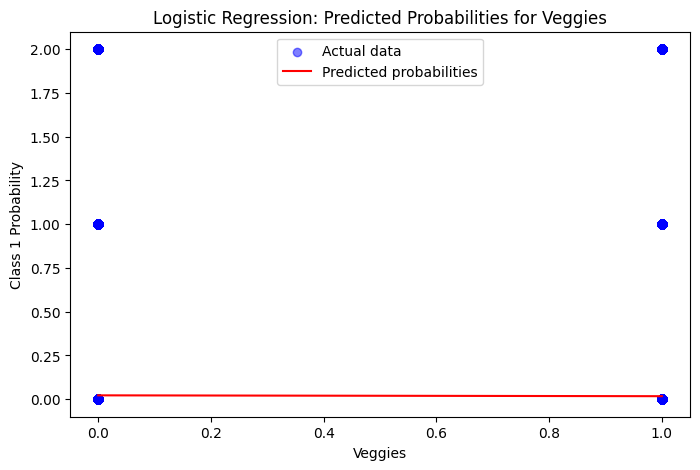

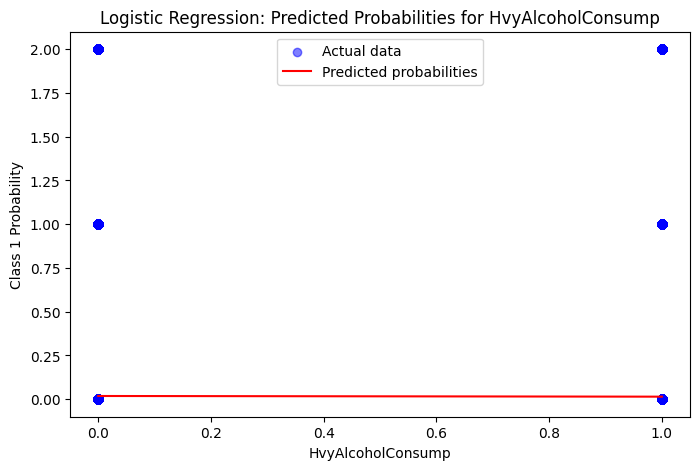

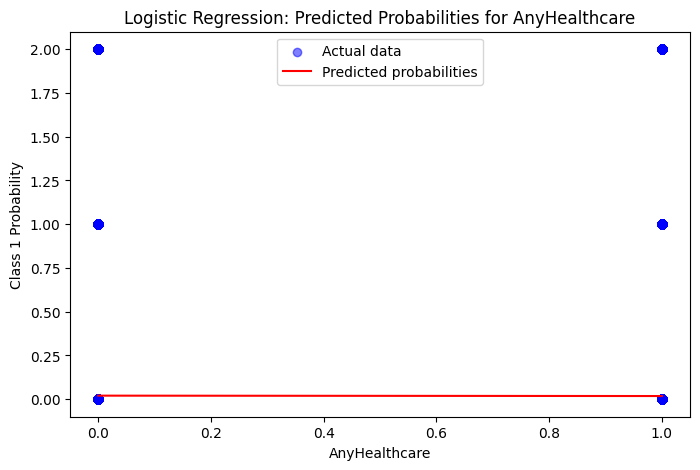

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

subset_X = X.sample(n=1000, random_state=42)

for feature in subset_X.columns:
    X_feature = subset_X[[feature]]

    model = LogisticRegression(max_iter=1000)
    model.fit(X_feature, y)

    proba = model.predict_proba(X_feature)[:, 1]

    plt.figure(figsize=(8, 5))
    plt.scatter(X_feature, y, color='blue', alpha=0.5, label='Actual data')

    sorted_idx = np.argsort(X_feature[feature])
    sorted_feature = X_feature[feature].iloc[sorted_idx]
    sorted_proba = proba[sorted_idx]

    plt.plot(sorted_feature, sorted_proba, color='red', label='Predicted probabilities')

    plt.xlabel(feature)
    plt.ylabel('Class 1 Probability')
    plt.title(f'Logistic Regression: Predicted Probabilities for {feature}')
    plt.legend()
    plt.grid(True)
    plt.show()



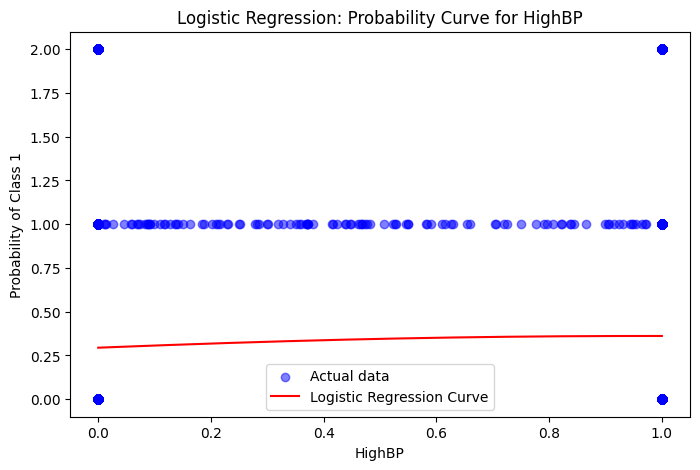

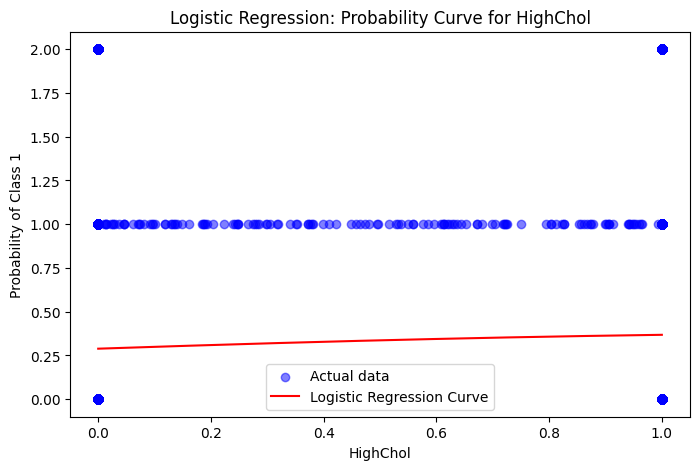

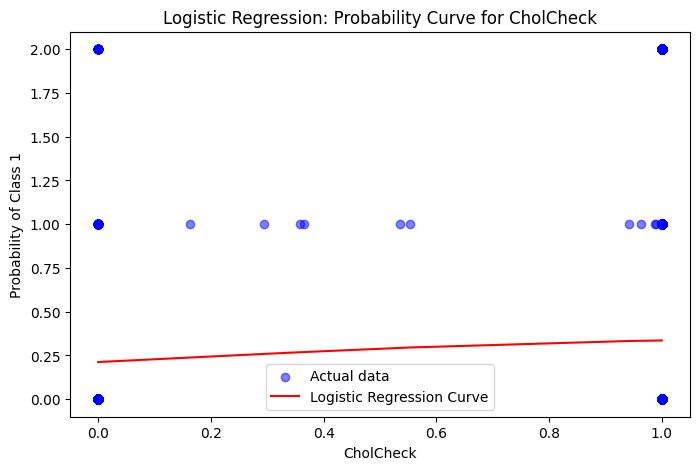

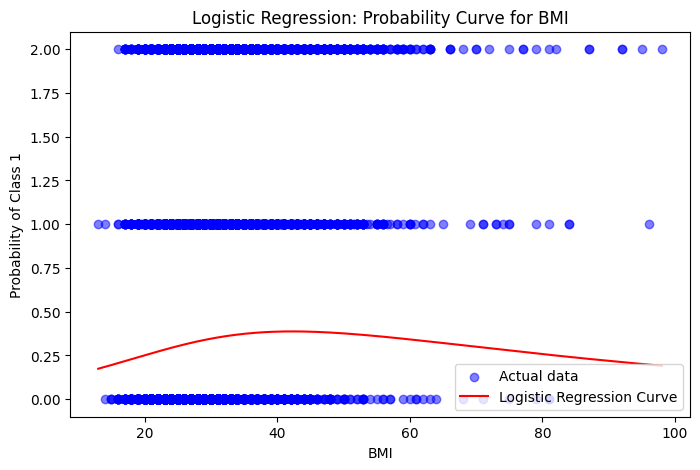

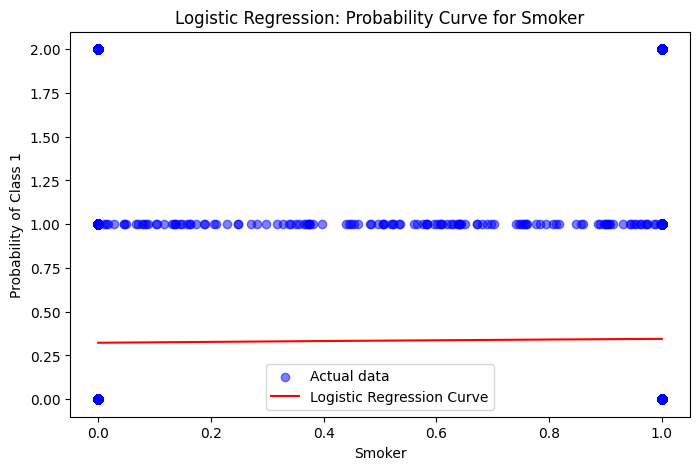

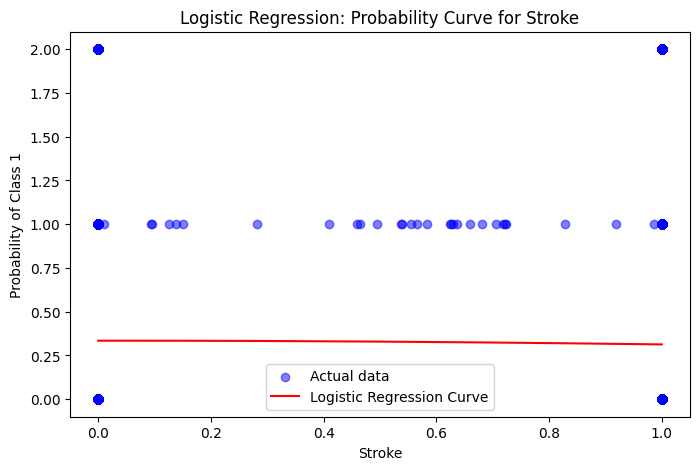

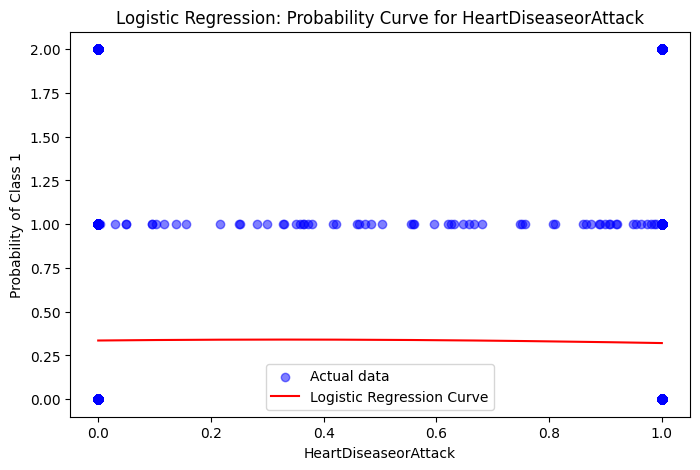

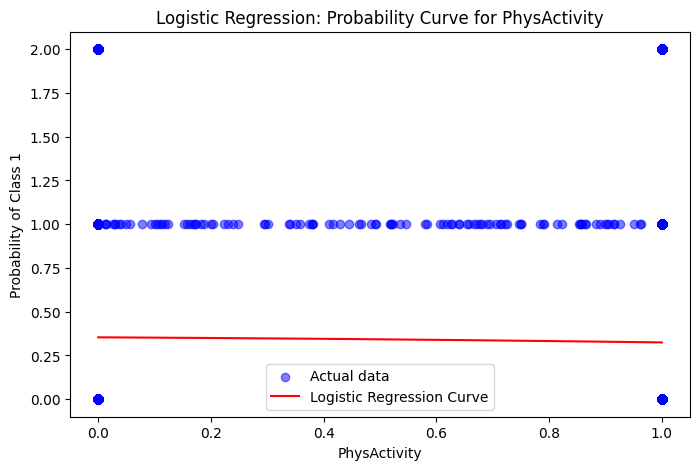

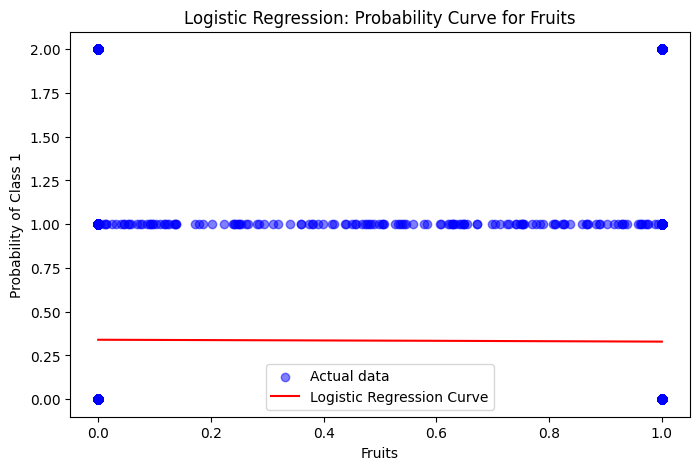

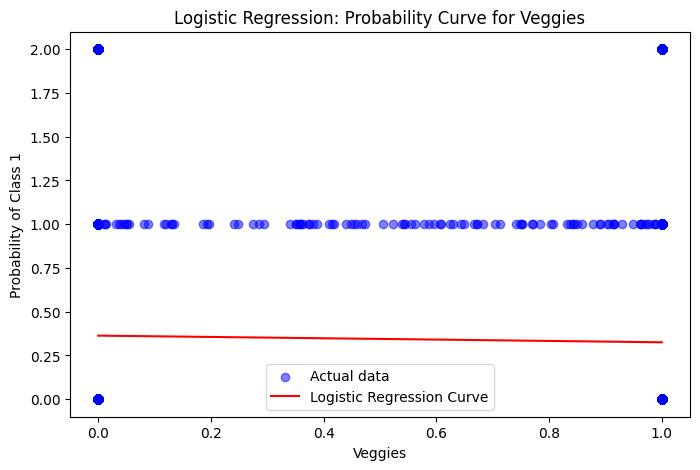

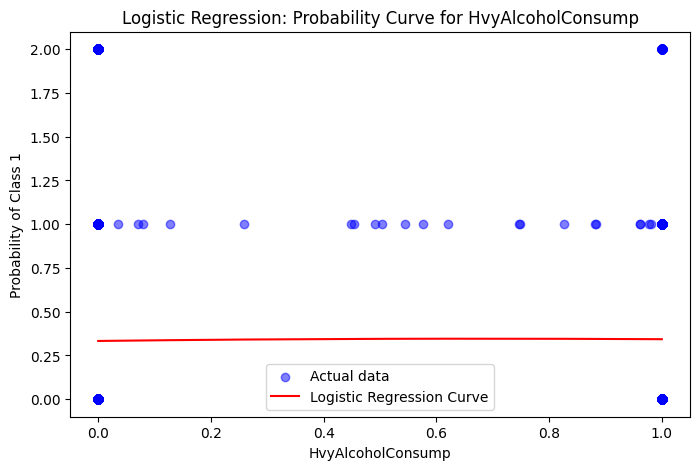

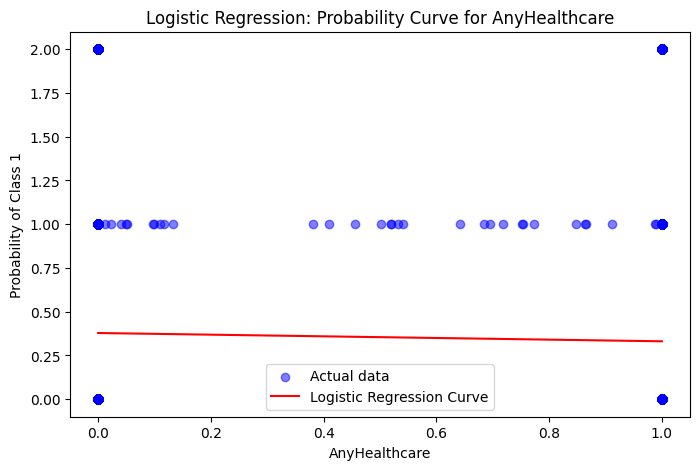

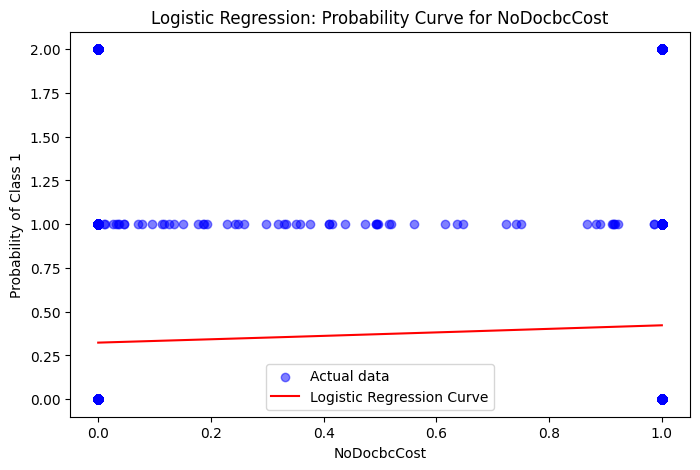

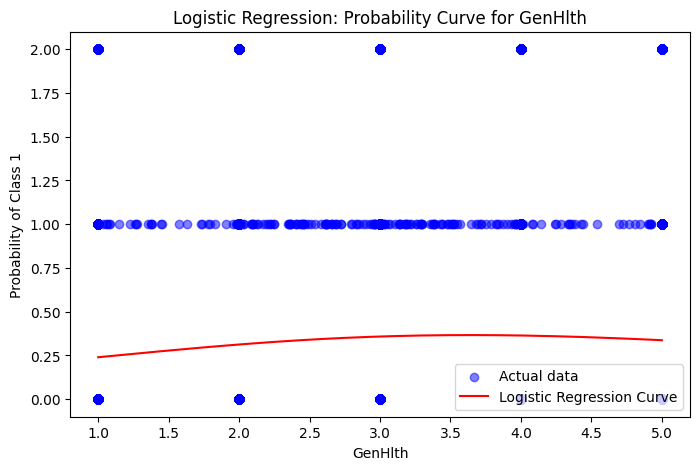

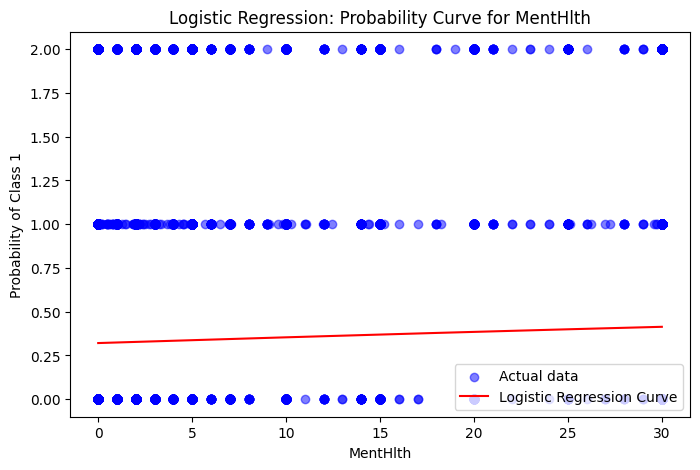

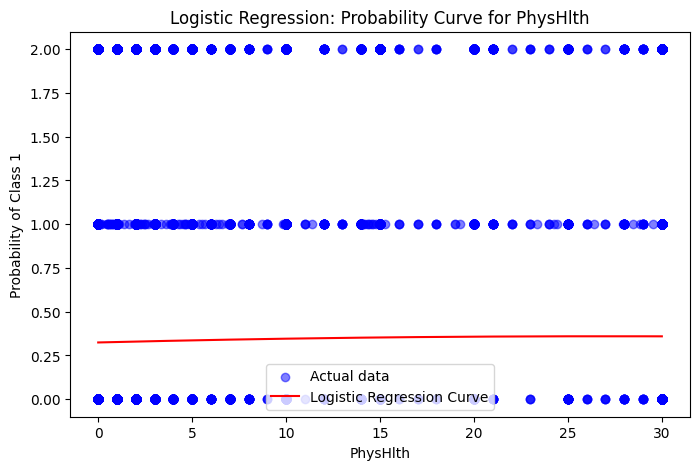

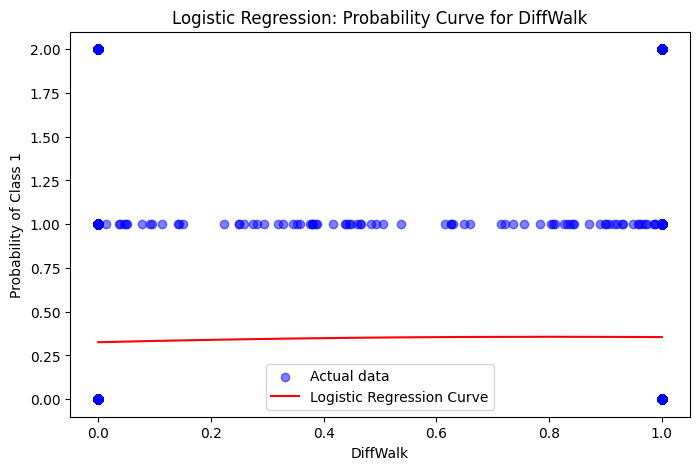

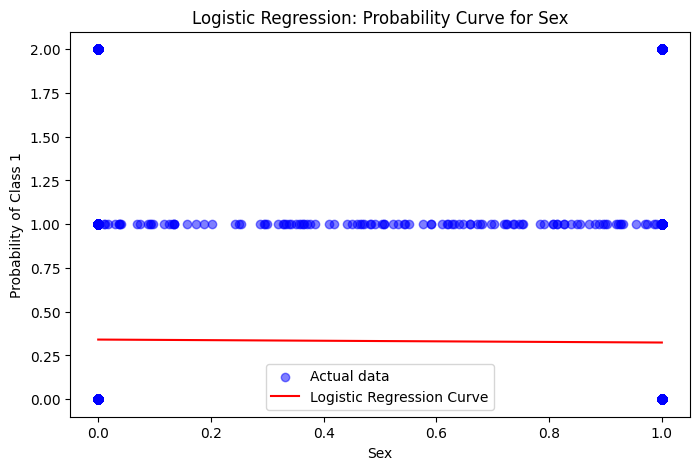

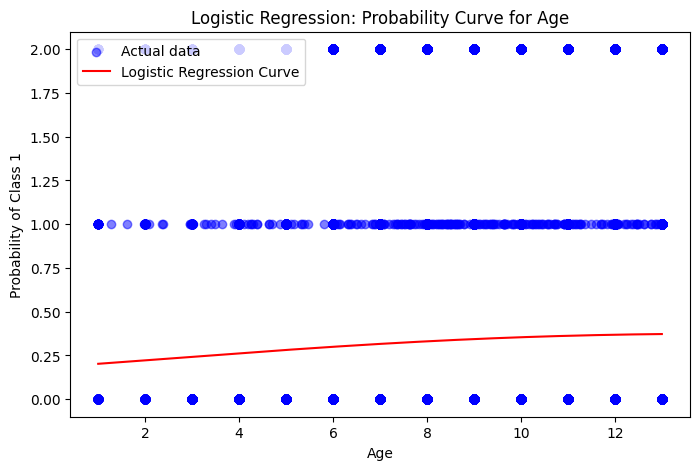

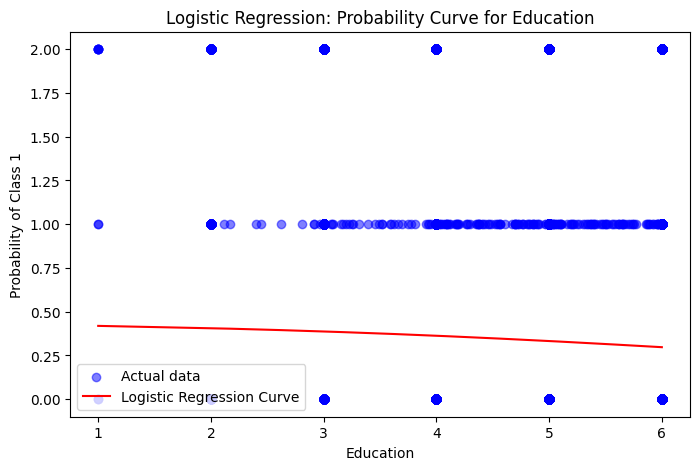

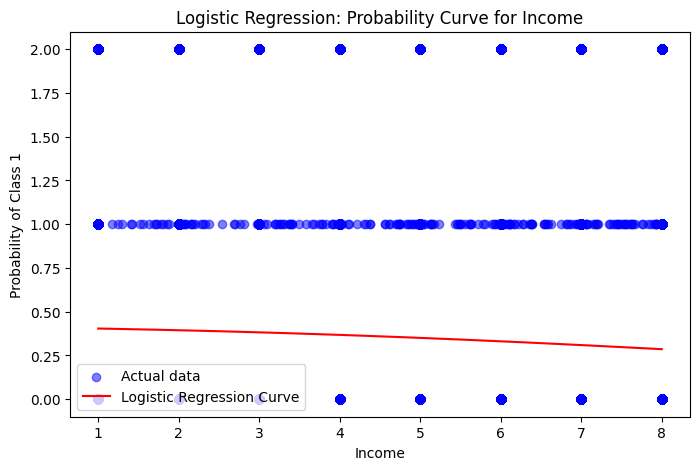

In [ ]:

X=balanced_df_smote.drop('Diabetes_012', axis=1)
y=balanced_df_smote['Diabetes_012']
for feature in X.columns:

    X_feature = X[[feature]]

    model = LogisticRegression()
    model.fit(X_feature, y)
    plt.figure(figsize=(8, 5))


    plt.scatter(X_feature, y, color='blue', alpha=0.5, label='Actual data')

    sorted_idx = np.argsort(X_feature[feature])
    sorted_feature = X_feature[feature].iloc[sorted_idx]
    sorted_probabilities = model.predict_proba(X_feature)[:, 1][sorted_idx]

    plt.plot(sorted_feature, sorted_probabilities, color='red', label='Logistic Regression Curve')

    plt.xlabel(feature)
    plt.ylabel('Probability of Class 1')
    plt.title(f'Logistic Regression: Probability Curve for {feature}')
    plt.legend()
    plt.show()


In [ ]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{name} -  Accuracy: {cv_results} ( {cv_results})")

Logistic Regression -  Accuracy: [0.84496216 0.84366131 0.84303059 0.84391753 0.84273494] ( [0.84496216 0.84366131 0.84303059 0.84391753 0.84273494])
Decision Tree -  Accuracy: [0.76734469 0.7701632  0.76785714 0.76592558 0.7673644 ] ( [0.76734469 0.7701632  0.76785714 0.76592558 0.7673644 ])
K-Nearest Neighbors -  Accuracy: [0.83094844 0.83108641 0.83010091 0.83059366 0.82958846] ( [0.83094844 0.83108641 0.83010091 0.83059366 0.82958846])
Random Forest -  Accuracy: [0.84259697 0.84192684 0.84137496 0.84046831 0.84228161] ( [0.84259697 0.84192684 0.84137496 0.84046831 0.84228161])


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X=df.drop('Diabetes_012', axis=1)
y=df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf_smote = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf_smote.fit(X_train, y_train)

y_pred_smote = model_rf_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Random Forest Accuracy with SMOTE: {accuracy_smote:.4f}")


In [ ]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{name} -  Accuracy: {cv_results} ( {cv_results})")

Logistic Regression -  Accuracy: [0.84496216 0.84366131 0.84303059 0.84391753 0.84273494] ( [0.84496216 0.84366131 0.84303059 0.84391753 0.84273494])
Decision Tree -  Accuracy: [0.76734469 0.7701632  0.76785714 0.76592558 0.7673644 ] ( [0.76734469 0.7701632  0.76785714 0.76592558 0.7673644 ])
K-Nearest Neighbors -  Accuracy: [0.83094844 0.83108641 0.83010091 0.83059366 0.82958846] ( [0.83094844 0.83108641 0.83010091 0.83059366 0.82958846])
Random Forest -  Accuracy: [0.84259697 0.84192684 0.84137496 0.84046831 0.84228161] ( [0.84259697 0.84192684 0.84137496 0.84046831 0.84228161])


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

balanced_df_smote = balanced_df_smote[balanced_df_smote['Diabetes_012'] != 1]
balanced_df_smote['Diabetes_012'] = balanced_df_smote['Diabetes_012'].replace({2: 1})

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

continuous_columns = [col for col in balanced_df_smote.columns if col != 'Diabetes_012']
df_no_outliers = remove_outliers(balanced_df_smote, continuous_columns)

X = balanced_df_smote.drop('Diabetes_012', axis=1)
y = balanced_df_smote['Diabetes_012']

X_no_outliers = df_no_outliers.drop('Diabetes_012', axis=1)
y_no_outliers = df_no_outliers['Diabetes_012']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15, 20],
        'min_samples_split': [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

def evaluate_models(X, y, dataset_label):
    print(f"\nEvaluating Models for {dataset_label}...")
    for name, model in models.items():
        print(f"\nRunning GridSearchCV for {name}...")

        grid_search = GridSearchCV(
            model, param_grids[name], cv=kf, scoring='accuracy', n_jobs=-1, verbose=1
        )
        grid_search.fit(X, y)

        print(f"\n{name} - Best Hyperparameters: {grid_search.best_params_}")
        print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

        best_model = grid_search.best_estimator_
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

        print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred):.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

evaluate_models(X, y, "Dataset with Outliers")
evaluate_models(X_no_outliers, y_no_outliers, "Dataset without Outliers")



Evaluating Models for Dataset with Outliers...

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Logistic Regression - Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7477
Accuracy on Test Set: 0.7400
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      1012
         1.0       0.73      0.76      0.74       988

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000


Running GridSearchCV for Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Decision Tree - Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7272
Accuracy on Test Set: 0.7190
Classification Report:
              precision    recall  f1-score   support

         0.0      

Feature: HighBP, Accuracy: 0.68


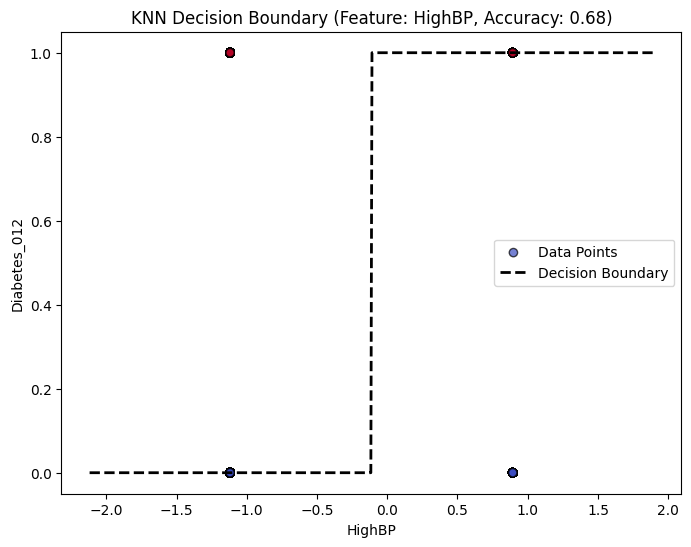

Feature: HighChol, Accuracy: 0.49


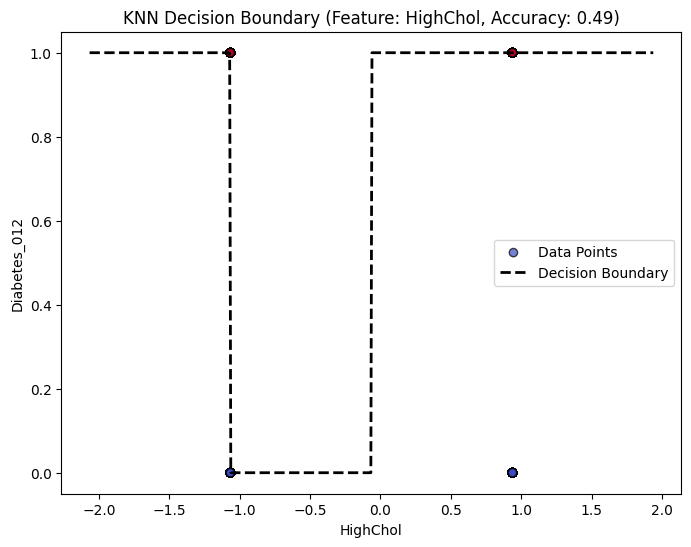

Feature: CholCheck, Accuracy: 0.52


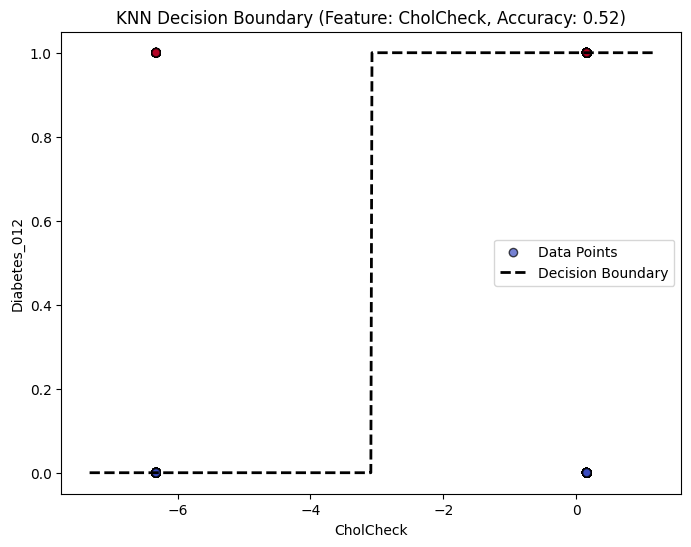

Feature: BMI, Accuracy: 0.58


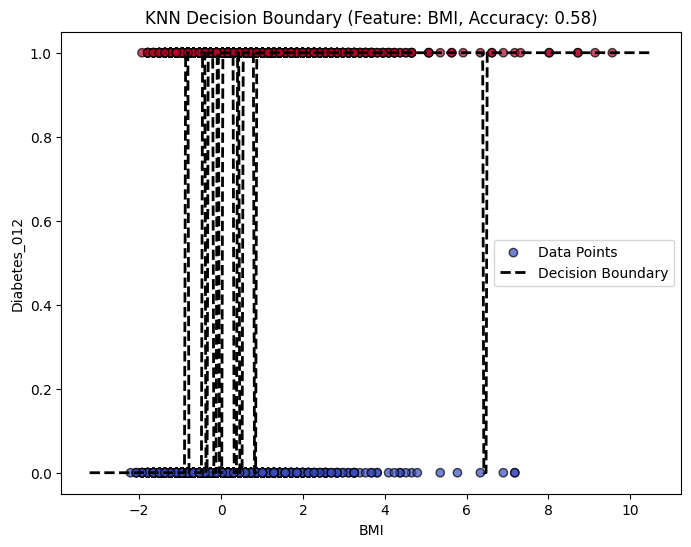

Feature: Smoker, Accuracy: 0.53


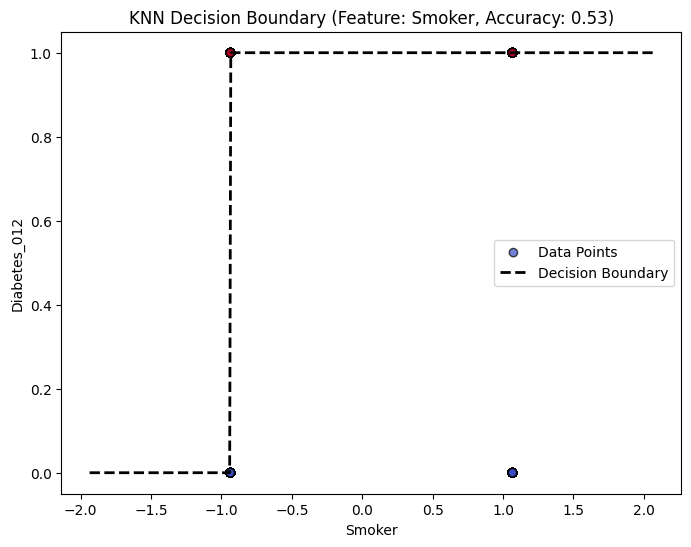

Feature: Stroke, Accuracy: 0.49


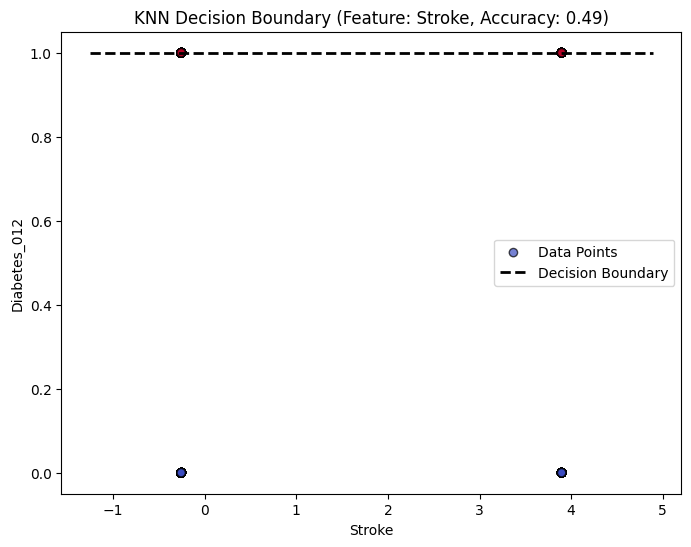

Feature: HeartDiseaseorAttack, Accuracy: 0.58


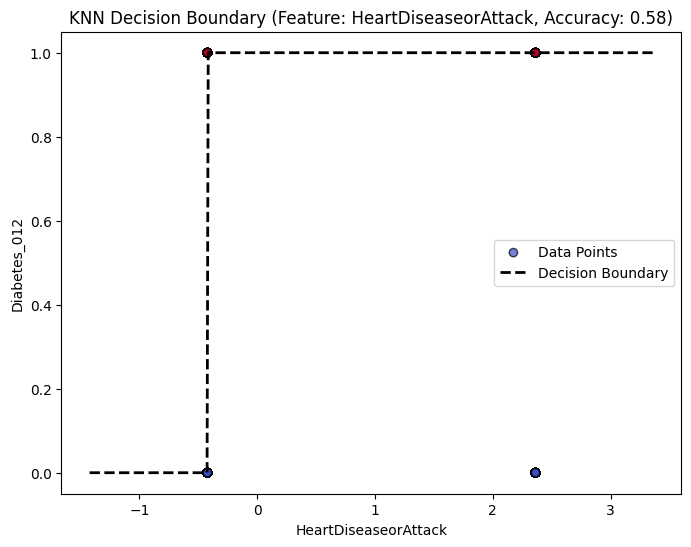

Feature: PhysActivity, Accuracy: 0.57


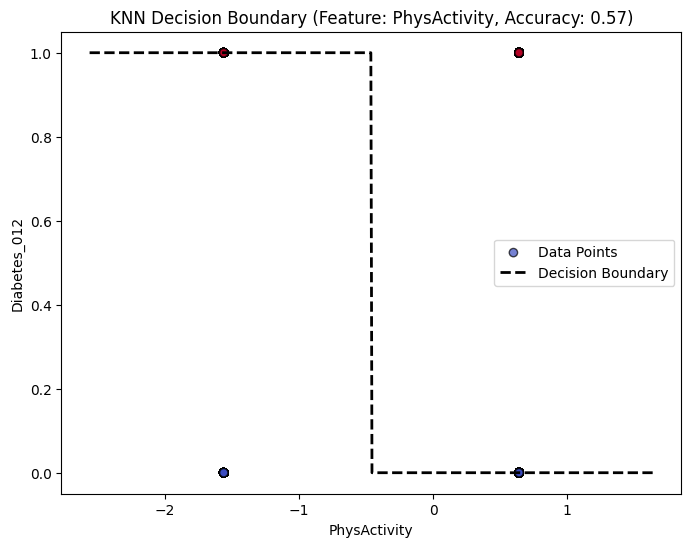

Feature: Fruits, Accuracy: 0.49


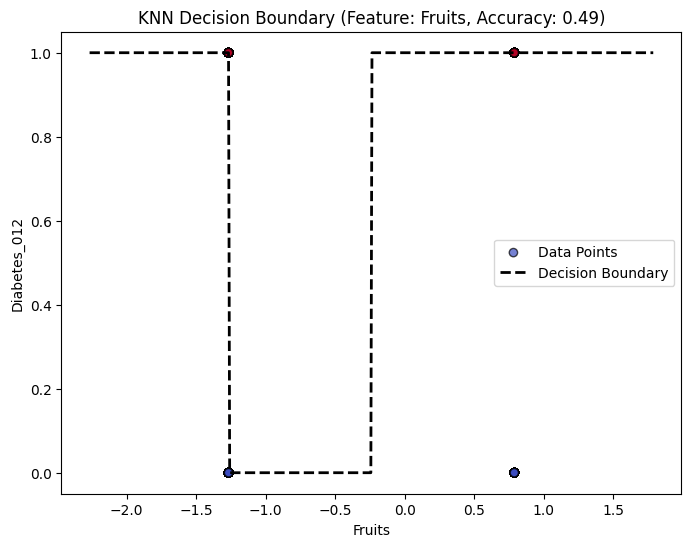

Feature: Veggies, Accuracy: 0.47


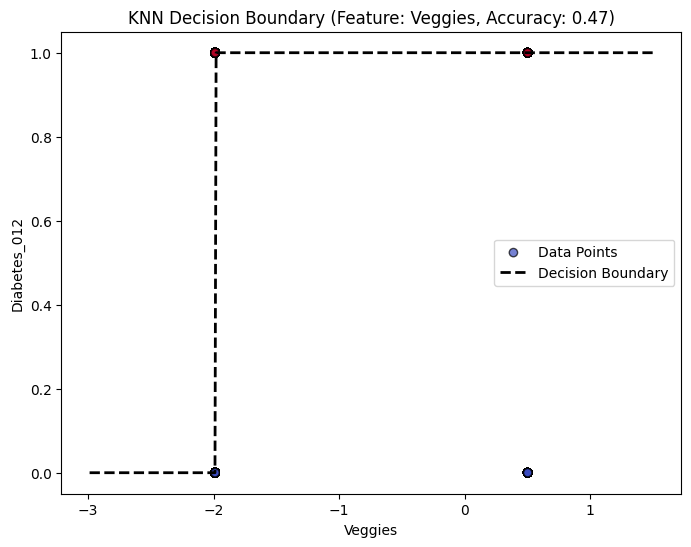

Feature: HvyAlcoholConsump, Accuracy: 0.52


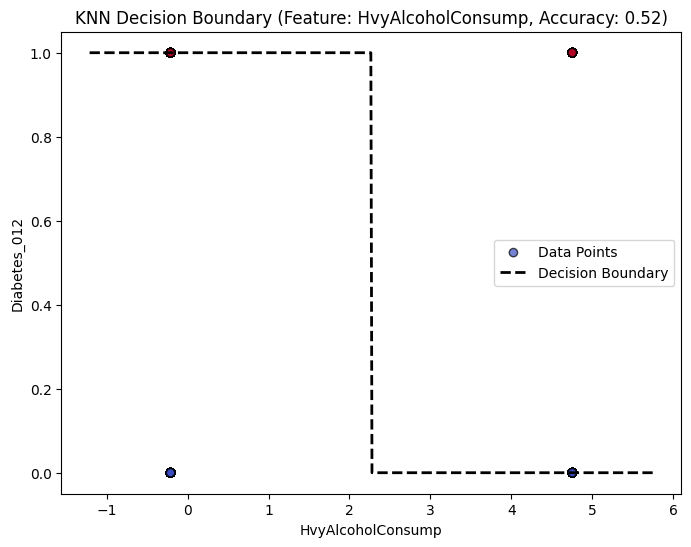

Feature: AnyHealthcare, Accuracy: 0.50


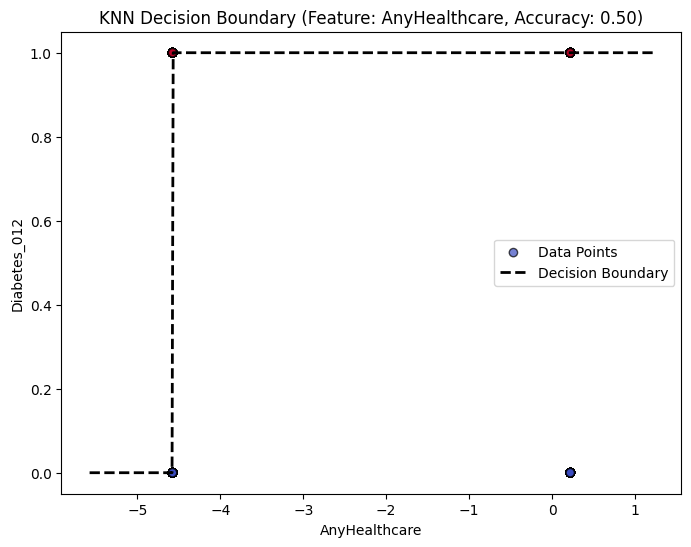

Feature: NoDocbcCost, Accuracy: 0.49


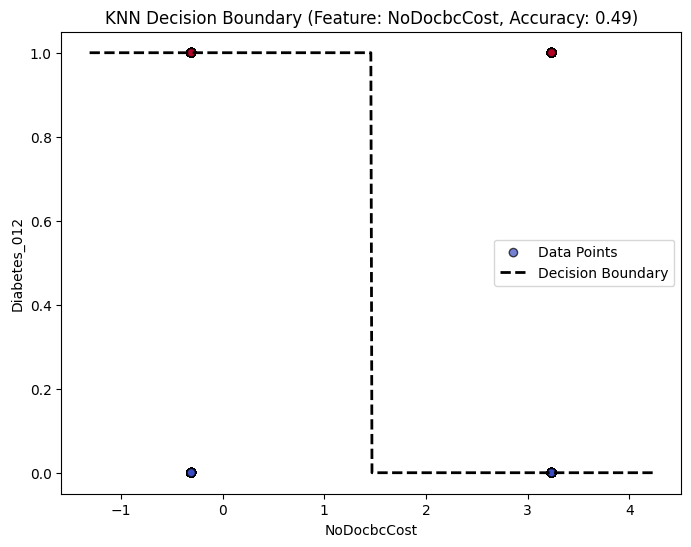

Feature: GenHlth, Accuracy: 0.68


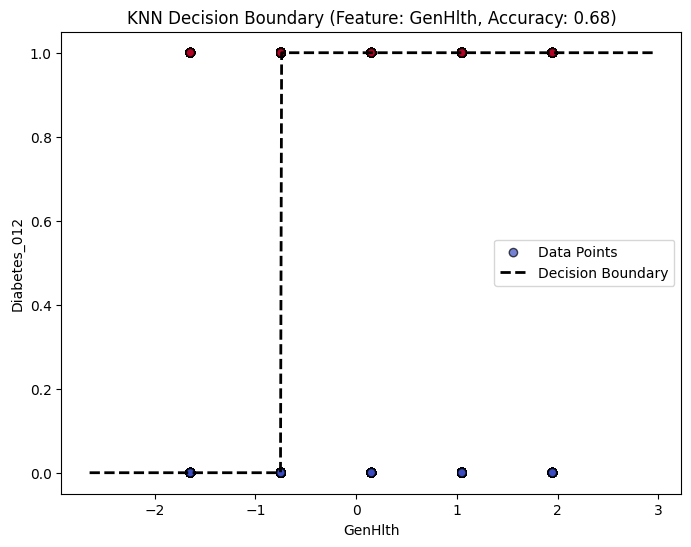

Feature: MentHlth, Accuracy: 0.52


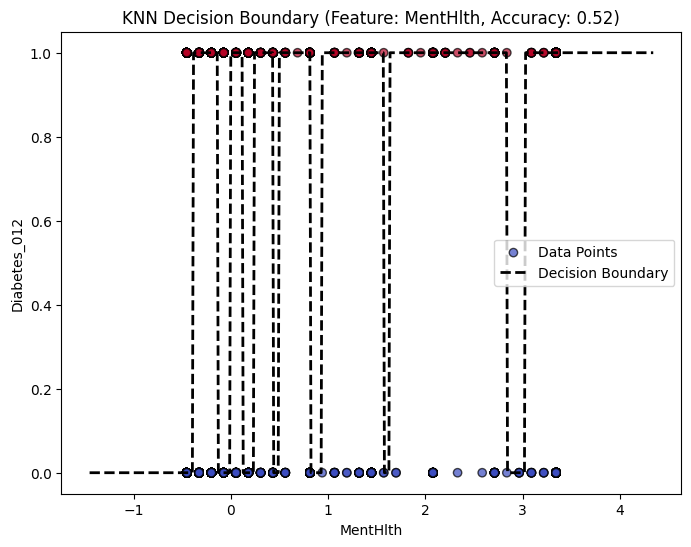

Feature: PhysHlth, Accuracy: 0.57


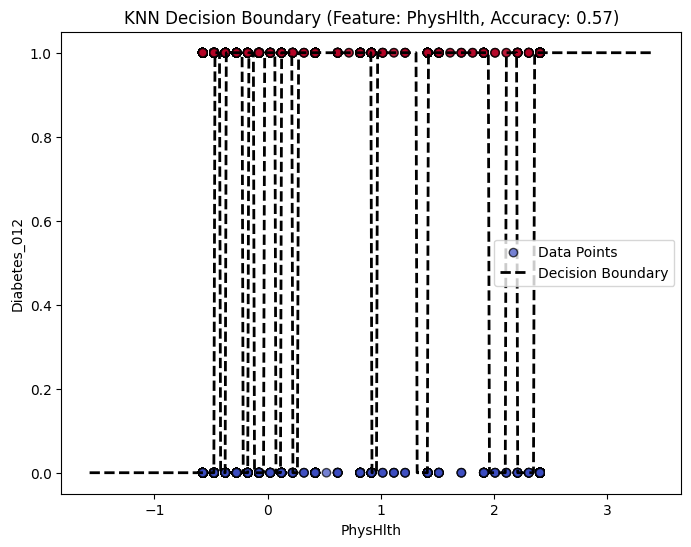

Feature: DiffWalk, Accuracy: 0.62


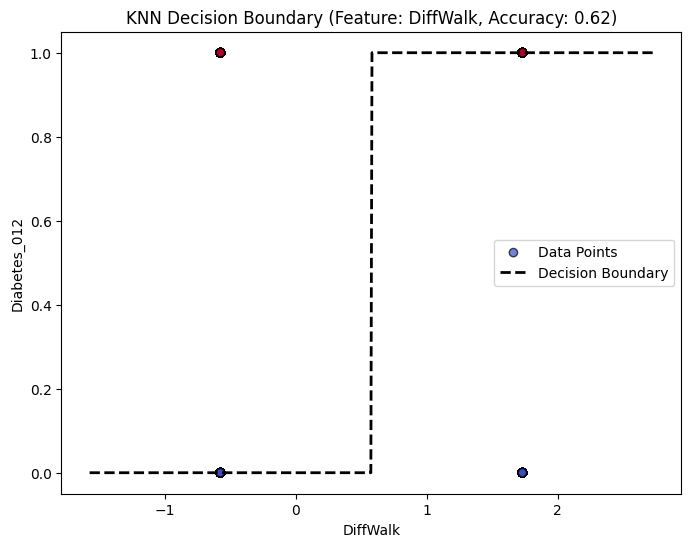

Feature: Sex, Accuracy: 0.49


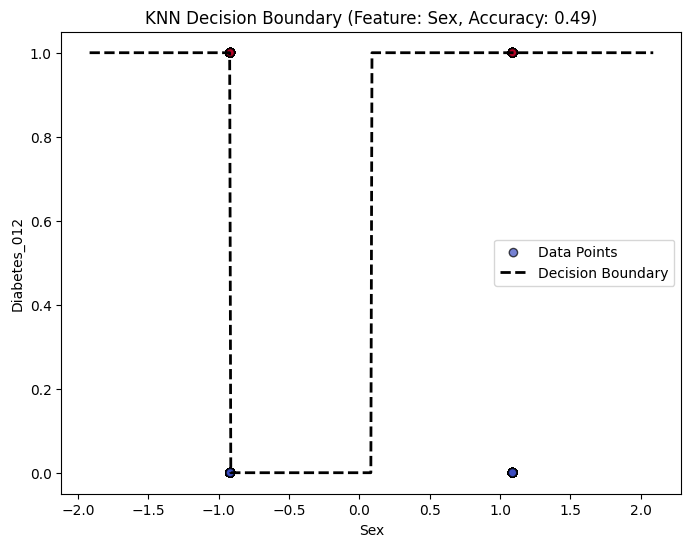

Feature: Age, Accuracy: 0.61


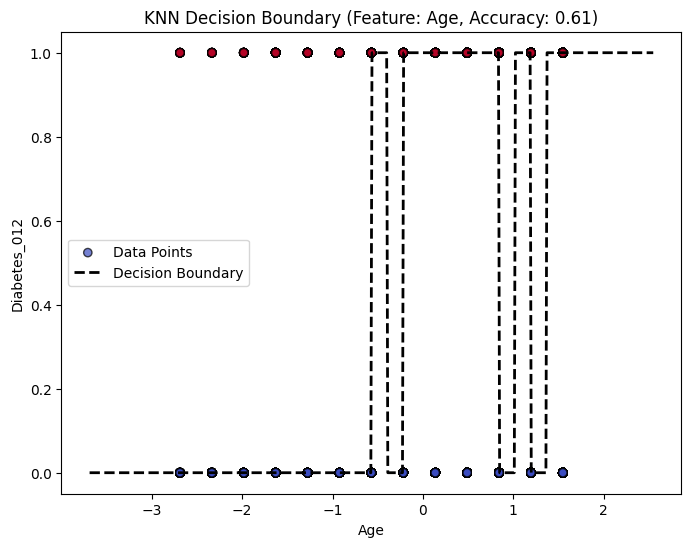

Feature: Education, Accuracy: 0.56


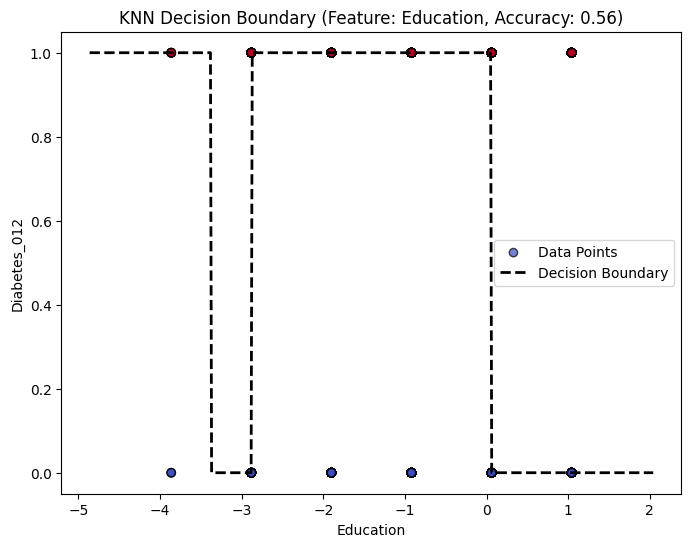

Feature: Income, Accuracy: 0.53


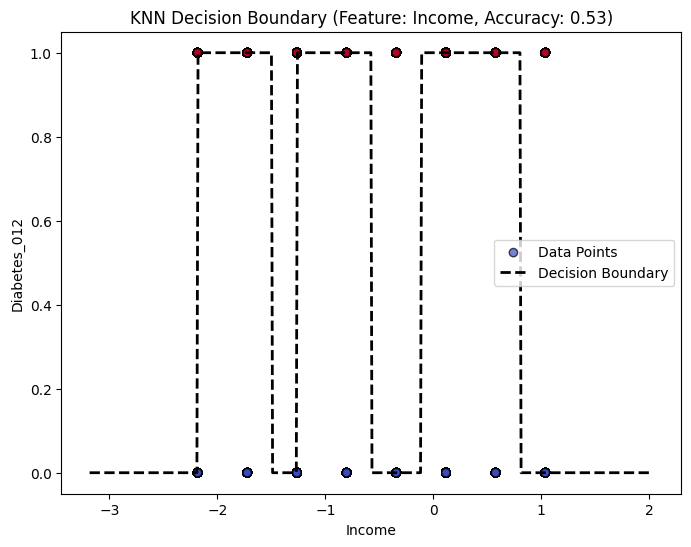

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


balanced_df_smote = balanced_df_smote[balanced_df_smote['Diabetes_012'].isin([0, 2])]

balanced_df_smote['Diabetes_012'] = balanced_df_smote['Diabetes_012'].replace({2: 1})

target_column = 'Diabetes_012'

for column in balanced_df_smote.columns:
    if column != target_column:
        X = balanced_df_smote[[column]]
        y = balanced_df_smote[target_column]



        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Feature: {column}, Accuracy: {accuracy:.2f}")

        x_min, x_max = X_scaled.min() - 1, X_scaled.max() + 1
        x_values = np.linspace(x_min, x_max, 500).reshape(-1, 1)
        y_pred_boundary = knn.predict(x_values)

        plt.figure(figsize=(8, 6))

        plt.scatter(X_scaled, y, c=y, cmap='coolwarm', edgecolor='k', alpha=0.7, label='Data Points')

        plt.plot(x_values, y_pred_boundary, color='black', linestyle='--', linewidth=2, label='Decision Boundary')


        plt.title(f'KNN Decision Boundary (Feature: {column}, Accuracy: {accuracy:.2f})')
        plt.xlabel(column)
        plt.ylabel(target_column)
        plt.legend()
        plt.show()



tin case witout outlier
 K-Nearest Neighbors	"metric=manhattan, n_neighbors=9"	72.83%	75.90%	Best test set accuracy among algorithms. is the best with best params

 in case with
 SVM	"C=1, kernel=linear"	75.02%	74.80%	Best overall performance.



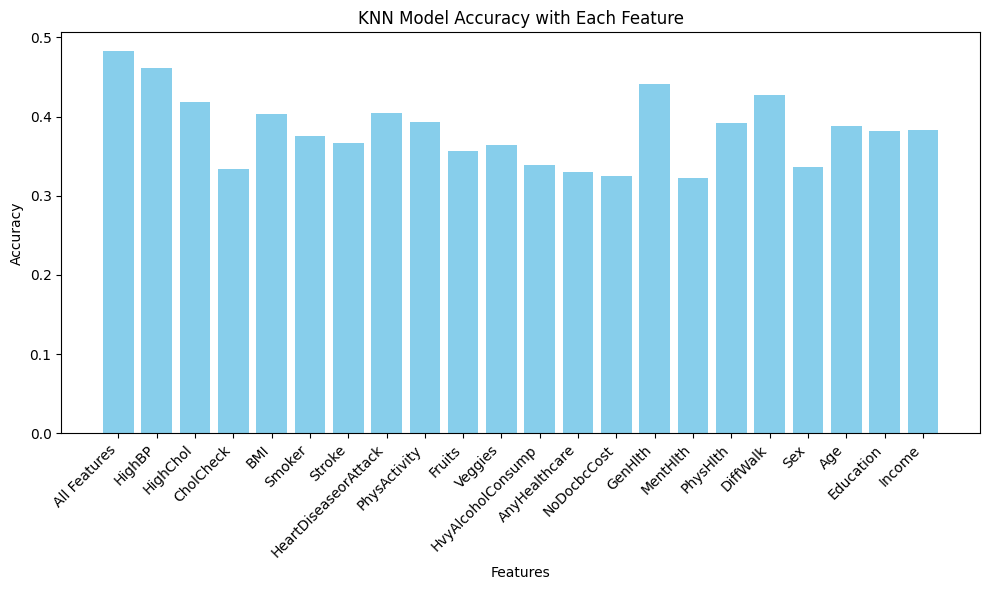

In [ ]:

target_column = 'Diabetes_012'


X_all = balanced_df_smote.drop(columns=[target_column])
y_all = balanced_df_smote[target_column]


scaler = StandardScaler()
X_all_scaled = scaler.fit_transform(X_all)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_scaled, y_all, test_size=0.2, random_state=42)


knn_all = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn_all.fit(X_train_all, y_train_all)

y_pred_all = knn_all.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)


accuracies = {'All Features': accuracy_all}

for column in X_all.columns:
    X_single = balanced_df_smote[[column]]
    X_single_scaled = scaler.fit_transform(X_single)

    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single_scaled, y_all, test_size=0.2, random_state=42)

    knn_single = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
    knn_single.fit(X_train_single, y_train_single)

    y_pred_single = knn_single.predict(X_test_single)
    accuracy_single = accuracy_score(y_test_single, y_pred_single)

    accuracies[column] = accuracy_single

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('KNN Model Accuracy with Each Feature')
plt.tight_layout()
plt.show()


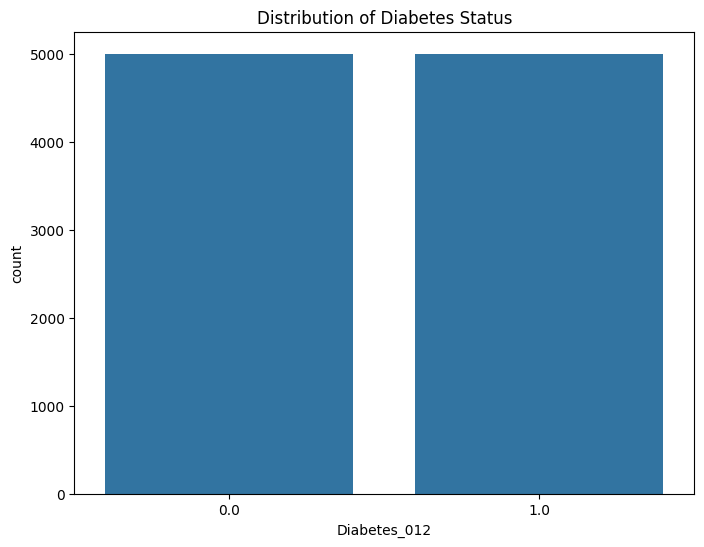

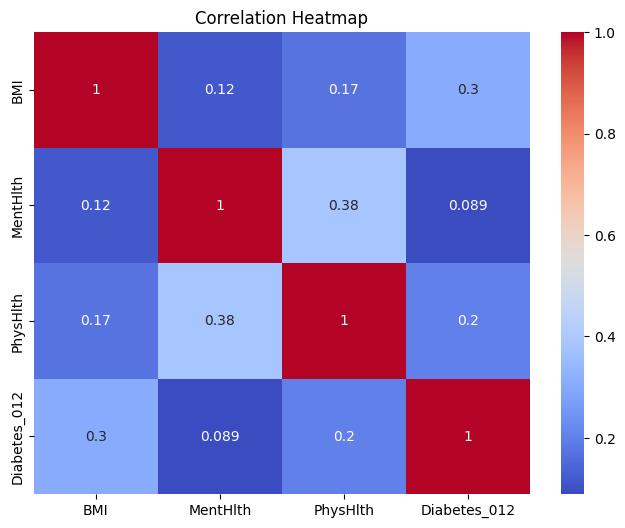

Logistic Regression Accuracy: 0.7395
[[727 285]
 [236 752]]
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      1012
         1.0       0.73      0.76      0.74       988

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

Random Forest Accuracy: 0.7395
[[702 310]
 [211 777]]
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      1012
         1.0       0.71      0.79      0.75       988

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



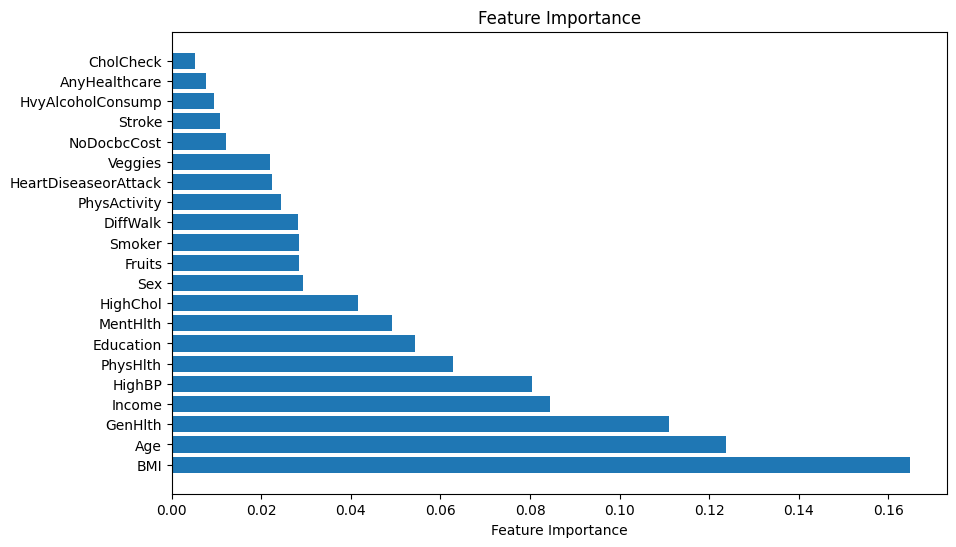

In [ ]:


target_column = 'Diabetes_012'




label_encoders = {}
categorical_columns = ['GenHlth', 'Age', 'Education', 'Income']
for col in categorical_columns:
    le = LabelEncoder()
    balanced_df_smote[col] = le.fit_transform(balanced_df_smote[col])
    label_encoders[col] = le

scaler = StandardScaler()
numerical_columns = ['BMI', 'MentHlth', 'PhysHlth']
balanced_df_smote[numerical_columns] = scaler.fit_transform(balanced_df_smote[numerical_columns])

plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes_012', data=balanced_df_smote)
plt.title('Distribution of Diabetes Status')
plt.show()

corr = balanced_df_smote[numerical_columns + ['Diabetes_012']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


X = balanced_df_smote.drop(columns='Diabetes_012')
y = balanced_df_smote['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), features[indices])
plt.xlabel('Feature Importance')
plt.show()


In [ ]:
balanced_df_smote['Diabetes_012'].unique()

array([0., 1.])

KNN Accuracy: 0.72


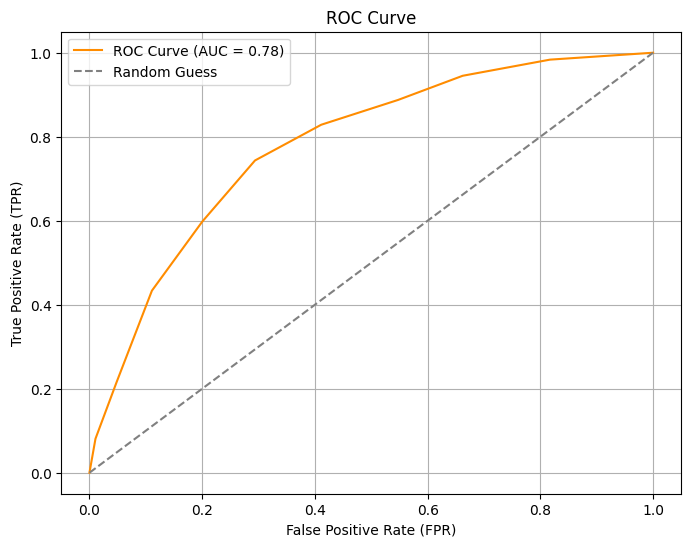

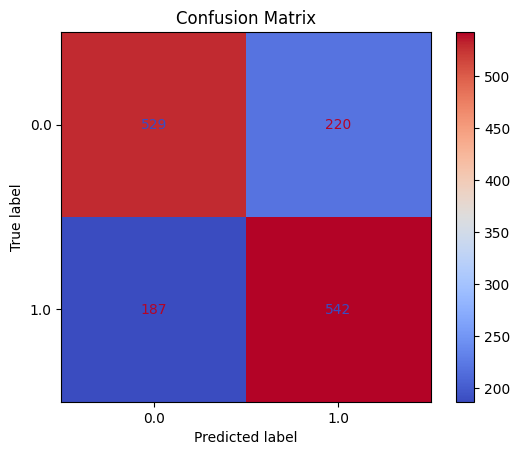

In [ ]:
def remove_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return data[(z_scores < threshold).all(axis=1)]


cleaned_data = remove_outliers_zscore(X)
cleaned_target = y.loc[cleaned_data.index]

X_train, X_test, y_train, y_test = train_test_split(cleaned_data, cleaned_target, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=9, metric='manhattan')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")

def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.grid()
    plt.show()

plot_roc_curve(y_test, y_prob)

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(cmap='coolwarm')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

is good the roc curve is good more likly to be one so is good .

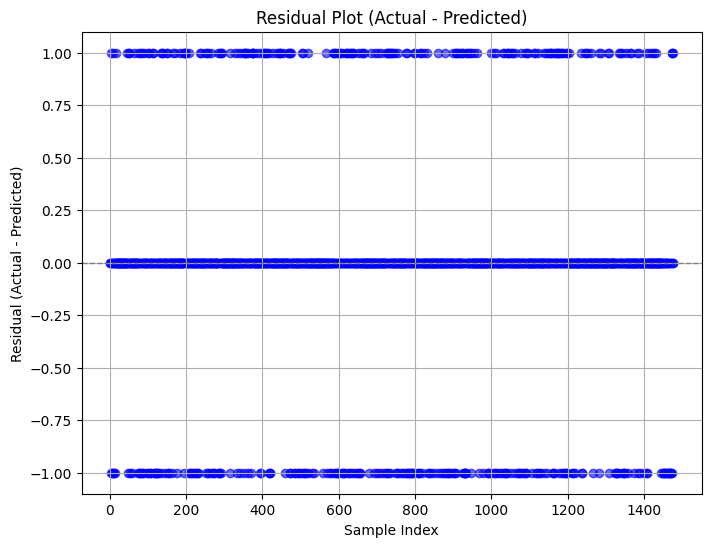

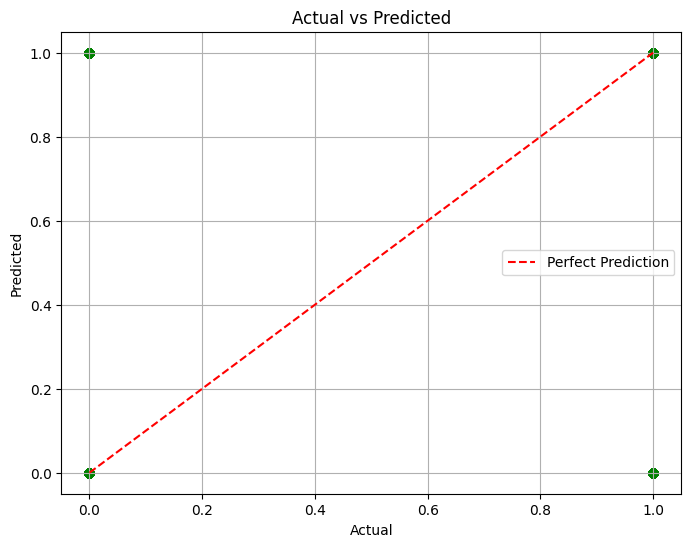

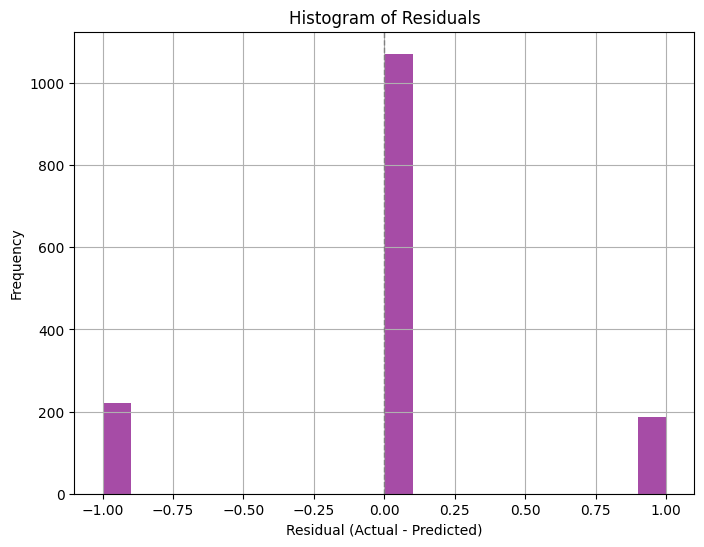

In [ ]:
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.6)
    plt.axhline(0, linestyle='--', color='gray', linewidth=1)
    plt.title('Residual Plot (Actual - Predicted)')
    plt.xlabel('Sample Index')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.grid()
    plt.show()

def plot_actual_vs_predicted_scatter(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Prediction')
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.grid()
    plt.show()

def plot_residual_histogram(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, color='purple', alpha=0.7)
    plt.axvline(0, linestyle='--', color='gray', linewidth=1)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred)

plot_residuals(y_test_array, y_pred_array)

plot_actual_vs_predicted_scatter(y_test_array, y_pred_array)

plot_residual_histogram(y_test_array, y_pred_array)

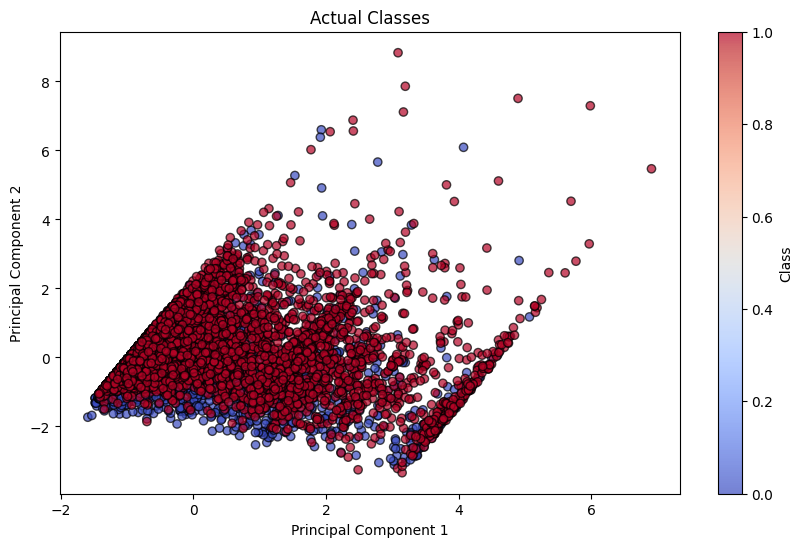

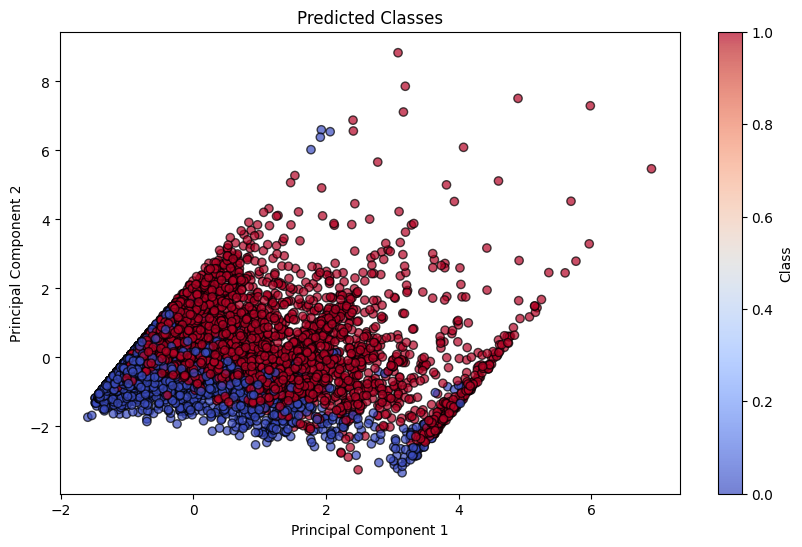

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Actual Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=knn_model.predict(X_pca), cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('Predicted Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

#Thank you